In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import requests
import json
from IPython.display import display, Markdown
import matplotlib.colors as mcolors

## 1. Aim

Through this project we aim to leverage LLMs to automate the process of safety and health document generation.

We have focused on generating two kinds of documents:

##### 1. Risk Assessment Document

###### 2. Job Safety Analysis Document

## 2. Importing the Dataset

### 2.1 Risk Assessment Dataset

In [23]:
dataset_path = 'Data-8.xlsx' #Load the dataset
df_risk = pd.read_excel(dataset_path)

In [24]:
# Get the number of rows and columns in the DataFrame
rows, columns = df_risk.shape
# Print the counts of rows and columns
print('The number of rows are', rows)
print('The number of columns are', columns)

The number of rows are 44000
The number of columns are 16


In [25]:
# Print a concise summary of the DataFrame
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Activity            44000 non-null  object 
 1   Hazard              44000 non-null  object 
 2   Identified at Risk  44000 non-null  object 
 3   Initial Risk L      44000 non-null  int64  
 4   Initial Risk S      44000 non-null  int64  
 5   Initial Risk R      44000 non-null  int64  
 6   Control Measures    44000 non-null  object 
 7   Residual Risk L     44000 non-null  int64  
 8   Residual Risk S     44000 non-null  int64  
 9   Residual Risk R     44000 non-null  int64  
 10  Remarks             0 non-null      float64
 11  Document Type       44000 non-null  object 
 12  Industry            44000 non-null  object 
 13  Gender              44000 non-null  object 
 14  Country             44000 non-null  object 
 15  Local               44000 non-null  object 
dtypes: f

In [26]:
df_risk.head() #display first five rows of the dataset

,Activity,Hazard,Identified at Risk,Initial Risk L,Initial Risk S,Initial Risk R,Control Measures,Residual Risk L,Residual Risk S,Residual Risk R,Remarks,Document Type,Industry,Gender,Country,Local
0,Site Entrance,Unauthorized access,Security Personnel,1,3,3,Safety induction and visible signage must be p...,1,2,2,NaN,Risk Assessment,Chemicals,Male,Country_5,International
1,Site Entrance,Struck by vehicle,Security Personnel,4,1,4,Safety induction and visible signage must be p...,3,1,3,NaN,Risk Assessment,Chemicals,Male,Country_4,Local
2,Site Entrance,Unauthorized access,Visitors,2,2,4,Safety induction and visible signage must be p...,2,2,4,NaN,Risk Assessment,Construction,Male,Country_1,International
3,Site Entrance,Struck by vehicle,Visitors,3,1,3,Safety induction and visible signage must be p...,2,1,2,NaN,Risk Assessment,Construction,Male,Country_4,Local
4,Site Entrance,Struck by vehicle,Visitors,2,4,8,Safety induction and visible signage must be p...,2,2,4,NaN,Risk Assessment,Chemicals,Male,Country_2,Local


### 2.1.1 Variable Description

| Variable Name        | Description                                       | Type    | Variable Type |
|----------------------|---------------------------------------------------|---------|---------------|
| Activity             | The specific activity where the hazard is identified | object  | Categorical   |
| Hazard               | The type of hazard present                        | object  | Categorical   |
| Identified at Risk   | The individuals at risk                           | object  | Categorical   |
| Initial Risk L       | Initial likelihood of the risk                    | int64   | Numerical     |
| Initial Risk S       | Initial severity of the risk                      | int64   | Numerical     |
| Initial Risk R       | Initial risk rating                               | int64   | Numerical     |
| Control Measures     | Measures implemented to control the hazard        | object  | Categorical   |
| Residual Risk L      | Residual likelihood of the risk after control measures | int64   | Numerical     |
| Residual Risk S      | Residual severity of the risk after control measures | int64   | Numerical     |
| Residual Risk R      | Residual risk rating after control measures       | int64   | Numerical     |
| Remarks              | Additional comments                               | float64 | Categorical   |
| Document Type        | Type of document                                  | object  | Categorical   |
| Industry             | Industry where the activity is performed          | object  | Categorical   |
| Gender               | Gender of the person at risk                      | object  | Categorical   |
| Country              | Country where the activity is performed           | object  | Categorical   |
| Local                | Indicates if the activity is local or international | object  | Categorical   |


### 2.1.2 Missing Values

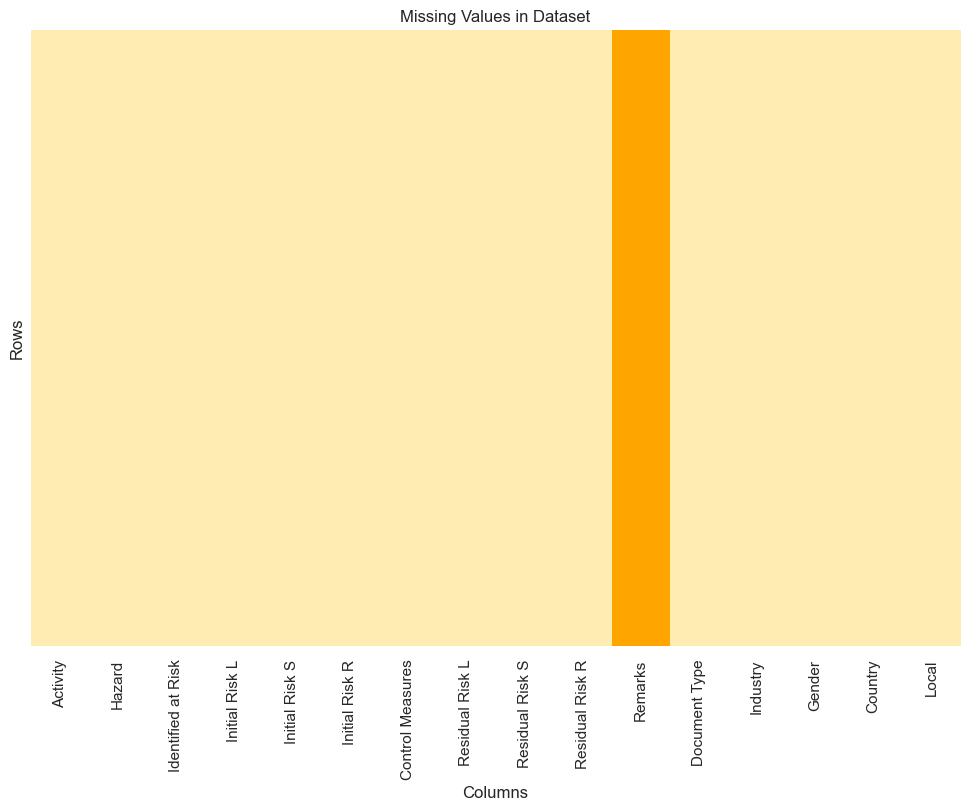

In [27]:
# Check for missing values
missing_values = df_risk.isnull().sum()


# Create a custom colormap: yellow for missing, pastel orange for non-missing
colors = ['#FFECB3', '#FFA500']  # pastel orange and yellow
cmap = ListedColormap(colors)

# Visualize the missing values with the custom colormap
plt.figure(figsize=(12, 8))
sns.heatmap(df_risk.isnull(), cbar=False, cmap=cmap, yticklabels=False)
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

Out of all the variables in the dataset, only 'Remarks' has null values.

### 2.1.3 Exploratory Data Analysis (EDA)

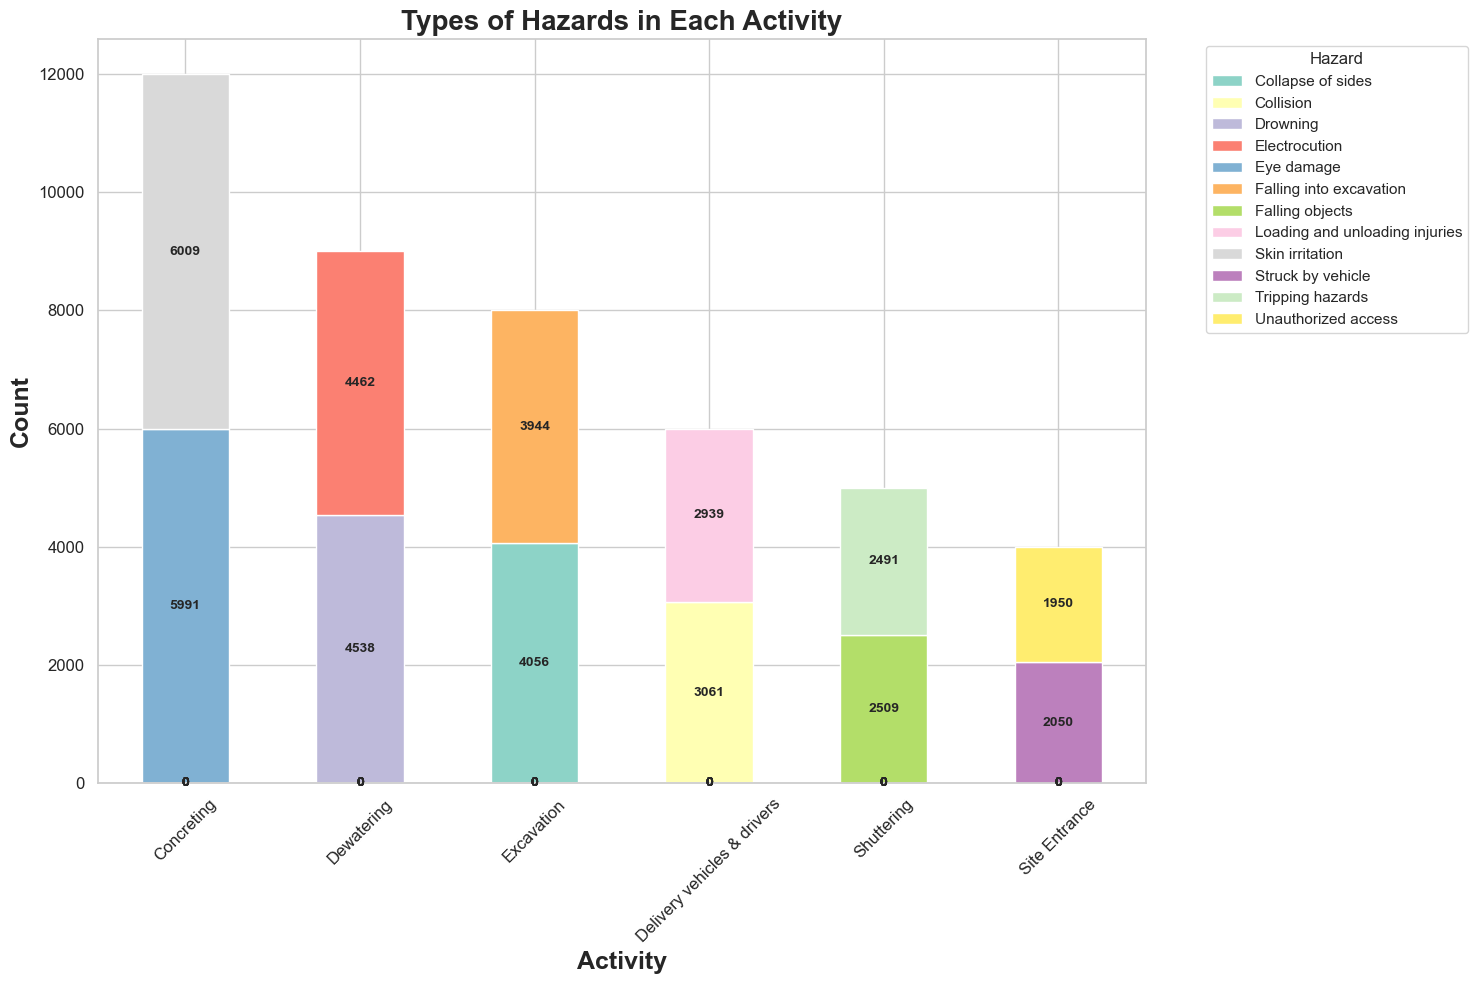

In [28]:
# Set the overall style of the plots
sns.set(style="whitegrid")

# Create a crosstab to count the occurrences of each hazard in each activity
hazard_activity_crosstab = pd.crosstab(df_risk['Activity'], df_risk['Hazard'])

# Add a 'Total' column and sort the crosstab by this column in descending order
hazard_activity_crosstab['Total'] = hazard_activity_crosstab.sum(axis=1)
hazard_activity_crosstab = hazard_activity_crosstab.sort_values(by='Total', ascending=False)
hazard_activity_crosstab = hazard_activity_crosstab.drop(columns='Total')

# Plot the stacked bar chart
ax = hazard_activity_crosstab.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='Set3')

# Add titles and labels
plt.title('Types of Hazards in Each Activity', fontsize=20, fontweight='bold')
plt.xlabel('Activity', fontsize=18, fontweight='bold')
plt.ylabel('Count', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add counts above the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=10, fontweight='bold')

# Adjust the legend
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

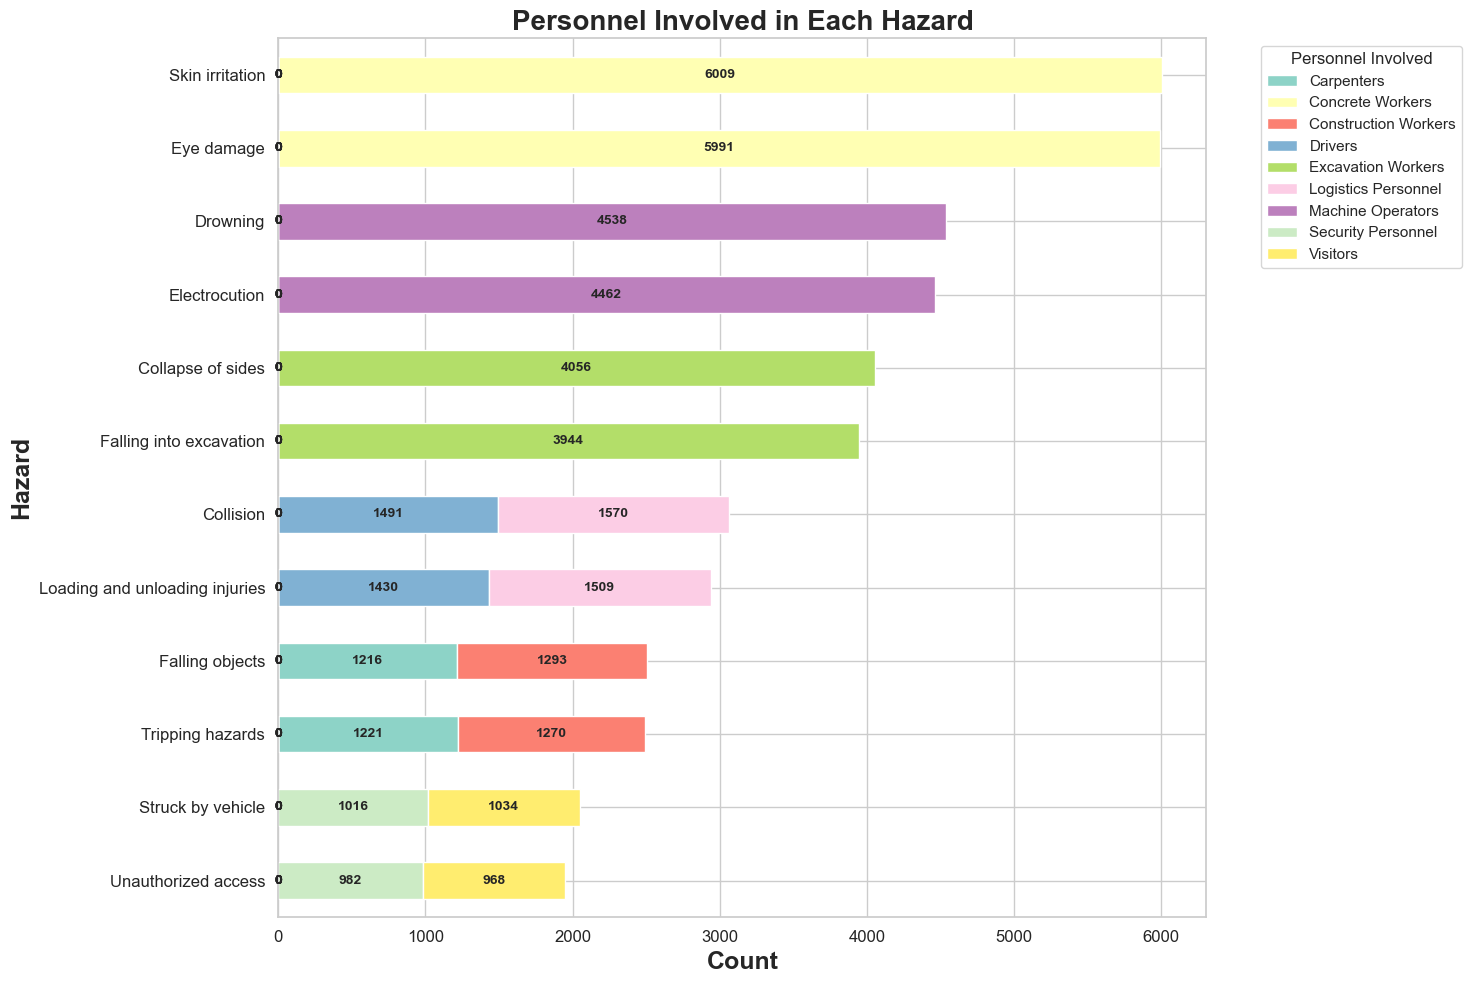

In [29]:
# Set the overall style of the plots
sns.set(style="whitegrid")

# Create a crosstab to count the occurrences of each personnel involved in each hazard
personnel_hazard_crosstab = pd.crosstab(df_risk['Hazard'], df_risk['Identified at Risk'])

# Sort the crosstab by the total count of personnel involved
personnel_hazard_crosstab['Total'] = personnel_hazard_crosstab.sum(axis=1)
personnel_hazard_crosstab = personnel_hazard_crosstab.sort_values(by='Total', ascending=True)
personnel_hazard_crosstab = personnel_hazard_crosstab.drop(columns='Total')

# Plot the horizontal stacked bar chart
ax = personnel_hazard_crosstab.plot(kind='barh', stacked=True, figsize=(15, 10), colormap='Set3')

# Add titles and labels
plt.title('Personnel Involved in Each Hazard', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=18, fontweight='bold')
plt.ylabel('Hazard', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts above the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=10, fontweight='bold')

# Adjust the legend
plt.legend(title='Personnel Involved', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


/var/folders/9t/9l3trtv96696nyj0l4396jdh0000gn/T/ipykernel_98735/1760506076.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


<Figure size 1200x800 with 0 Axes>

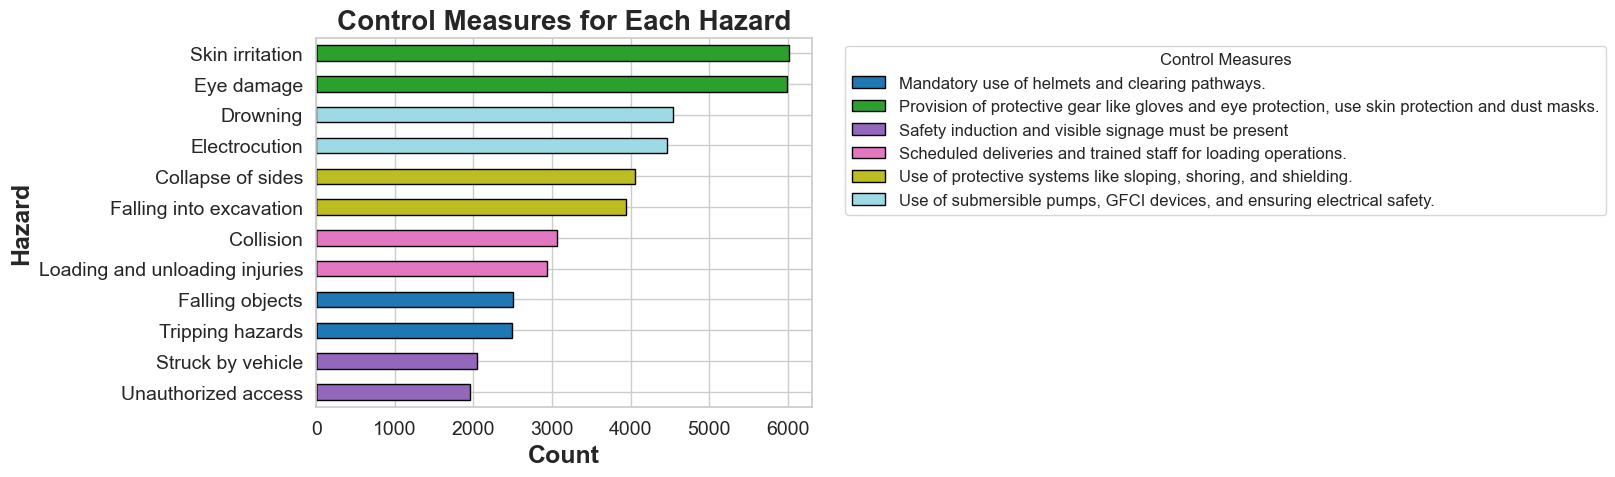

In [30]:
# Group by Hazard and Control Measures, then count the occurrences
hazard_control_counts = df_risk.groupby(['Hazard', 'Control Measures']).size().reset_index(name='Count')

# Pivot the DataFrame for better visualization
hazard_control_pivot = hazard_control_counts.pivot(index='Hazard', columns='Control Measures', values='Count').fillna(0)

# Sort the pivot table by the total count of each hazard
hazard_control_pivot['Total'] = hazard_control_pivot.sum(axis=1)
hazard_control_pivot = hazard_control_pivot.sort_values(by='Total', ascending=True).drop(columns='Total')

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
hazard_control_pivot.plot(kind='barh', stacked=True, colormap='tab20', edgecolor='black')

# Add titles and labels
plt.title('Control Measures for Each Hazard', fontsize=20, fontweight='bold')
plt.xlabel('Count', fontsize=18, fontweight='bold')
plt.ylabel('Hazard', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend
plt.legend(title='Control Measures', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### 2.2 Job Safety Analysis Dataset

In [31]:
dataset_path_2 = 'Consolidated_JSA.xlsx' #load the dataset
df_jsa = pd.read_excel(dataset_path_2)

In [32]:
# Get the number of rows and columns in the DataFrame
rows, columns = df_jsa.shape
# Print the counts of rows and columns
print('The number of rows are', rows)
print('The number of columns are', columns)

The number of rows are 2580
The number of columns are 6


In [33]:
# Print a concise summary of the DataFrame
df_jsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sr.No.                 2570 non-null   object
 1   Sub-Activity Name      2567 non-null   object
 2   Type Of Hazard         2564 non-null   object
 3   Risk(s) Involved       2551 non-null   object
 4   Risk Control measures  2565 non-null   object
 5   Activity               2580 non-null   object
dtypes: object(6)
memory usage: 121.1+ KB


In [34]:
df_jsa.head() #display first five rows of the dataset

,Sr.No.,Sub-Activity Name,Type Of Hazard,Risk(s) Involved,Risk Control measures,Activity
0,1,Manpower Mobilization,Untrained worker,Personal injury,Only inducted worker shall be deputed at the w...,Alluminium door fixing
1,1,Manpower Mobilization,Untrained worker,Personal injury,Given Tool Box Talk to all workers.,Alluminium door fixing
2,1,Manpower Mobilization,Untrained worker,Personal injury,Required work permits should be taken before s...,Alluminium door fixing
3,1,Manpower Mobilization,Untrained worker,Personal injury,Work Shall be carried out under continuous Sup...,Alluminium door fixing
4,2,Fixing of Frame,"Fall of material, fall of man, electric shock,...","Personal Injury, property damage",Ensure only inspected ladder/ scaffold should ...,Alluminium door fixing


### 2.2.1 Variable Description

| Variable Name          | Description                                           | Type   | Variable Type |
|------------------------|-------------------------------------------------------|--------|---------------|
| Sr.No.                 | Serial number of the entry                            | int64  | Numerical     |
| Sub-Activity Name      | Name of the specific sub-activity within a project    | object | Categorical   |
| Type Of Hazard         | The type of hazard identified in the sub-activity     | object | Categorical   |
| Risk(s) Involved       | The risks involved in performing the sub-activity     | object | Categorical   |
| Risk Control measures  | Measures implemented to control identified risks      | object | Categorical   |
| Activity               | The main activity to which the sub-activity belongs   | object | Categorical   |



### 2.2.2 Missing Values

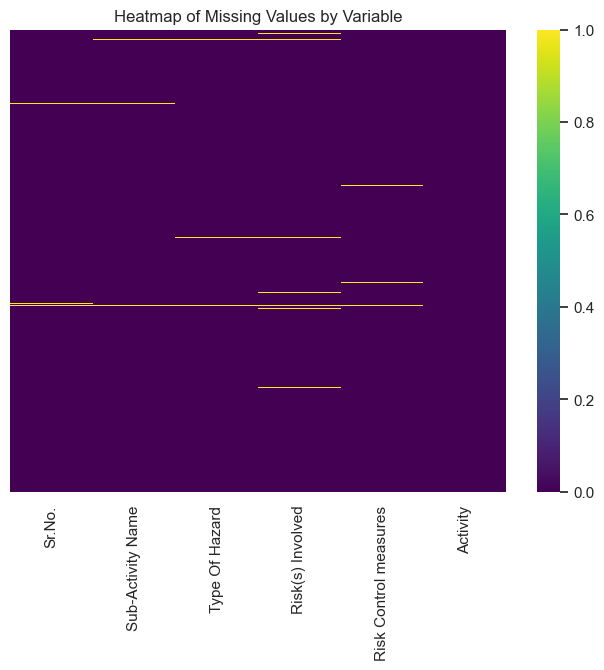

In [35]:
# Calculate missing values
missing_values = df_jsa.isnull()

# Create a heatmap to visualize missing data
plt.figure(figsize=(8, 6))
# Using 'viridis' for a clear visual distinction: missing data will appear in one color, non-missing data in another
sns.heatmap(missing_values, cbar=True, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values by Variable')
plt.show()

## 3. Data Cleaning

### 3.1 Risk Assessment Dataset

In [36]:
# Using the .drop() method to remove the 'Remarks' column from the df_risk DataFrame
df_risk.drop(columns=['Remarks'], inplace=True)  
# 'columns' parameter specifies a list of column names to be removed. 
# 'inplace=True' modifies the DataFrame in place, meaning no new DataFrame is created and df_risk is directly updated.


In [37]:
df_risk.info()  # Displays a summary of the DataFrame including column data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44000 entries, 0 to 43999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Activity            44000 non-null  object
 1   Hazard              44000 non-null  object
 2   Identified at Risk  44000 non-null  object
 3   Initial Risk L      44000 non-null  int64 
 4   Initial Risk S      44000 non-null  int64 
 5   Initial Risk R      44000 non-null  int64 
 6   Control Measures    44000 non-null  object
 7   Residual Risk L     44000 non-null  int64 
 8   Residual Risk S     44000 non-null  int64 
 9   Residual Risk R     44000 non-null  int64 
 10  Document Type       44000 non-null  object
 11  Industry            44000 non-null  object
 12  Gender              44000 non-null  object
 13  Country             44000 non-null  object
 14  Local               44000 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.0+ MB


### 3.2 Job Safety Analysis Dataset

In [38]:
df_jsa.dropna(inplace=True)  # Removes rows with any NaN values in the DataFrame df_jsa and updates it in place.

In [39]:
df_jsa.info()  # Outputs a concise summary of the df_jsa DataFrame, including the data types and non-null counts of each column.

<class 'pandas.core.frame.DataFrame'>
Index: 2535 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sr.No.                 2535 non-null   object
 1   Sub-Activity Name      2535 non-null   object
 2   Type Of Hazard         2535 non-null   object
 3   Risk(s) Involved       2535 non-null   object
 4   Risk Control measures  2535 non-null   object
 5   Activity               2535 non-null   object
dtypes: object(6)
memory usage: 138.6+ KB


## 4. LLM Building

In order to start LLM modelling. we will first divide our task into two activities :

1. Generating Risk Assessment Document
2. Generating Job Safety Analaysis Document

## For both tasks, the following models have been leveraged:
1. OpenAI \
1.1 GPT-3.5-TURBO \
1.2 GPT-4-TURBO \
1.3 GPT-4O 


We will first define api keys for both the models which whill help in fetching information from LLMs.

### Accessing the OpenAI API Key

In [40]:
api_key=''
#api key has been removed due to privacy reasons

### Accessing the OpenAI Endpoint

In [41]:
api_url=''
#api url has been removed due to privacy reasons

### Defining Functions to Interact with the API Key

It is necessary to define functions which will help us in interacting with the LLMs through the API Key.

In [42]:
def get_resp(input_text, model, role):
    # Define the API endpoint URL and authorization headers
    url = api_url
    headers = {'Authorization': api_key, 'Content-Type': 'application/json'}

    # Construct the prompt by prefixing it with the role description
    prompt = f"As a {role}, " + input_text

    # Prepare the data payload for the API request
    data = {
        "model": model,
        "messages": [{"role": "user", "content": input_text}]
    }

    # Send a POST request to the API with the specified data and headers
    response = requests.post(url, json=data, headers=headers)

    # Check if the response is successful (HTTP status code 200)
    if response.status_code == 200:
        response_data = json.loads(response.content)  # Parse the JSON response
        return extract_message(response_data, model)  # Process and return the extracted message
    else:
        # Return an error message if the response status is not 200
        return f"Error {response.status_code}: {response.content.decode('utf-8')}"

def extract_message(response_data, model):
    # Check if the response data contains a 'choices' key
    if 'choices' in response_data:
        # If 'choices' is present, return the content of the first choice's message
        return response_data['choices'][0]['message']['content']
    else:
        # If 'choices' is not present, return the content directly from the response data
        return response_data['content']  # For different API structures


To achieve the best results we have performed multiple experiments to see which LLM and which technique effectively helps in achieving the desirable result.

### 4.1 Generating Risk Assessment Document

#### Experiment 1: Baseline Experiment with Generic Prompt

In [43]:
def generate_risk_assessment_general(data):
    # Defines a function to generate a risk assessment document for a specific activity.

    prompt = """
    Generate a risk assessment document for the activity Site Entrance. Include Hazards, Risk Level, Identified at Risk, Control Measures and Residual Risk.
    """
    # 'prompt' variable: Text to guide the generation, specifying the content required in the risk assessment.

    model_name = "gpt-4-turbo-preview"  # Specifies the model to use for generating the document.
    role = "user"  # Defines the role, typically used to specify the perspective or permissions in API settings.

    return get_resp(prompt, model_name, role)  # Calls a function 'get_resp' to execute the generation with given parameters.


In [44]:
df=df_risk  # Assigns the df_risk DataFrame to a new variable df for use in further operations.

# Calls the function to generate a risk assessment document using the df DataFrame as input.
risk_assessment = generate_risk_assessment_general(data=df)

# Check if the output from the function is a dictionary, typically indicating an error response.
if isinstance(risk_assessment, dict):
    # Extracts an error message using the statusCode and body from the dictionary if available.
    error_message = "Error " + str(risk_assessment.get("statusCode", "")) + ": " + risk_assessment.get("body", "")
    # Formats the error message in Markdown with horizontal rules for emphasis.
    markdown_content = "---\n\n" + error_message + "\n\n---"
else:
    # Formats the successful risk assessment output in Markdown with horizontal rules.
    markdown_content = "---\n\n" + risk_assessment + "\n\n---"

# Wraps the markdown content in a styled HTML div element with blue text color for display.
styled_markdown = "<div style='color: blue;'>\n\n" + markdown_content + "\n\n</div>"
# Renders the styled markdown content in the Jupyter Notebook using the Markdown function from IPython.display.
Markdown(styled_markdown)

<div style='color: blue;'>

---

**Risk Assessment Document for Site Entrance Activity**

---

**Activity Description:** The process of entering and exiting an active construction or work site by personnel, vehicles, and equipment.

**Date:** [Insert Date]

**Assessment Conducted by:** [Insert Assessor's Name]

**Location:** [Insert Location of Site Entrance]

---

### 1. Hazards

1. **Vehicle and Pedestrian Interaction**: The co-occurrence of vehicles and pedestrians at the site entrance can lead to potential collisions or near-miss incidents.

2. **Slips, Trips, and Falls**: Uneven surfaces, wet or slippery conditions, and obstacles at the entrance can increase the risk of slips, trips, and falls.

3. **Unauthorized Access**: Lack of controlled access increases the risk of unauthorized or untrained individuals entering the site, leading to potential accidents or security concerns.

4. **Poor Visibility**: Inadequate lighting or obstructed views can hinder the ability of drivers and pedestrians to see each other, increasing the risk of accidents.

5. **Dust and Noise Pollution**: Operations at the entrance can generate excessive dust and noise, affecting the health and comfort of workers and nearby communities.

---

### 2. Risk Level

- **Vehicle and Pedestrian Interaction**: High
- **Slips, Trips, and Falls**: Medium
- **Unauthorized Access**: Medium
- **Poor Visibility**: High
- **Dust and Noise Pollution**: Medium

---

### 3. Identified at Risk

- Site Workers
- Delivery Personnel
- Visitors
- Nearby Communities

---

### 4. Control Measures

- **Vehicle and Pedestrian Interaction**: Implement designated walking paths separated from vehicle routes. Use clear signage and physical barriers to guide and protect pedestrians.
  
- **Slips, Trips, and Falls**: Regularly inspect and maintain the site entrance to ensure it is free from obstacles, spills, and hazards. Provide adequate drainage to prevent water accumulation.
  
- **Unauthorized Access**: Install secure fencing and controlled access points with security personnel or electronic access control systems to authorize entry.
  
- **Poor Visibility**: Enhance lighting at the site entrance. Implement mirrors and high-visibility markers to improve sightlines for drivers and pedestrians.
  
- **Dust and Noise Pollution**: Implement dust control measures such as water spraying or dust suppressants. Use noise barriers and enforce the use of personal protective equipment (PPE) for noise reduction.

---

### 5. Residual Risk

- **Vehicle and Pedestrian Interaction**: Low, with the implementation of dedicated pathways and clear signage.
  
- **Slips, Trips, and Falls**: Low, provided regular maintenance and hazard identification are conducted.
  
- **Unauthorized Access**: Low, assuming effective access control measures are in place.
  
- **Poor Visibility**: Low, following the installation of improved lighting and visibility aids.
  
- **Dust and Noise Pollution**: Medium, as complete elimination of dust and noise may not be possible, but significant reduction is achievable with the described control measures.

---

**Review Date:** [Insert Planned Review Date]

**Additional Notes:** Continual monitoring of the site entrance for emerging risks and the effectiveness of implemented control measures is essential. Adjustments to the risk assessment should be made as needed to respond to changes in site conditions or operations.

[End of Document]

---

</div>

#### Experiment 2: Detailed Function Based Prompt

##### Activity 1: Site Entrance

In [47]:
def generate_risk_prompt(data, activity_name): # Function to generate a prompt based on the most common risk levels for a specified activity in a DataFrame.
    # Filters the DataFrame 'data' for rows where the 'Activity' column matches the specified activity_name.
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0] # Finds the mode (most frequently occurring value) of the 'Initial Risk L' (Likelihood) column.
    mode_risk_s = activity_data['Initial Risk S'].mode()[0] # Finds the mode of the 'Initial Risk S' (Severity) column.
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)] # Filters 'activity_data' further to include only rows where both risk likelihood and severity match their respective modes.
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Site Entrance'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### GPT-3.5-TURBO

In [48]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment for Site Entrance

## Hazard: Struck by vehicle
- Risk Level: L4
- Severity: S3
- Likelihood: R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4
- Severity: S3
- Likelihood: R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12

It is important to implement the control measures mentioned above to reduce the risks associated with the hazards identified at the site entrance. Regular monitoring and review of these measures should be conducted to ensure the safety of individuals entering the site.

### GPT-4-TURBO

In [49]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Site Entrance Risk Assessment Document

This risk assessment document outlines the potential hazards associated with the activity of entering the site, identifies those at risk, assesses the severity and likelihood of harm, and proposes control measures to mitigate these risks. The goal is to ensure the safety and security of all individuals entering the site.

## 1. Risk Assessment Details

- **Activity**: Site Entrance
- **Date of Assessment**: [Insert date]
- **Assessment Conducted by**: [Insert name]
- **Review Date**: [Insert review date]

## 2. Hazards and Risks

### Hazard 1: Struck by Vehicle

- **Risk Level**: 
  - Likelihood (L): 4
  - Severity (S): 3
  - Risk Rating (R): 12
- **Identified at Risk**:
  - Security Personnel
  - Visitors
- **Description**: 
  - There is a significant risk that individuals, particularly security personnel and visitors, might be struck by vehicles entering or exiting the site, leading to potential serious injuries or fatalities.
- **Control Measures**:
  - Conduct a safety induction for all individuals entering the site to make them aware of vehicle pathways and safety protocols.
  - Install highly visible signage around the site entrance to alert both drivers and pedestrians of the crossing areas and encourage vigilance.
- **Residual Risk**:
  - Likelihood (L): 4
  - Severity (S): 1
  - Risk Rating (R): 4

### Hazard 2: Unauthorized Access

- **Risk Level**:
  - Likelihood (L): 4
  - Severity (S): 3
  - Risk Rating (R): 12
- **Identified at Risk**:
  - Security Personnel
  - Visitors
- **Description**:
  - There is a risk of unauthorized individuals gaining access to the site which could lead to potential security incidents or breaches affecting the safety and order of the site.
- **Control Measures**:
  - Enforce a strict safety induction for everyone entering the site to educate them about access protocols and the necessity of wearing identification badges.
  - Ensure highly visible signage is present at all entry points to inform and deter unauthorized access.
- **Residual Risk**:
  - Likelihood (L): 4
  - Severity (S): 3
  - Risk Rating (R): 12

## 3. Conclusions and Recommendations

The provided control measures, if effectively implemented and adhered to, should reduce the risk of being struck by vehicles to a more manageable level, although the risk remains noteworthy due to the severity of potential injuries. In terms of unauthorized access, the risk remains unchanged suggesting a need for further preventive measures or protocols perhaps involving technological solutions like electronic access controls and regular security training updates.

## 4. Approvals

- **Prepared by**: [Preparer's Name]
- **Reviewed by**: [Reviewer’s Name]
- **Approved by**: [Approver’s Name]

**Date**: [Approval Date]

---

This document must be reviewed periodically or whenever significant changes to site conditions or procedures occur. Adequate training and clear communication remain pivotal in maintaining site safety and security.

In [50]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document for Site Entrance

## Overview
This document outlines identified hazards, risk levels, and control measures for the activity 'Site Entrance' to ensure the safety of security personnel and visitors.

## Hazard 1: Struck by Vehicle
- **Risk Level**: L4, S3, R12
- **Identified at Risk**: Security Personnel, Visitors
- **Control Measures**:
  - Safety induction for all personnel and visitors.
  - Visible signage indicating entrance protocols and vehicle routes must be present.
- **Residual Risk**: L4, S1, R4

### Risk Level and Residual Risk Breakdown:
- **L4**: Likelihood level 4 (possible but not likely to occur often)
- **S3**: Severity level 3 (could result in moderate injury)
- **R12**: Initial risk level (combination of likelihood and severity before control measures)
- **L4**: Likelihood level 4 post-control
- **S1**: Severity level 1 post-control (minimal injury)
- **R4**: Residual risk level (post-control)

## Hazard 2: Unauthorized Access
- **Risk Level**: L4, S3, R12
- **Identified at Risk**: Security Personnel, Visitors
- **Control Measures**:
  - Safety induction for all personnel and visitors.
  - Visible signage indicating restricted areas and entrance protocols must be present.
- **Residual Risk**: L4, S3, R12

### Risk Level and Residual Risk Breakdown:
- **L4**: Likelihood level 4 (possible but not likely to occur often)
- **S3**: Severity level 3 (could result in security breaches or minor injury)
- **R12**: Initial risk level (combination of likelihood and severity before control measures)
- **L4**: Likelihood level 4 post-control
- **S3**: Severity level 3 post-control (same as initial due to nature of hazard)
- **R12**: Residual risk level (post-control remains same due to likelihood and severity)

## Summary
The primary hazards associated with the site entrance are the risk of being struck by a vehicle and unauthorized access. Implementing safety induction programs and ensuring visible signage can significantly mitigate these risks. Continuous assessment and enhancement of control measures are required to maintain the safety and security of all personnel and visitors.

##### Experiment 3: Detailed Function Based Prompting with Instructions

In [51]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Site Entrance'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### GPT-4-TURBO

In [52]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Site Entrance Risk Assessment

## 1. Hazard: Struck by vehicle

- **Risk Level:** L4, S3, R12
- **Identified at Risk:** 
  - Security Personnel
  - Visitors
- **Control Measures:** 
  - Safety induction
  - Visible signage must be present
- **Residual Risk:** L4, S1, R4

## 2. Hazard: Unauthorized access

- **Risk Level:** L4, S3, R12
- **Identified at Risk:** 
  - Security Personnel
  - Visitors
- **Control Measures:**
  - Safety induction
  - Visible signage must be present
- **Residual Risk:** L4, S3, R12

### GPT-4O

In [53]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document: Site Entrance

## Hazard: Struck by Vehicle
- **Risk Level:** L4, S3, R12
- **Identified at risk:** Security Personnel, Visitors
- **Control Measures:** Safety induction and visible signage must be present
- **Residual Risk:** L4, S1, R4

## Hazard: Unauthorized Access
- **Risk Level:** L4, S3, R12
- **Identified at risk:** Security Personnel, Visitors
- **Control Measures:** Safety induction and visible signage must be present
- **Residual Risk:** L4, S3, R12

###### Experiment 4: Role Based Prompting

### Safety Inspector

In [54]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='Safety Inspector'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document - Site Entrance

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12

### Risk Assessor

In [55]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='Risk Assessor'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment for Site Entrance

## Hazard: Struck by vehicle
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S1, R4

## Hazard: Unauthorized access
- Risk Level: L4, S3, R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4, S3, R12

### Document Generator

In [56]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='Document Generator'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment - Site Entrance

## Hazard: Struck by vehicle
- Risk Level: L4
- Severity: S3
- Likelihood: R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4
- Residual Severity: S1
- Residual Likelihood: R4

## Hazard: Unauthorized access
- Risk Level: L4
- Severity: S3
- Likelihood: R12
- Identified at risk: Security Personnel, Visitors
- Control Measures: Safety induction and visible signage must be present
- Residual Risk: L4
- Residual Severity: S3
- Residual Likelihood: R12

### Quality Assurance Analyst

In [57]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='Quality Assurance Analyst'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document

## Site Entrance
- **Hazard:** Struck by vehicle
  - **Risk Level:** L4, S3, R12
  - **Identified at risk:** Security Personnel, Visitors
  - **Control Measures:** Safety induction and visible signage must be present
  - **Residual Risk:** L4, S1, R4

- **Hazard:** Unauthorized access
  - **Risk Level:** L4, S3, R12
  - **Identified at risk:** Security Personnel, Visitors
  - **Control Measures:** Safety induction and visible signage must be present
  - **Residual Risk:** L4, S3, R12

### Safety Inspector

In [58]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='Safety Inspector'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment: Site Entrance

## Hazard: Struck by vehicle
- **Risk Level**: L4, S3, R12
- **Identified at risk**: Security Personnel, Visitors
- **Control Measures**: Safety induction and visible signage must be present
- **Residual Risk**: L4, S1, R4

## Hazard: Unauthorized access
- **Risk Level**: L4, S3, R12
- **Identified at risk**: Security Personnel, Visitors
- **Control Measures**: Safety induction and visible signage must be present
- **Residual Risk**: L4, S3, R12

### Risk Assessor

In [59]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='Risk Assessor'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document: Site Entrance

## Struck by Vehicle

- **Hazard**: Struck by vehicle
- **Risk Level**: L4, S3, R12
- **Identified at Risk**: Security Personnel, Visitors
- **Control Measures**: Safety induction and visible signage must be present
- **Residual Risk**: L4, S1, R4

## Unauthorized Access

- **Hazard**: Unauthorized access
- **Risk Level**: L4, S3, R12
- **Identified at Risk**: Security Personnel, Visitors
- **Control Measures**: Safety induction and visible signage must be present
- **Residual Risk**: L4, S3, R12

### Document Generator

In [60]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='Document Generator'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document

## Activity: Site Entrance

### Hazard: Struck by vehicle
- **Risk Level:**
  - Likelihood: L4
  - Severity: S3
  - Risk Rating: R12
- **Identified at risk:**
  - Security Personnel
  - Visitors
- **Control Measures:**
  - Safety induction and visible signage must be present
- **Residual Risk:**
  - Likelihood: L4
  - Severity: S1
  - Risk Rating: R4

### Hazard: Unauthorized access
- **Risk Level:**
  - Likelihood: L4
  - Severity: S3
  - Risk Rating: R12
- **Identified at risk:**
  - Security Personnel
  - Visitors
- **Control Measures:**
  - Safety induction and visible signage must be present
- **Residual Risk:**
  - Likelihood: L4
  - Severity: S3
  - Risk Rating: R12

### Quality Assurance Analyst

In [61]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Site Entrance")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='Quality Assurance Analyst'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document for Site Entrance

## Hazards

### 1. Struck by Vehicle
- **Risk Level**: L4, S3, R12
- **Identified at Risk**: 
  - Security Personnel 
  - Visitors
- **Control Measures**: 
  - Safety induction and visible signage must be present
- **Residual Risk**: L4, S1, R4

### 2. Unauthorized Access
- **Risk Level**: L4, S3, R12
- **Identified at Risk**: 
  - Security Personnel 
  - Visitors
- **Control Measures**: 
  - Safety induction and visible signage must be present
- **Residual Risk**: L4, S3, R12

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Site Entrance'. Focus on the following details:
- Hazard: Struck by vehicle, Risk Level: L4, S3, R12, Identified at risk: Visitors, Control Measures: Safety induction and visible signage must be present, Residual Risk: L2, S2, R4
- Hazard: Unauthorized access, Risk Level: L4, S3, R12, Identified at risk: Visitors, Control Measures: Safety induction and visible signage must be present, Residual Risk: L4, S3, R12



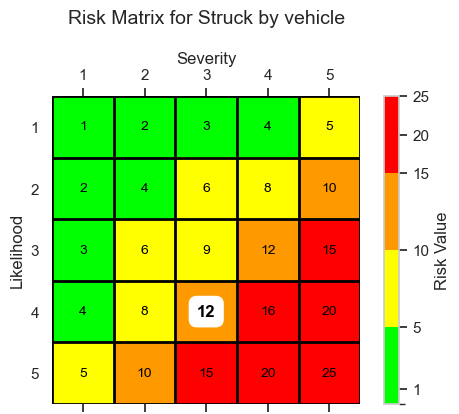

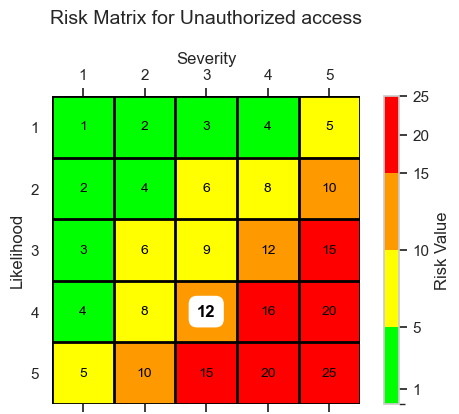

In [62]:
# Function to generate risk assessment prompt
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Site Entrance'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 2: Excavation

##### Experiment 1: Baseline Experiment with Generic Prompt

In [63]:
def generate_risk_assessment_general(data):
    # Defines a function that uses an AI model to generate a risk assessment document based on a specific activity and dataset.

    # The prompt instructs the AI model to generate a document for the "Excavation" activity using the provided data.
    prompt = """
    Generate a risk assessment document for the activity "Excavation" based on the provided dataset. 
    """

    # Specifies the AI model 'gpt-4-turbo' to be used for generating the document.
    model_name = "gpt-4-turbo"

    # The role 'user' is likely used to define the context or permissions for how the model interacts with the prompt.
    role = "user"
    
    # Calls a function 'get_resp' passing the prompt, model name, and role to generate and return the document.
    return get_resp(prompt, model_name, role)

In [64]:
df = df_risk  # Assigns the DataFrame df_risk to a new variable df for use in subsequent operations.

# Calls the function to generate a risk assessment document using the df DataFrame as input.
risk_assessment = generate_risk_assessment_general(data=df)

# Display the generated risk assessment document
if isinstance(risk_assessment, dict):
    error_message = "Error " + str(risk_assessment.get("statusCode", "")) + ": " + risk_assessment.get("body", "")
    markdown_content = "---\n\n" + error_message + "\n\n---"
else:
    markdown_content = "---\n\n" + risk_assessment + "\n\n---"

styled_markdown = "<div style='color: blue;'>\n\n" + markdown_content + "\n\n</div>"
Markdown(styled_markdown)

<div style='color: blue;'>

---

**Excavation Risk Assessment Document**

**1. Introduction**

This document provides a comprehensive risk assessment for excavation activities to ensure the safety and health of all personnel involved, as well as to minimize environmental impacts associated with such activities. Excavation work is associated with numerous hazards that can result in severe injuries or fatalities if not properly managed. 

**2. Hazard Identification**

In the process of excavation, several hazards have been identified:
- **Cave-ins/Trench collapses**: the primary risk during excavation, with the potential to cause serious injuries or fatalities.
- **Falling loads**: materials or tools falling into the trench can pose risks to workers.
- **Hazardous atmosphere**: potential exposure to toxic gases, reduced oxygen levels, or explosive atmospheres.
- **Utility strikes**: accidental contact with underground utilities such as electrical lines, gas pipes, or water pipes.
- **Slips, trips, and falls**: uneven surfaces and obstacles around excavation sites can lead to these incidents.
- **Equipment accidents**: involving the operation of heavy machinery near or in excavation sites.
- **Water ingress**: the accumulation of water in excavation pits can lead to hazards such as flooding or undermining structural stability.

**3. Risk Evaluation**

- **Cave-ins/Trench collapses**:
  - Likelihood: High
  - Severity: Very High
  - Risk: Very High

- **Falling loads**:
  - Likelihood: Medium
  - Severity: High
  - Risk: High

- **Hazardous atmosphere**:
  - Likelihood: Medium
  - Severity: High
  - Risk: High

- **Utility strikes**:
  - Likelihood: Medium
  - Severity: High
  - Risk: High

- **Slips, trips, and falls**:
  - Likelihood: High
  - Severity: Medium
  - Risk: High

- **Equipment accidents**:
  - Likelihood: Medium
  - Severity: High
  - Risk: High

- **Water ingress**:
  - Likelihood: Low
  - Severity: High
  - Risk: Medium

**4. Risk Control Measures**

To mitigate the identified risks, the following control measures are recommended:
- **Cave-ins/Trench collapses**: Implement shoring systems, sloping, benching, and other protective systems as per OSHA standards.
- **Falling loads**: Properly secure all tools and materials around the excavation site; employ overhead protection for workers.
- **Hazardous atmosphere**: Regular monitoring of air quality, use of ventilation systems, and provision of appropriate respiratory protective equipment.
- **Utility strikes**: Pre-excavation checks for underground utilities, use of locating devices, and clear marking of utility lines.
- **Slips, trips, and falls**: Regular housekeeping of the site, proper signage, and ensuring all walkways are clear and well-maintained.
- **Equipment accidents**: Strict adherence to machinery operation guidelines, proper training for operators, routine checks and maintenance of equipment.
- **Water ingress**: Installation of pumps and proper drainage systems, regular inspection for water accumulation.

**5. Monitoring and Review**

Continuous monitoring should be employed to assess the effectiveness of the control measures. This assessment should be done by qualified personnel at regular intervals or when a significant change occurs. Reviews should involve the reassessment of hazards, the effectiveness of control measures, and changes in regulations or equipment.

**6. Conclusion**

Excavation is an inherently hazardous activity which demands rigorous safety management and compliance with protective measures. By accurately assessing risks and implementing comprehensive control measures, it is possible to significantly reduce the occurrence of accidents and injuries, thereby ensuring the safety of all workers and surrounding communities. This document should be regularly updated based on new findings or incidents related to excavation activities.


---

</div>

##### Experiment 2: Detailed Function Based Prompting

In [65]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Excavation'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### GPT-3.5-TURBO

In [66]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Excavation")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Excavation Risk Assessment

## Hazard: Collapse of sides
- **Risk Level:** L1, S1, R1
- **Identified at risk:** Excavation Workers
- **Control Measures:** Use of protective systems like sloping, shoring, and shielding.
- **Residual Risk:** L1, S1, R1

## Hazard: Falling into excavation
- **Risk Level:** L1, S1, R1
- **Identified at risk:** Excavation Workers
- **Control Measures:** Use of protective systems like sloping, shoring, and shielding.
- **Residual Risk:** L1, S1, R1

It is crucial for all excavation workers to adhere to the control measures in place to prevent any accidents or incidents related to the identified hazards. Regular monitoring and inspections should also be conducted to ensure the effectiveness of the control measures.

### GPT-4-TURBO

In [67]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Excavation")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Excavation Risk Assessment Document

This document outlines the identified risks associated with excavation activities, the population at risk, the measures implemented to control these risks, and the residual risk levels after control measures are applied.

## 1. General Information

**Activity:** Excavation  
**Date:** [Date of document creation]  
**Location:** [Specific location or site name]  
**Prepared by:** [Name of the person or team responsible]

## 2. Risk Identification and Assessment

### Hazard 1: Collapse of Sides

- **Risk Level:** L1 (Likelihood 1) S1 (Severity 1) R1 (Risk 1)
- **Identified at Risk:** Excavation Workers
- **Description:** This hazard involves the potential collapse of excavated sidewalls, which can occur due to poor soil stability, vibration, or improper excavation practices. The collapse can result in serious injuries or fatalities.

#### Control Measures

- **Implementation of Protective Systems:**
  - **Sloping:** Creating slopes in the wall of the excavation to reduce the angle and increase stability.
  - **Shoring:** Installation of supports such as hydraulic jacks or posts to support the sidewalls.
  - **Shielding:** Use of trench boxes or other forms of shield that can provide a barrier between the excavation workers and the walls.

- **Residual Risk Level:** L1 (Likelihood 1) S1 (Severity 1) R1 (Risk 1)
- **Reason for Residual Risk:** Even with protective systems in place, there remains a minimal but accepted level of risk due to potential unforeseen changes in environmental conditions or rare equipment failure.

### Hazard 2: Falling into Excavation

- **Risk Level:** L1 (Likelihood 1) S1 (Severity 1) R1 (Risk 1)
- **Identified at Risk:** Excavation Workers
- **Description:** Workers or equipment may fall into open excavations, leading to injuries from falls or being struck by falling equipment.

#### Control Measures

- **Implementation of Protective Systems:**
  - Use of barriers or fencing around the perimeter of the excavation site.
  - Clearly marked and lit pathways around excavation sites.
  - Mandatory use of personal protective equipment (PPE) such as helmets and harnesses.

- **Residual Risk Level:** L1 (Likelihood 1) S1 (Severity 1) R1 (Risk 1)
- **Reason for Residual Risk:** Despite preventative measures, the potential for slips, trips, or missteps cannot be entirely eliminated, maintaining a residual risk at a minimal level.

## 3. Review and Monitoring

Regular reviews and monitoring sessions are scheduled to assess the effectiveness of the implemented control measures and to identify any need for adjustments in response to changing conditions at the site or feedback from the excavation workers.

## 4. Conclusion

This document provides a thorough assessment of major risks associated with excavation activities and outlines the control measures to mitigate such risks, ensuring the safety and health of all workers involved. Continual attention and adherence to safety protocols are essential to maintain minimal risk levels.

## Signature

[Signature of the responsible person]  
[Printed Name]  
[Title]  
[Date]

---
This document is intended to guide all personnel involved in excavation activities and to ensure safety practices are followed to minimize risks associated with the activity. Regular updates and adherence to procedures outlined in this assessment are crucial for maintaining safety standards.


### GPT-4O

In [68]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Excavation")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment: Excavation Activity

## Overview

This document provides a risk assessment for excavation activities. Excavation work involves various hazards that need to be strictly managed to ensure the safety of workers. Below are the identified hazards, associated risks, individuals at risk, control measures, and residual risks.

## Hazard Identification and Risk Assessment

### 1. Hazard: Collapse of Sides

- **Risk Level (Likelihood: L1, Severity: S1, Risk: R1)**:
  - Likelihood: L1 (Low)
  - Severity: S1 (Minor Injury)
  - Risk: R1 (Low)

- **Identified at Risk**:
  - Excavation Workers

- **Control Measures**:
  - Implement protective systems such as:
    - Sloping: Cutting back the trench wall at an angle inclined away from the excavation.
    - Shoring: Using supports like timber or metal hydraulic systems to brace the trench walls.
    - Shielding: Using trench boxes or other types of supports to protect workers from cave-ins.
  - Regular inspection of protective systems by a competent person.
  - Training workers on excavation safety and emergency procedures.
  - Use of proper signage and barricade to restrict unauthorized access.

- **Residual Risk (Likelihood: L1, Severity: S1, Risk: R1)**:
  - Likelihood: L1 (Low)
  - Severity: S1 (Minor Injury)
  - Risk: R1 (Low)

### 2. Hazard: Falling into Excavation

- **Risk Level (Likelihood: L1, Severity: S1, Risk: R1)**:
  - Likelihood: L1 (Low)
  - Severity: S1 (Minor Injury)
  - Risk: R1 (Low)

- **Identified at Risk**:
  - Excavation Workers

- **Control Measures**:
  - Implement protective systems such as:
    - Sloping: Cutting back the trench wall at an angle inclined away from the excavation.
    - Shoring: Using supports like timber or metal hydraulic systems to brace the trench walls.
    - Shielding: Using trench boxes or other types of supports to protect workers from cave-ins.
  - Installation of guardrails, barriers, or appropriate fencing around the excavation site.
  - Safe access and egress points (e.g., ladders, steps) should be provided.
  - Use of high visibility clothing and appropriate personal protective equipment (PPE).
  - Regular site surveillance to ensure safety measures are in place and effective.
  - Posting warning signs around the perimeter of the excavation area.

- **Residual Risk (Likelihood: L1, Severity: S1, Risk: R1)**:
  - Likelihood: L1 (Low)
  - Severity: S1 (Minor Injury)
  - Risk: R1 (Low)

---

## Conclusion

Appropriate control measures such as sloping, shoring, and shielding greatly reduce the risks associated with excavation activities. Regular monitoring and adherence to safety protocols are essential to maintaining a safe work environment. Continuous education and training of workers on excavation safety and proper use of protective systems are crucial components in mitigating hazards.

##### Experiment 3: Function Based Prompt with Intructions

In [69]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Excavation'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### GPT-4-TURBO

In [70]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Excavation")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

```markdown
# Excavation Risk Assessment Document

## 1. Hazard: Collapse of sides
- **Risk Level:** L1, S1, R1
- **Identified at Risk:** Excavation Workers
- **Control Measures:** 
  - Use of protective systems like sloping, shoring, and shielding.
- **Residual Risk:** L1, S1, R1

## 2. Hazard: Falling into excavation
- **Risk Level:** L1, S1, R1
- **Identified at Risk:** Excavation Workers
- **Control Measures:** 
  - Use of protective systems like sloping, shoring, and shielding.
- **Residual Risk:** L1, S1, R1
```

### GPT-4O

In [71]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Excavation")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Excavation Risk Assessment

## Hazard: Collapse of sides
- **Risk Level**: L1, S1, R1
- **Identified at risk**: Excavation Workers
- **Control Measures**: Use of protective systems like sloping, shoring, and shielding.
- **Residual Risk**: L1, S1, R1

## Hazard: Falling into excavation
- **Risk Level**: L1, S1, R1
- **Identified at risk**: Excavation Workers
- **Control Measures**: Use of protective systems like sloping, shoring, and shielding.
- **Residual Risk**: L1, S1, R1


### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Excavation'. Focus on the following details:
- Hazard: Collapse of sides, Risk Level: L1, S1, R1, Identified at risk: Excavation Workers, Control Measures: Use of protective systems like sloping, shoring, and shielding., Residual Risk: L1, S1, R1
- Hazard: Falling into excavation, Risk Level: L1, S1, R1, Identified at risk: Excavation Workers, Control Measures: Use of protective systems like sloping, shoring, and shielding., Residual Risk: L1, S1, R1



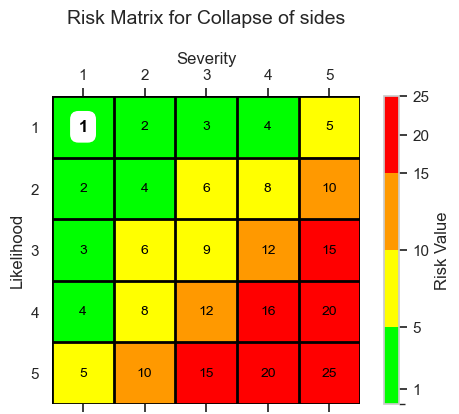

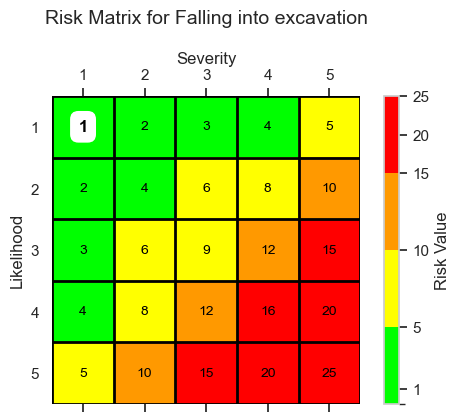

In [72]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Excavation'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 3: Delivery Vehicles and Drivers

##### Experiment 1: Generic Prompt

In [73]:
def generate_risk_assessment_general(data):
    # Defines a function to use an AI model for generating a risk assessment document for the specified activity.

    # Defines a prompt that directs the AI model to create a risk assessment for "Delivery vehicles & drivers" using the dataset.
    prompt = """
    Generate a risk assessment document for the activity "Delivery vehicles & drivers" based on the provided dataset. 
    """

    # Specifies the AI model 'gpt-4-turbo' to be utilized for generating the document.
    model_name = "gpt-4-turbo"

    # Sets the role to 'user', possibly to configure how the AI model processes the request or manages data privacy.
    role = "user"
    
    # Calls the function 'get_resp' with the prepared prompt, model name, and role to produce and return the risk assessment.
    return get_resp(prompt, model_name, role)


In [74]:
df=df_risk
risk_assessment = generate_risk_assessment_general(data=df)

# Display the generated risk assessment document
if isinstance(risk_assessment, dict):
    error_message = "Error " + str(risk_assessment.get("statusCode", "")) + ": " + risk_assessment.get("body", "")
    markdown_content = "---\n\n" + error_message + "\n\n---"
else:
    markdown_content = "---\n\n" + risk_assessment + "\n\n---"

styled_markdown = "<div style='color: blue;'>\n\n" + markdown_content + "\n\n</div>"
Markdown(styled_markdown)

<div style='color: blue;'>

---

Below is a sample risk assessment document for "Delivery Vehicles & Drivers" activity. Since you haven't provided a specific dataset, the assessment will include generic potential risks and recommendations.

---

**Risk Assessment Document**  
**Activity: Delivery Vehicles & Drivers**

**Date:** [Insert Date]  
**Assessment Conducted by:** [Assessor's Name]  
**Location:** [Specify the location for which the assessment is relevant]

### 1. Introduction
This risk assessment evaluates the potential hazards involved with delivery vehicles and drivers at the specified location. The goal is to identify significant risks and propose mitigation measures to ensure the safety and security of drivers, vehicles, community, and the environment.

### 2. Methodology
To conduct this assessment, the following steps were taken:
- Review of incident reports related to delivery drivers and vehicles over the past year.
- Consultation with delivery drivers and logistics managers.
- Inspection of vehicle maintenance records and safety features.
- Analysis of route maps and delivery schedules.

### 3. Identified Risks

#### 3.1 Vehicle-Related Risks
**a. Mechanical Failure**
- **Risk Description:** Failure of essential vehicle parts such as brakes, engines, or steering components which could lead to accidents.
- **Likelihood:** Medium
- **Impact:** High
- **Control Measures:** Regular maintenance checks; use of a vehicle management system to track maintenance schedules.

**b. Tire Damage**
- **Risk Description:** Wear and tear or inadequate tire pressure leading to blowouts or poor handling.
- **Likelihood:** High
- **Impact:** Medium
- **Control Measures:** Daily tire inspections; immediate replacement of damaged or worn tires.

#### 3.2 Driver-Related Risks
**a. Fatigue and Stress**
- **Risk Description:** Long driving hours without adequate breaks can lead to reduced concentration and reaction times.
- **Likelihood:** High
- **Impact:** High
- **Control Measures:** Strict enforcement of break schedules; use of fatigue management systems.

**b. Inadequate Training**
- **Risk Description:** Lack of proper training on vehicle operation and safety protocols can lead to mishandling and accidents.
- **Likelihood:** Medium
- **Impact:** High
- **Control Measures:** Regular training sessions; performance evaluations.

#### 3.3 Environmental Factors
**a. Adverse Weather Conditions**
- **Risk Description:** Snow, rain, or fog can impair visibility and road traction, increasing the risk of accidents.
- **Likelihood:** Variable (seasonal)
- **Impact:** Medium to High
- **Control Measures:** Weather-adjusted driving policies; provision of weather-appropriate gear (e.g., snow tires).

#### 3.4 Security Risks
**a. Theft and Vandalism**
- **Risk Description:** Vehicles being vandalized or goods being stolen during deliveries.
- **Likelihood:** Low
- **Impact:** Medium to High
- **Control Measures:** Secure parking locations; installation of GPS and security cameras in vehicles.

### 4. Conclusion
The above risks associated with the delivery vehicles and drivers at the specified location can largely be mitigated through the suggested control measures. Regular monitoring and compliance with the safety protocols are crucial in minimizing the likelihood and impact of these risks.

### 5. Recommendations
- Implementation of a comprehensive vehicle maintenance program.
- Enforcement of rest periods for drivers to manage fatigue.
- Training and retraining programs for drivers focusing on vehicle handling and safety norms.
- Regular review and updates of the safety measures as per the latest safety standards and regulations.

**Approvals:**

**Name:_________________ Signature:_________________ Date:_____**

**Name:_________________ Signature:_________________ Date:_____**

---

Ensure to modify this template according to specific details you may have within your dataset about frequency of incidents, specific vehicles or driver attributes, location specific risks, and any other relevant data. This will make the assessment more accurate and customized to your organizational needs.

---

</div>

##### Experiment 2: Defined Function Based Prompting

In [75]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Delivery vehicles & drivers'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### GPT-3.5-TURBO

In [76]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Delivery vehicles & drivers")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment for Delivery Vehicles & Drivers

## Hazard 1: Collision
- Risk Level: L4, S1, R4
- Identified at risk: Logistics Personnel, Drivers
- Control Measures: Scheduled deliveries and trained staff for loading operations
- Residual Risk: L1, S1, R1

## Hazard 2: Loading and unloading injuries
- Risk Level: L4, S1, R4
- Identified at risk: Logistics Personnel, Drivers
- Control Measures: Scheduled deliveries and trained staff for loading operations
- Residual Risk: L4, S1, R4

Please ensure that all control measures are strictly followed to mitigate the risks associated with delivery vehicles and drivers. Regular safety checks and training should be conducted to ensure the safety of all personnel involved in the delivery operations.

### GPT-4-TURBO

In [77]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Delivery vehicles & drivers")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document: Delivery Vehicles & Drivers

## 1. Overview

This risk assessment report focuses on identifying, analysing, and addressing potential hazards associated with the operation of delivery vehicles and the safety of drivers. This document aims to enhance the understanding and implementation of effective control measures to minimize risks.

## 2. Risk Assessment Details

### 2.1 Hazard: Collision

- **Hazard Description**: There is a potential risk of collision involving delivery vehicles which might result in injuries or fatalities to logistics personnel and drivers.
- **Risk Level**: L4 (Likelihood Level 4), S1 (Severity Level 1), R4 (Risk Rating 4)
- **Identified at Risk**: Logistics Personnel, Drivers
- **Control Measures**:
  - Implementing strict scheduling for deliveries to avoid rush hours and minimize the risk of collisions.
  - Ensuring all staff involved in logistics operations are adequately trained, especially in safe loading techniques to prevent shifts in cargo that could lead to loss of vehicle control.
- **Residual Risk**: L1 (Likelihood Level 1), S1 (Severity Level 1), R1 (Risk Rating 1)

### 2.2 Hazard: Loading and Unloading Injuries

- **Hazard Description**: The process of loading and unloading goods can lead to various injuries, including strains, sprains, and other musculoskeletal disorders among logistics personnel and drivers.
- **Risk Level**: L4 (Likelihood Level 4), S1 (Severity Level 1), R4 (Risk Rating 4)
- **Identified at Risk**: Logistics Personnel, Drivers
- **Control Measures**:
  - Conducting all loading and unloading operations on a scheduled basis to ensure they are not rushed, reducing the risk of accidents.
  - Providing comprehensive training to all involved personnel to handle goods safely and use mechanical aids wherever necessary.
- **Residual Risk**: L4 (Likelihood Level 4), S1 (Severity Level 1), R4 (Risk Rating 4)

## 3. Conclusion

This risk assessment has identified significant hazards associated with delivery vehicles and personnel operations. While the control measures for collisions have effectively reduced the risk to a low level, continuing risks associated with loading and unloading call for further investigation. Recommendations include the evaluation of additional mechanical aids, enhanced training on ergonomics, and perhaps stricter enforcement of existing policies.

## 4. Recommendations

- **For Collision**:
  - Periodic review of travel schedules and routes based on historical accident data and traffic analytics.
  - Continuous training refreshers on defensive driving and incident management for drivers.

- **For Loading and Unloading Injuries**:
  - Consider investment in more advanced mechanical loading aids to reduce human contact with heavy loads.
  - Regular health and safety assessments to ensure that all logistical staff are fit for their roles and familiar with best practices in handling goods. 

Further steps should be planned to monitor the effectiveness of the implemented controls and adjusted based on periodic assessments and feedback.

### GPT-4O

In [78]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Delivery vehicles & drivers")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document for Delivery Vehicles & Drivers

## Overview
This document assesses the potential risks involved in the activity of delivery vehicles and drivers within our logistics operations. It identifies hazards, assesses their risk levels, determines who is at risk, and outlines control measures to mitigate these risks. Residual risks after implementing control measures are also determined.

## Risk Assessment Matrix
- **L/R**: Likelihood/Rating
- **S**: Severity
- **R**: Risk Level

### Hazard 1: Collision

**Risk Level:**
- **Likelihood (L)**: 4
- **Severity (S)**: 1
- **Initial Risk (R)**: 4

**Identified At Risk:**
- Logistics Personnel
- Drivers

**Control Measures:**
- Scheduled deliveries.
- Trained staff for loading operations.

**Residual Risk:**
- **Likelihood (L)**: 1
- **Severity (S)**: 1
- **Residual Risk (R)**: 1

### Hazard 2: Loading and Unloading Injuries

**Risk Level:**
- **Likelihood (L)**: 4
- **Severity (S)**: 1
- **Initial Risk (R)**: 4

**Identified At Risk:**
- Logistics Personnel
- Drivers

**Control Measures:**
- Scheduled deliveries.
- Trained staff for loading operations.

**Residual Risk:**
- **Likelihood (L)**: 4
- **Severity (S)**: 1
- **Residual Risk (R)**: 4

## Summary

In the delivery vehicles and drivers' activity, two primary hazards have been identified: collision and loading/unloading injuries. Implementing control measures like scheduling deliveries and ensuring staff are trained in loading operations can significantly reduce the risk of collisions. However, loading and unloading injuries still maintain a higher residual risk despite these measures, indicating the need for continuous monitoring and possibly additional measures to further reduce these risks.

**Note:** Regular assessments and updates to control measures should be undertaken to address any changes in the working environment or processes.

##### Experiment 3: Function Based Prompting with Instructions

In [79]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Delivery vehicles & drivers'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt


### GPT-4-TURBO

In [80]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Delivery vehicles & drivers")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='user'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

```markdown
# Risk Assessment: Delivery Vehicles & Drivers

## 1. Hazard: Collision
- **Risk Level**: L4, S1, R4
- **Identified at Risk**: Logistics Personnel, Drivers
- **Control Measures**:
  - Scheduled deliveries
  - Trained staff for loading operations
- **Residual Risk**: L1, S1, R1

## 2. Hazard: Loading and Unloading Injuries
- **Risk Level**: L4, S1, R4
- **Identified at Risk**: Logistics Personnel, Drivers
- **Control Measures**:
  - Scheduled deliveries
  - Trained staff for loading operations
- **Residual Risk**: L4, S1, R4
```

### GPT-4O

In [81]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Delivery vehicles & drivers")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment: Delivery Vehicles & Drivers

## Hazard: Collision
- **Risk Level:** L4, S1, R4
- **Identified at risk:** Logistics Personnel, Drivers
- **Control Measures:** Scheduled deliveries and trained staff for loading operations.
- **Residual Risk:** L1, S1, R1

## Hazard: Loading and Unloading Injuries
- **Risk Level:** L4, S1, R4
- **Identified at risk:** Logistics Personnel, Drivers
- **Control Measures:** Scheduled deliveries and trained staff for loading operations.
- **Residual Risk:** L4, S1, R4

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Delivery vehicles & drivers'. Focus on the following details:
- Hazard: Collision, Risk Level: L4, S1, R4, Identified at risk: Logistics Personnel, Control Measures: Scheduled deliveries and trained staff for loading operations., Residual Risk: L1, S1, R1
- Hazard: Loading and unloading injuries, Risk Level: L4, S1, R4, Identified at risk: Logistics Personnel, Control Measures: Scheduled deliveries and trained staff for loading operations., Residual Risk: L1, S1, R1



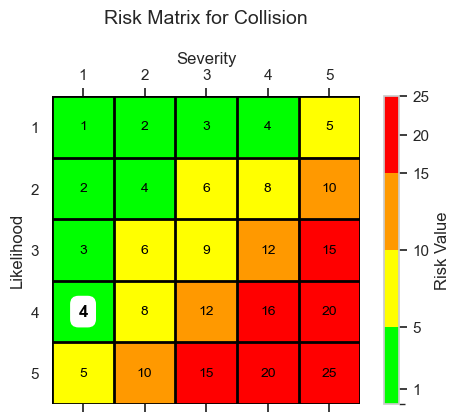

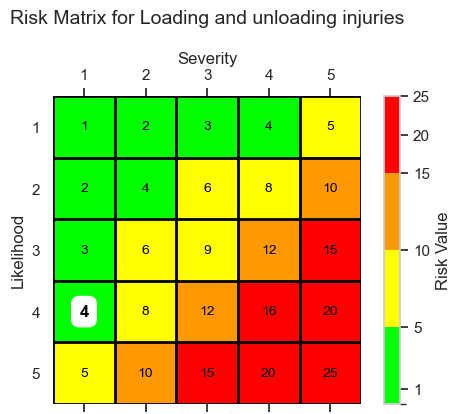

In [82]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Delivery vehicles & drivers'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 4: Dewatering

###### Experiment 1: Generic Prompting

In [83]:
def generate_risk_assessment_general(data):
    # Function to create a risk assessment document for the activity "Dewatering" using an AI model.

    # Sets up the text prompt for generating the document, specifying the activity and implying the use of the provided dataset.
    prompt = """
    Generate a risk assessment document for the activity "Dewatering" based on the provided dataset. 
    """

    # Specifies 'gpt-4-turbo' as the AI model to be used for document generation.
    model_name = "gpt-4-turbo"

    # Defines 'user' as the role, likely affecting the model's response behavior or data access permissions.
    role = "user"
    
    # Returns the result of the 'get_resp' function which processes the prompt with the specified model and role settings.
    return get_resp(prompt, model_name, role)


In [84]:
df=df_risk
risk_assessment = generate_risk_assessment_general(data=df)

# Display the generated risk assessment document
if isinstance(risk_assessment, dict):
    error_message = "Error " + str(risk_assessment.get("statusCode", "")) + ": " + risk_assessment.get("body", "")
    markdown_content = "---\n\n" + error_message + "\n\n---"
else:
    markdown_content = "---\n\n" + risk_assessment + "\n\n---"

styled_markdown = "<div style='color: blue;'>\n\n" + markdown_content + "\n\n</div>"
Markdown(styled_markdown)

<div style='color: blue;'>

---

## Risk Assessment Document: Dewatering Activities

### Introduction
This risk assessment document aims to identify, evaluate, and propose mitigation strategies for hazards associated with the dewatering activity. Dewatering refers to the process of removing water from a construction site, typically the groundwater or surface water, to create a dry and stable work environment. This process is crucial in construction, especially for projects involving foundation works, excavation, and preventing flooding.

### Hazards Identification
**1. Electrical Hazards**
   - Use of electrical pumps and equipment in wet conditions poses risks of electrocution or electrical shocks.

**2. Mechanical Hazards**
   - Moving parts of the dewatering pump and other related machinery can cause injuries such as cuts, abrasions, or caught-in-between accidents.

**3. Slips, Trips, and Falls**
   - Wet and muddy conditions, hoses, and cables pose a significant risk of slips, trips, and falls.

**4. Water Contamination**
   - Handling water that may be contaminated with pollutants from the site (e.g., oils, chemicals) which can affect health and the environment.

**5. Structural Integrity**
   - Improper dewatering can cause soil erosion or destabilization, leading to collapses or subsidence affecting nearby structures.

**6. Noise**
   - Noise generated from dewatering pumps and equipment can cause hearing loss and also disturb the surrounding communities.

**7. Vibration**
   - Equipment operation may generate vibrations affecting nearby structures or causing discomfort to workers and residents.

### Risk Evaluation
**1. Electrical Hazards**
   - Severity: High
   - Likelihood: Medium

**2. Mechanical Hazards**
   - Severity: Medium
   - Likelihood: Medium

**3. Slips, Trips, and Falls**
   - Severity: Medium
   - Likelihood: High

**4. Water Contamination**
   - Severity: High
   - Likelihood: Medium

**5. Structural Integrity**
   - Severity: Very High
   - Likelihood: Medium

**6. Noise**
   - Severity: Medium
   - Likelihood: High

**7. Vibration**
   - Severity: Medium
   - Likelihood: Medium

### Risk Mitigation Strategies
**1. Electrical Safety**
   - Ensure all electrical equipment is suitable for wet conditions and regularly inspected.
   - Use Ground Fault Circuit Interrupters (GFCIs).
   - Implement lockout/tagout procedures during maintenance.

**2. Mechanical Safety**
   - Shield moving parts and implement machine guard protocols.
   - Provide appropriate personal protective equipment (PPE), such as gloves and safety goggles.
   - Conduct regular maintenance and safety checks.

**3. Preventing Slips, Trips, and Falls**
   - Use signage to warn of wet areas.
   - Keep walkways clear and install anti-slip matting.
   - Organize cables and hoses to prevent entanglements.

**4. Handling Contaminated Water**
   - Conduct water testing to identify contaminants.
   - Use containment systems to prevent spillage and migration of contaminants.
   - Properly dispose of contaminated water according to environmental regulations.

**5. Ensuring Structural Integrity**
   - Monitor water removal rates and pressures to avoid rapid changes in groundwater levels.
   - Conduct geotechnical surveys before initiating dewatering.
   - Use appropriate technology like wellpoints, eductors, or deep wells as appropriate for the soil and project conditions.

**6. Noise Control**
   - Use noise barriers or enclosures around noisy equipment.
   - Schedule noisy operations during less sensitive times.
   - Offer hearing protection and conduct regular hearing tests for workers.

**7. Vibration Control**
   - Utilize low-vibration machinery and tools.
   - Monitor vibration levels to ensure they remain within safe limits.
   - Inform and work with local communities to manage impacts.

### Conclusion
Adequate risk management during dewatering operations is vital to ensure the safety and health of workers and the public, as well as to protect the environment and surrounding structures. Through proper planning, monitoring, and the implementation of appropriate mitigative measures, risks associated with dewatering can be effectively managed. Regular review and updating of risk assessment and mitigation strategies should be conducted to adapt to new insights and conditions.

---

</div>

##### Experiment 2: Defined Function Based Prompting

In [85]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Dewatering'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt


### GPT-3.5-TURBO

In [86]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Dewatering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document

## Activity: Dewatering

### Hazard: Drowning
- Risk Level: L4, S3, R12
- Identified at risk: Machine Operators
- Control Measures:
  - Use of submersible pumps
  - GFCI devices
  - Ensuring electrical safety
- Residual Risk: L3, S2, R6

### Hazard: Electrocution
- Risk Level: L4, S3, R12
- Identified at risk: Machine Operators
- Control Measures:
  - Use of submersible pumps
  - GFCI devices
  - Ensuring electrical safety
- Residual Risk: L4, S2, R8

It is important to ensure that all machine operators are trained on the proper use of equipment and follow all safety protocols to minimize the risks associated with dewatering activities. Regular inspections and maintenance of equipment should also be conducted to prevent any safety hazards.

### GPT-4-TURBO

In [87]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Dewatering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Dewatering Activity Risk Assessment

## Overview

This document assesses the risks associated with the dewatering activity, specifically focusing on potential safety hazards that could affect machine operators during the process. Dewatering generally involves the removal of water from solid material or soil by wet classification, centrifugation, filtration, or similar solid-liquid separation processes.

## Risk Assessment Methodology

The risk level is evaluated based on the likelihood (L) and severity (S) of the hazard, resulting in a risk rating (R) calculated by multiplying likelihood and severity (R = L x S). Measures are proposed to mitigate these risks, and a residual risk is estimated after the proposed controls are in effect.

| Likelihood Rating | Severity Rating |
|-------------------|-----------------|
| L1: Rare          | S1: Negligible  |
| L2: Unlikely      | S2: Minor       |
| L3: Possible      | S3: Major       |
| L4: Likely        | S4: Catastrophic|

## Specific Hazards Identified

### 1. Drowning

#### Details
- **Risk Level:** L4 (Likely), S3 (Major), R12
- **Identified at Risk:** Machine Operators
- **Control Measures:** 
  - Use of reliable submersible pumps to efficiently manage water levels.
  - Regular checks and maintenance of the pump systems to ensure they are functioning correctly to avoid unexpected water level rise.
  - Clear signage and barriers around high-risk areas to warn operators of potential hazards.
  - Proper training provided to all operators on emergency procedures and the operation of pumps.
- **Residual Risk:** L3 (Possible), S2 (Minor), R6

### 2. Electrocution

#### Details
- **Risk Level:** L4 (Likely), S3 (Major), R12
- **Identified at Risk:** Machine Operators
- **Control Measures:**
  - All electrical equipment, including submersible pumps, must be fitted with Ground Fault Circuit Interrupters (GFCI) to reduce the risk of electric shock.
  - Regular inspection and maintenance of all electrical systems and equipment involved in the dewatering process.
  - Ensuring all handling or operations involving electricity are performed by qualified personnel.
  - Training for all operators on the correct handling of electrical equipment, the risks involved and emergency procedures in case of electrical failure.
  - Provision of PPE including rubber gloves and boots to all operators handling or near electrical installations.
  - Proper grounding of electrical equipment.
- **Residual Risk:** L4 (Likely), S2 (Minor), R8

## Conclusion

The control measures, when implemented effectively, are expected to significantly reduce the risk levels for the identified hazards in dewatering activities. However, it is crucial that these controls are applied consistently and monitored regularly for their effectiveness. Continuous training and vigilance are essential to prevent incidents related to drowning and electrocution during dewatering operations. All machine operators must be aware of the procedures to follow in emergency situations and how to safely manage the equipment they use. Regular reviews and updates to risk assessments and procedures should be conducted to adapt to any changes in working conditions or technology.

--- 

**Document Prepared by:** Safety Department

**Date:** [Your Date]

### GPT-4O

In [88]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Dewatering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document: Dewatering

## Activity Overview
Dewatering involves the removal of water from solid material or soil by wet classification, centrifugation, filtration, or similar solid-liquid separation processes. This risk assessment specifically addresses the hazards, risk levels, and control measures associated with the dewatering activity.

## Hazard 1: Drowning
- **Risk Level Before Control Measures**
  - **Likelihood (L):** 4
  - **Severity (S):** 3
  - **Risk (R):** 12

- **Identified at Risk:** Machine Operators

- **Control Measures:**
  - Use of submersible pumps.
  - Use of Ground Fault Circuit Interrupter (GFCI) devices.
  - Ensuring electrical safety by regular inspection and maintenance of equipment.
  - Adequate training of machine operators in safety protocols.
  - Implementing fall protection measures if working near water bodies.

- **Residual Risk After Control Measures**
  - **Likelihood (L):** 3
  - **Severity (S):** 2
  - **Risk (R):** 6

## Hazard 2: Electrocution
- **Risk Level Before Control Measures**
  - **Likelihood (L):** 4
  - **Severity (S):** 3
  - **Risk (R):** 12

- **Identified at Risk:** Machine Operators

- **Control Measures:**
  - Use of submersible pumps designed for safety.
  - Implementation of GFCI devices to cut off power in case of a fault.
  - Ensuring electrical safety through regular inspection and adherence to safety protocols.
  - Ensure proper insulation of electrical components.
  - Providing Personal Protective Equipment (PPE) such as rubber gloves and boots.

- **Residual Risk After Control Measures**
  - **Likelihood (L):** 4
  - **Severity (S):** 2
  - **Risk (R):** 8

## Conclusion
The activity of dewatering involves significant risks from the potential hazards of drowning and electrocution. However, with proper control measures such as the use of submersible pumps, GFCI devices, electrical safety protocols, and adequate training, the residual risks can be managed to acceptable levels. Regular monitoring and updates to safety practices are necessary to ensure ongoing risk management.

##### Experiment 3: Defined Function Based Prompt with Instructions

In [119]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Dewatering'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### GPT-4-TURBO

In [120]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Dewatering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

```markdown
# Dewatering Risk Assessment

## Hazard: Drowning
- **Risk Level:** L4, S3, R12
- **Identified at risk:** Machine Operators
- **Control Measures:**
  - Use of submersible pumps
  - GFCI devices
  - Ensuring electrical safety
- **Residual Risk:** L3, S2, R6

## Hazard: Electrocution
- **Risk Level:** L4, S3, R12
- **Identified at risk:** Machine Operators
- **Control Measures:**
  - Use of submersible pumps
  - GFCI devices
  - Ensuring electrical safety
- **Residual Risk:** L4, S2, R8
```

### GPT-4O

In [91]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Dewatering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document for Dewatering

## Activity: Dewatering

### Hazard: Drowning
- **Risk Level:** L4, S3, R12
- **Identified at risk:** Machine Operators
- **Control Measures:** Use of submersible pumps, GFCI devices, and ensuring electrical safety.
- **Residual Risk:** L3, S2, R6

### Hazard: Electrocution
- **Risk Level:** L4, S3, R12
- **Identified at risk:** Machine Operators
- **Control Measures:** Use of submersible pumps, GFCI devices, and ensuring electrical safety.
- **Residual Risk:** L4, S2, R8

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Dewatering'. Focus on the following details:
- Hazard: Drowning, Risk Level: L4, S3, R12, Identified at risk: Machine Operators, Control Measures: Use of submersible pumps, GFCI devices, and ensuring electrical safety., Residual Risk: L3, S2, R6
- Hazard: Electrocution, Risk Level: L4, S3, R12, Identified at risk: Machine Operators, Control Measures: Use of submersible pumps, GFCI devices, and ensuring electrical safety., Residual Risk: L4, S2, R8



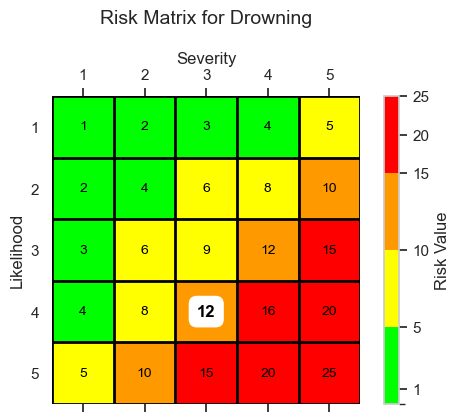

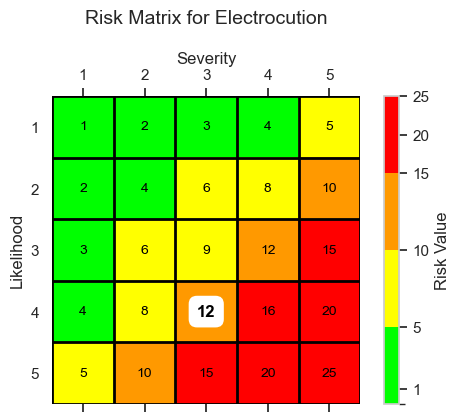

In [92]:
# Function to generate risk assessment prompt
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Dewatering'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 5: Shuttering

##### Experiment 1: Generic Prompt

In [93]:
def generate_risk_assessment_general(data):
    # Function to create a risk assessment document for the activity "Excavation" using an AI model.

    # Sets up the text prompt for generating the document, specifying the activity and implying the use of the provided dataset.
    prompt = """
    Generate a risk assessment document for the activity "Excavation" based on the provided dataset. 
    """

    # Specifies 'gpt-4-turbo' as the AI model to be used for document generation.
    model_name = "gpt-4-turbo"

    # Defines 'user' as the role, likely affecting the model's response behavior or data access permissions.
    role = "user"
    
    # Returns the result of the 'get_resp' function which processes the prompt with the specified model and role settings.
    return get_resp(prompt, model_name, role)


In [94]:
df=df_risk
risk_assessment = generate_risk_assessment_general(data=df)

# Display the generated risk assessment document
if isinstance(risk_assessment, dict):
    error_message = "Error " + str(risk_assessment.get("statusCode", "")) + ": " + risk_assessment.get("body", "")
    markdown_content = "---\n\n" + error_message + "\n\n---"
else:
    markdown_content = "---\n\n" + risk_assessment + "\n\n---"

styled_markdown = "<div style='color: blue;'>\n\n" + markdown_content + "\n\n</div>"
Markdown(styled_markdown)

<div style='color: blue;'>

---

## Excavation Risk Assessment Document

### 1. Introduction
This document provides a risk assessment for the activity of excavation, which involves the removal of soil or rock from a site to form an open face, hole, or cavity using tools, machinery, or explosives. Excavation activities are common in construction and are critical for foundations, repairs, and utility installations.

### 2. Project Details
- **Project Name:** [Input Project Specific Name]
- **Location:** [Input Project Specific Location]
- **Duration of Excavation Activities:** [Input Project Specific Duration]

### 3. Scope of Risk Assessment
This risk assessment covers potential risks associated with the excavation process including personnel safety, equipment use, and environmental impact. Its purpose is to identify hazards, evaluate the risk level, and propose measures to mitigate these risks.

### 4. Methodology
The following steps were employed in conducting the risk assessment:
1. **Hazard Identification:** Review of the excavation activities to identify potential hazards.
2. **Risk Analysis:** Evaluating the likelihood and potential impact of identified hazards.
3. **Risk Evaluation:** Assessing the risks to determine their acceptability.
4. **Control Measures:** Recommendations for risk mitigation strategies.
5. **Documentation and Review:** Recording findings and setting review timelines.

### 5. Identified Risks and Mitigation Measures

#### a. Cave-ins or Collapses
- **Risk Level:** High
- **Control Measures:** Implement shoring systems, sloping, and benching techniques. Pre-excavation assessments should be conducted to understand the environmental and geological conditions. Continuous monitoring for signs of soil movement or degradation.

#### b. Falling or Tripping into Excavation Sites
- **Risk Level:** Medium
- **Control Measures:** Install barricades and warning signs around the site. Ensure all staff and visitors wear appropriate personal protective equipment (PPE) and are briefed on site hazards.

#### c. Utility Strikes (e.g., hitting underground pipes or cables)
- **Risk Level:** High
- **Control Measures:** Use of utility maps, electronic locators, and safe digging practices to identify and avoid underground utilities. Implement a permit-to-dig system.

#### d. Equipment-Related Accidents
- **Risk Level:** Medium
- **Control Measures:** Regular maintenance and inspection of all excavation machinery and equipment. Training operators and ensuring they are competent to use the machines safely.

#### e. Material Falls (objects rolling or falling into the excavation)
- **Risk Level:** Medium
- **Control Measures:** Secure all materials and tools to prevent them from falling into the excavation. Use of overhead protection where necessary.

#### f. Water Accumulation
- **Risk Level:** Medium
- **Control Measures:** Implement proper drainage systems to prevent water accumulation. Regular inspection during and after inclement weather.

#### g. Hazardous Atmosphere (e.g., exposure to toxic gases)
- **Risk Level:** Low
- **Control Measures:** Continuous air quality monitoring. Provide necessary respiratory protection equipment and enforce its use where required.

#### h. Adverse Weather Conditions
- **Risk Level:** Low
- **Control Measures:** Suspend excavation activities during extreme weather. Review weather reports daily and plan activities accordingly.

### 6. Emergency Response Plan
Develop and maintain an emergency response plan tailored to potential excavation accidents, including immediate measures, alerts, and evacuation protocols.

### 7. Training and Awareness
Conduct training sessions on the risks of excavation and promote awareness among employees. Ensure all workers are familiar with safety procedures and emergency measures.

### 8. Review and Monitoring
This risk assessment should be reviewed annually or after any significant change in the excavation procedure or technology. Continuous monitoring should be implemented to ensure the effectiveness of the control measures.

### 9. Conclusion
This risk assessment highlights the importance of recognizing and mitigating the risks associated with excavation. By implementing the suggested control measures and maintaining a rigorous safety protocol, the risks can be significantly diminished, thereby protecting workers, equipment, and the environment from potential hazards.

**[Note: Specific project details should be added to this template to tailor it to particular needs and regulatory requirements.]**

---

</div>

##### Experiment 2: Function Based Prompting

In [95]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Shuttering'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt


### GPT-3.5-TURBO

In [96]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Shuttering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment - Shuttering

## Hazard: Falling objects
- Risk Level: L1, S4, R4
- Identified at risk: Construction Workers, Carpenters
- Control Measures: Mandatory use of helmets and clearing pathways
- Residual Risk: L1, S2, R2

## Hazard: Tripping hazards
- Risk Level: L1, S4, R4
- Identified at risk: Construction Workers, Carpenters
- Control Measures: Mandatory use of helmets and clearing pathways
- Residual Risk: L1, S4, R4

---
Note: 
- L - Likelihood (1 - Rare, 4 - Almost Certain)
- S - Severity (1 - Minor, 4 - Major)
- R - Risk Rating (1 - Low, 4 - High)

### GPT-4-TURBO

In [97]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Shuttering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Shuttering Activity Risk Assessment Document

## Activity Overview:
Shuttering or formwork is the term given to the process of creating molds into which concrete can be poured. During the construction of buildings or structures, this activity is common and crucial in shaping foundations, walls, pillars, and other structural components.

## Risk Assessment Team:
- Construction Site Safety Officer
- Project Manager
- Team Leads (Carpenters)

## Hazards Identification and Control Measures

---

### 1. Hazard: Falling Objects

#### Risk Level:
- **Likelihood (L1):** Rare
- **Severity (S4):** Severe
- **Risk Rating (R4):** High

#### Identified at Risk:
- Construction Workers
- Carpenters

#### Control Measures:
- **Mandatory Use of Helmets:** To protect against head injuries from falling objects.
- **Clearing Pathways:** Ensure that no materials are loosely placed above workers, which might fall due to movements or disturbances.

#### Residual Risk After Controls:
- **Likelihood (L1):** Rare
- **Severity (S2):** Moderate
- **Residual Risk Rating (R2):** Moderate

---

### 2. Hazard: Tripping Hazards

#### Risk Level:
- **Likelihood (L1):** Rare
- **Severity (S4):** Severe
- **Risk Rating (R4):** High

#### Identified at Risk:
- Construction Workers
- Carpenters

#### Control Measures:
- **Mandatory Use of Helmets:** To minimize injuries in case of falls caused by tripping.
- **Clearing Pathways:** Regular checks and immediate clearing of obstacles from walkways and working areas to prevent tripping.

#### Residual Risk After Controls:
- **Likelihood (L1):** Rare
- **Severity (S4):** Severe
- **Residual Risk Rating (R4):** High
(Note: Further assessment and additional control measures may be required to reduce this residual risk.)

---

## Summary:
The risk assessment for the shuttering activity highlights two primary hazards: falling objects and tripping hazards. Appropriate control measures have been recommended and their efficacy in reducing risks has been analyzed. For falling objects, the residual risk has been significantly reduced from high to moderate. However, for tripping hazards, the risk remains high, indicating that further preventive measures need consideration for a safer work environment.

## Recommended Actions:
1. Implement comprehensive safety induction training emphasizing the importance of helmet usage and clearing pathways.
2. Install signage around the construction site emphasizing areas where overhead work is being conducted.
3. Conduct regular safety audits to ensure adherence to the control measures.
4. Explore additional measures such as improving lighting and layout modifications to further mitigate tripping risks.

## Approval:
- **Document Prepared by:** Safety Officer (Name, Signature, Date)
- **Reviewed and Approved by:** Project Manager (Name, Signature, Date)

This document should be reviewed periodically and revisited whenever changes in site conditions, work procedures, or new information regarding hazards arise.

### GPT-4O

In [98]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Shuttering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Shuttering Activity Risk Assessment Document

## Introduction

This document provides a detailed risk assessment for the activity of shuttering at the construction site. The goal of this assessment is to identify hazards, quantify risks, and propose control measures to reduce the risk to acceptable levels. The focus is to ensure a safe working environment for all personnel involved, especially construction workers and carpenters.

## Risk Assessment Methodology

The hazards associated with the shuttering activity have been identified and assessed based on the following risk matrix parameters:
- **L1 (Likelihood 1):** Rare, improbable event
- **S1-4 (Severity 1-4):** Ranging from minor to catastrophic consequences
- **R1-4 (Risk 1-4):** Ranging from insignificant to extreme risk

The identified risks are categorized, and respective control measures are prescribed to mitigate them. Each identified risk is reassessed as a residual risk after applying the suggested control measures.

## Identified Hazards, Risks, and Controls

### 1. Falling Objects

**Hazard Description:**
- Objects falling from overhead during the setup and dismantling of shuttering frameworks.

**At Risk:**
- Construction Workers
- Carpenters

**Initial Risk Level:**
- **Likelihood:** L1 (Rare)
- **Severity:** S4 (Catastrophic)
- **Risk Level:** R4 (High)

**Control Measures:**
- **Mandatory Use of Helmets:** All personnel involved in shuttering activities are required to wear safety helmets at all times on the site.
- **Clearing Pathways:** Ensure all pathways are clear of debris and obstructions to minimize the risk of objects being knocked over.

**Residual Risk Level:**
- **Likelihood:** L1 (Rare)
- **Severity:** S2 (Moderate)
- **Risk Level:** R2 (Moderate)

### 2. Tripping Hazards

**Hazard Description:**
- Tripping over tools, materials, or uneven ground surfaces within the shuttering area.

**At Risk:**
- Construction Workers
- Carpenters

**Initial Risk Level:**
- **Likelihood:** L1 (Rare)
- **Severity:** S4 (Catastrophic)
- **Risk Level:** R4 (High)

**Control Measures:**
- **Mandatory Use of Helmets:** Although helmets do not directly prevent tripping, they provide essential head protection in the event of a fall.
- **Clearing Pathways:** Regular inspections to keep working areas and pathways clear of obstructions and tripping hazards.

**Residual Risk Level:**
- **Likelihood:** L1 (Rare)
- **Severity:** S4 (Catastrophic)
- **Risk Level:** R4 (High)

## Conclusion

The risk assessment highlights the significance of implementing and adhering to control measures, particularly in the context of protective gear and maintaining clear, safe pathways. For tripping hazards, further preventive measures might be needed, as the current strategies do not sufficiently mitigate the risk. Continuous monitoring and adaptive measures are necessary to manage risks efficiently in shuttering activities.

By adhering to these control measures, we aim to protect our personnel from potential hazards and create a safer working environment. Regular review and updates to this document are essential as working conditions and environments evolve.

##### Experiment 3: Defined Function based Prompt with Instructions

In [99]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Shuttering'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### GPT-4-TURBO

In [100]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Shuttering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Shuttering - Risk Assessment Document

## 1. Falling Objects

- **Hazard:** Falling objects
- **Risk Level:**
  - **L (Likelihood):** 1
  - **S (Severity):** 4 
  - **R (Risk):** 4
- **Identified at Risk:**
  - Construction Workers
  - Carpenters
- **Control Measures:**
  - Mandatory use of helmets
  - Clearing pathways
- **Residual Risk:**
  - **L (Likelihood):** 1
  - **S (Severity):** 2 
  - **R (Risk):** 2

## 2. Tripping Hazards

- **Hazard:** Tripping hazards
- **Risk Level:**
  - **L (Likelihood):** 1
  - **S (Severity):** 4 
  - **R (Risk):** 4
- **Identified at Risk:**
  - Construction Workers
  - Carpenters
- **Control Measures:**
  - Mandatory use of helmets
  - Clearing pathways
- **Residual Risk:**
  - **L (Likelihood):** 1
  - **S (Severity):** 4 
  - **R (Risk):** 4

### GPT-4O

In [101]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Shuttering")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document for Shuttering Activity

## Falling Objects
- **Hazard**: Falling objects
- **Risk Level**: L1, S4, R4
- **Identified at risk**: Construction Workers, Carpenters
- **Control Measures**: Mandatory use of helmets and clearing pathways.
- **Residual Risk**: L1, S2, R2

## Tripping Hazards
- **Hazard**: Tripping hazards
- **Risk Level**: L1, S4, R4
- **Identified at risk**: Construction Workers, Carpenters
- **Control Measures**: Mandatory use of helmets and clearing pathways.
- **Residual Risk**: L1, S4, R4

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Shuttering'. Focus on the following details:
- Hazard: Falling objects, Risk Level: L1, S4, R4, Identified at risk: Construction Workers, Control Measures: Mandatory use of helmets and clearing pathways., Residual Risk: L1, S2, R2
- Hazard: Tripping hazards, Risk Level: L1, S4, R4, Identified at risk: Construction Workers, Control Measures: Mandatory use of helmets and clearing pathways., Residual Risk: L1, S2, R2



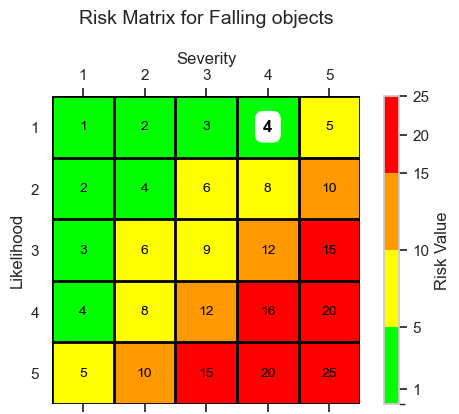

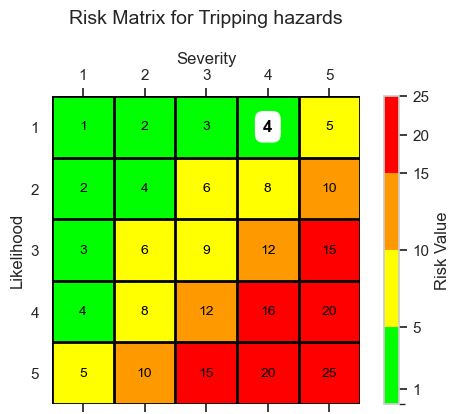

In [102]:
# Function to generate risk assessment prompt
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Shuttering'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### Activity 6: Concreting

##### Experiment 1: Generic Prompting

In [103]:
def generate_risk_assessment_general(data):
    # Defines a function to generate a risk assessment document for the activity "Concreting" using an AI model.

    # The prompt details the requirement for generating a document, specifically focusing on the activity "Concreting" and utilizing the provided dataset.
    prompt = """
    Generate a risk assessment document for the activity "Concreting" based on the provided dataset. 
    """

    # Specifies 'gpt-4-turbo' as the AI model to be used for the document generation, chosen for its capabilities.
    model_name = "gpt-4-turbo"

    # Sets the role to 'user', which might influence how the model processes the request or handles data.
    role = "user"
    
    # Calls the function 'get_resp' to process the prompt with the designated model and role, returning the generated document.
    return get_resp(prompt, model_name, role)

In [104]:
df=df_risk
risk_assessment = generate_risk_assessment_general(data=df)

# Display the generated risk assessment document
if isinstance(risk_assessment, dict):
    error_message = "Error " + str(risk_assessment.get("statusCode", "")) + ": " + risk_assessment.get("body", "")
    markdown_content = "---\n\n" + error_message + "\n\n---"
else:
    markdown_content = "---\n\n" + risk_assessment + "\n\n---"

styled_markdown = "<div style='color: blue;'>\n\n" + markdown_content + "\n\n</div>"
Markdown(styled_markdown)

<div style='color: blue;'>

---

# Risk Assessment for Concreting Operations

## 1. Introduction

This risk assessment document aims to address the potential hazards involved in concreting operations. Concreting involves several phases such as mixing, pouring, and curing of concrete. Each phase carries specific risks that need to be managed to ensure the safety of workers and the efficiency of the project.

## 2. Scope

This document covers the following aspects of concreting:
- Mixing of concrete
- Transporting and pouring of concrete
- Curing and finishing of concrete
- Use and maintenance of equipment required for concreting

## 3. Hazard Identification and Evaluation

### 3.1 Mixing of Concrete

**Hazards:**
- **Inhalation of cement dust:** Can lead to respiratory issues.
- **Skin contact with wet cement:** Causes skin irritation or more severe dermatological issues.
- **Manual handling:** Risk of musculoskeletal injuries from lifting heavy bags of cement.

**Risk Level:** High

### 3.2 Transporting and Pouring of Concrete

**Hazards:**
- **Slip, trip, and fall:** Due to spillage or uneven surfaces.
- **Contact injuries from machinery:** Risks from concrete mixers or other mechanical devices.
- **Overexertion:** Leading to back and other musculoskeletal injuries.

**Risk Level:** Medium

### 3.3 Curing and Finishing of Concrete

**Hazards:**
- **Chemical burns:** From uncured concrete making contact with skin.
- **Heat exhaustion:** High temperatures can be a factor when curing concrete, especially in enclosed areas.
- **Environmental hazards:** Including hazards from prolonged water exposure during the curing process.

**Risk Level:** Medium

### 3.4 Use and Maintenance of Equipment

**Hazards:**
- **Mechanical failures:** Can lead to unexpected dangerous situations.
- **Improper handling or maintenance:** Increases the risk of machine-related injuries.
- **Electrocution:** From electrically powered equipment not properly maintained.

**Risk Level:** High

## 4. Risk Control Measures

### 4.1 General Controls

- **Training:** Comprehensive training for all workers on proper concreting techniques and safety measures.
- **Personal Protective Equipment (PPE):** Mandatory use of PPE such as gloves, masks, and protective eyewear.
- **Regular Maintenance:** Scheduled checks and maintenance for all equipment.

### 4.2 Specific Controls

#### Mixing of Concrete

- Use of mechanical mixing tools to reduce dust and manual handling.
- Provision of safety data sheets and first aid facilities on site.

#### Transporting and Pouring of Concrete

- Ensuring spill containment measures are in place.
- Use of mechanical aids to handle heavy loads.

#### Curing and Finishing of Concrete

- Monitoring environmental conditions to prevent heat exhaustion.
- Use of impermeable gloves and protective gear to prevent chemical burns.

#### Equipment Use and Maintenance

- Implement a checklist for daily inspection of all machinery.
- Training sessions focused on the proper handling and maintenance of equipment.

## 5. Monitoring and Review

**Regular Audits:** To ensure that handling, safety, and maintenance protocols are followed.

**Feedback System:** For workers to report potential risks and suggest improvements.

## 6. Conclusion

Adhering to these control measures and regularly reviewing the process and its associated risks ensures that the safety and health hazards related to concreting operations are minimized. 

## 7. Approval and Implementation

[Placeholder for approval from the relevant authority and date of next review]

This document is to be reviewed and updated based on procedural changes or after any significant related incidents. 

--- 

**End of Document**

---

</div>

##### Experiment 2: Defined Function Based Prompting

In [105]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Concreting'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt


### GPT-3.5-TURBO

In [106]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Concreting")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-3.5-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Risk Assessment Document

## Activity: Concreting

### 1. Hazard: Eye damage
- Risk Level: L5, S3, R15
- Identified at risk: Concrete Workers
- Control Measures: 
  - Provision of protective gear like gloves and eye protection
  - Use skin protection and dust masks
- Residual Risk: L5, S3, R15

### 2. Hazard: Skin irritation
- Risk Level: L5, S3, R15
- Identified at risk: Concrete Workers
- Control Measures: 
  - Provision of protective gear like gloves and eye protection
  - Use skin protection and dust masks
- Residual Risk: L2, S2, R4

Note: 
- L: Likelihood (1-5 scale)
- S: Severity (1-5 scale)
- R: Risk level (L x S)

### GPT-4-TURBO

In [107]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Concreting")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Concreting Risk Assessment Document

## Activity Overview
**Activity:** Concreting\
**Location:** Construction Site\
**Date:** [Insert Date]\
**Assessment Conducted by:** [Insert Assessor's Name]

---

## Risk Assessment Details
This document assesses the potential hazards associated with the concreting process on a construction site. The aim is to identify risks, rate them, and implement control measures to minimize the occurrence of accidents or health issues.

### 1. Hazard Identification and Risk Evaluation

#### a. Eye Damage
- **Hazard Description:** Potential exposure to concrete dust and splashes, which can cause serious eye damage.
- **Risk Level:** 
  - **Likelihood (L)**: 5 (Very Likely)
  - **Severity (S)**: 3 (Moderate)
  - **Risk Rating (R)**: 15 (High)
- **Identified at Risk:** Concrete Workers
- **Control Measures:** 
  - Provision of protective gear like safety goggles to shield eyes from dust and splashes.
  - Regular training on the use of personal protective equipment (PPE).
- **Residual Risk Level:** 
  - **Likelihood (L)**: 5 (Very Likely)
  - **Severity (S)**: 3 (Moderate)
  - **Residual Risk (R)**: 15 (High)
- **Comments:** Despite the use of protective gear, the risk remains high due to the inherent dangers presented by the material and environment.

#### b. Skin Irritation
- **Hazard Description:** Direct contact with wet concrete can cause chemical burns or skin irritation.
- **Risk Level:** 
  - **Likelihood (L)**: 5 (Very Likely)
  - **Severity (S)**: 3 (Moderate)
  - **Risk Rating (R)**: 15 (High)
- **Identified at Risk:** Concrete Workers
- **Control Measures:** 
  - Employees must wear protective gloves and long-sleeved clothing.
  - Provision of skin barrier creams and prompt washing facilities.
- **Residual Risk Level:** 
  - **Likelihood (L)**: 2 (Unlikely)
  - **Severity (S)**: 2 (Minor)
  - **Residual Risk (R)**: 4 (Low)
- **Comments:** With proper protective gear and skin care measures, the risk of skin irritation can be significantly reduced.

### 2. Control Measures Implementation
- **Responsibility:** The site manager is responsible for ensuring that all concrete workers are equipped with the necessary PPE and are trained in its proper use.
- **Compliance Check:** Regular inspections and audits will be conducted to ensure compliance with safety standards.
- **Review Date:** The effectiveness of these measures will be reviewed on [Insert future date or interval].

---

## Approval and Sign Off
**Conducted by:** [Assessor's Name]\
**Signature:** [Digital or hand-written signature]\
**Date:**

---
**Note:** This document is subject to revisions as workplace conditions change or in response to an incident. It is the responsibility of the project manager to update this assessment in collaboration with the safety officer.

##### Experiment 3: Defined Function Based prompting with Instructions

In [108]:
def generate_risk_prompt(data, activity_name):
    # Filter and process data as previously detailed
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s)]
    
    # Use groupby and first to prepare unique hazard data
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R
    unique_hazard_data['Initial Risk R'] = unique_hazard_data['Initial Risk L'] * unique_hazard_data['Initial Risk S']
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the LLM
    prompt = "Generate a risk assessment document in markdown format for the activity 'Concreting'. Focus on the following details without adding any other additional information such as introductions, recommendations, or meanings. Only include details from the dataset provided:\n"
    for index, row in unique_hazard_data.iterrows():
        # Get unique values of 'Identified at Risk' for each hazard
        at_risk_unique = data[(data['Hazard'] == row['Hazard']) & (data['Activity'] == activity_name)]['Identified at Risk'].unique()
        at_risk_list = ", ".join(at_risk_unique)
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{row['Initial Risk L']}, S{row['Initial Risk S']}, R{row['Initial Risk R']}, Identified at risk: {at_risk_list}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt

### GPT-4-TURBO

In [109]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Concreting")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4-turbo"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

```markdown
# Risk Assessment for Concrete Workers: Concreting Process

## 1. Eye Damage
- **Hazard:** Eye damage
- **Risk Level:** L5, S3, R15
- **Identified at risk:** Concrete Workers
- **Control Measures:** 
  - Provision of protective gear like gloves and eye protection
  - Use skin protection and dust masks
- **Residual Risk:** L5, S3, R15

## 2. Skin Irritation
- **Hazard:** Skin irritation
- **Risk Level:** L5, S3, R15
- **Identified at Risk:** Concrete Workers
- **Control Measures:**
  - Provision of protective gear like gloves and eye protection
  - Use skin protection and dust masks
- **Residual Risk:** L2, S2, R4
```

### GPT-4O

In [110]:
df = df_risk  # Adjust the file path as necessary

# Create a prompt based on the dataset
risk_assessment_prompt = generate_risk_prompt(df, "Concreting")

# Choose the model you want to use (e.g., "gpt-3.5-turbo")
model_name = "gpt-4o"
role='User'
# Generate and display the summary using the LLM
summary = get_resp(risk_assessment_prompt, model_name,role)
display(Markdown(summary))

# Concreting Risk Assessment

## Hazard: Eye damage
- **Risk Level:** L5, S3, R15
- **Identified at risk:** Concrete Workers
- **Control Measures:** Provision of protective gear like gloves and eye protection, use skin protection and dust masks.
- **Residual Risk:** L5, S3, R15

## Hazard: Skin irritation
- **Risk Level:** L5, S3, R15
- **Identified at risk:** Concrete Workers
- **Control Measures:** Provision of protective gear like gloves and eye protection, use skin protection and dust masks.
- **Residual Risk:** L2, S2, R4

### Risk Rating Matrix

Generate a risk assessment document in markdown format for the activity 'Concreting'. Focus on the following details:
- Hazard: Eye damage, Risk Level: L5, S3, R15, Identified at risk: Concrete Workers, Control Measures: Provision of protective gear like gloves and eye protection, use skin protection and dust masks., Residual Risk: L5, S3, R15
- Hazard: Skin irritation, Risk Level: L5, S3, R15, Identified at risk: Concrete Workers, Control Measures: Provision of protective gear like gloves and eye protection, use skin protection and dust masks., Residual Risk: L2, S2, R4



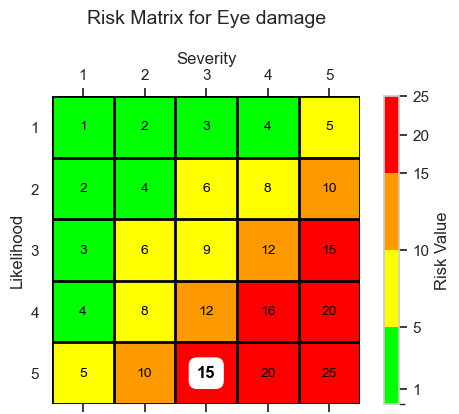

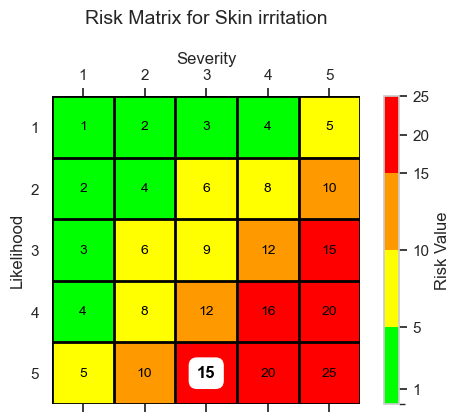

In [111]:
# Function to generate risk assessment prompt
def generate_risk_prompt(data, activity_name):
    # Filter and process data
    activity_data = data[data['Activity'] == activity_name]
    mode_risk_l = activity_data['Initial Risk L'].mode()[0]
    mode_risk_s = activity_data['Initial Risk S'].mode()[0]
    mode_at_risk = activity_data['Identified at Risk'].mode()[0]
    filtered_data = activity_data[
        (activity_data['Initial Risk L'] == mode_risk_l) &
        (activity_data['Initial Risk S'] == mode_risk_s) &
        (activity_data['Identified at Risk'] == mode_at_risk)
    ]
    unique_hazard_data = filtered_data.groupby('Hazard').first().reset_index()

    # Calculate Initial Risk R and Residual Risk R using mode values
    unique_hazard_data['Initial Risk R'] = mode_risk_l * mode_risk_s
    unique_hazard_data['Residual Risk R'] = unique_hazard_data['Residual Risk L'] * unique_hazard_data['Residual Risk S']

    # Generate the prompt for the risk assessment document
    prompt = f"Generate a risk assessment document in markdown format for the activity '{activity_name}'. Focus on the following details:\n"
    for index, row in unique_hazard_data.iterrows():
        prompt += f"- Hazard: {row['Hazard']}, Risk Level: L{mode_risk_l}, S{mode_risk_s}, R{row['Initial Risk R']}, Identified at risk: {row['Identified at Risk']}, Control Measures: {row['Control Measures']}, Residual Risk: L{row['Residual Risk L']}, S{row['Residual Risk S']}, R{row['Residual Risk R']}\n"
    return prompt, unique_hazard_data, mode_risk_l, mode_risk_s

# Function to plot risk matrix for each hazard
def plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s):
    for index, row in hazard_data.iterrows():
        hazard = row['Hazard']
        initial_risk = row['Initial Risk R']
        likelihood = mode_risk_l
        severity = mode_risk_s

        # Define risk matrix dimensions
        likelihood_values = np.arange(1, 6)
        severity_values = np.arange(1, 6)
        risk_matrix = np.zeros((5, 5))

        # Fill the matrix with risk values
        for l in likelihood_values:
            for s in severity_values:
                risk_matrix[l-1, s-1] = l * s

        # Define the custom color map
        colors = ['#00FF00', '#FFFF00', '#FF9900', '#FF0000']  # green, yellow, orange, red
        cmap = mcolors.ListedColormap(colors)
        bounds = [0, 5, 10, 15, 25]
        norm = mcolors.BoundaryNorm(bounds, cmap.N)

        # Plotting the risk matrix
        fig, ax = plt.subplots(figsize=(6, 4))
        cax = ax.matshow(risk_matrix, cmap=cmap, norm=norm)

        # Annotate cells with risk value and highlight the specified cell
        for i in range(5):
            for j in range(5):
                risk_value = int(risk_matrix[i, j])
                if (i+1 == likelihood) and (j+1 == severity):
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
                else:
                    ax.text(j, i, f'{risk_value}', va='center', ha='center', color='black', fontsize=10)

        # Set labels
        ax.set_xticks(np.arange(5))
        ax.set_yticks(np.arange(5))
        ax.set_xticklabels(['1', '2', '3', '4', '5'])
        ax.set_yticklabels(['1', '2', '3', '4', '5'])
        ax.set_xlabel('Severity', fontsize=12)
        ax.set_ylabel('Likelihood', fontsize=12)
        ax.xaxis.set_label_position('top') 
        plt.title(f'Risk Matrix for {hazard}', fontsize=14, pad=20)
        plt.colorbar(cax, label='Risk Value', boundaries=bounds, ticks=[1, 5, 10, 15, 20, 25])

        # Remove grid lines
        ax.grid(False)

        # Add some stylistic elements
        ax.spines[:].set_visible(False)
        ax.set_xticks(np.arange(5+1)-.5, minor=True)
        ax.set_yticks(np.arange(5+1)-.5, minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.tick_params(which="minor", size=0)
        
        plt.show()
# Use the provided df_risk DataFrame
activity_name = 'Concreting'
prompt, hazard_data, mode_risk_l, mode_risk_s = generate_risk_prompt(df_risk, activity_name)
print(prompt)
plot_risk_matrix(hazard_data, mode_risk_l, mode_risk_s)

### 4.2 Generating Job Safety Analysis Document

##### Experiment 1: Baseline Experiment using Generic Prompt

In [121]:
def get_resp(input_text, model, role):
    url = api_url  # API endpoint URL.
    headers = {'Authorization': api_key, 'Content-Type': 'application/json'}  # API request headers including authorization.
    prompt = f"As a {role}, " + input_text  # Prepends role information to the input text to contextualize the API request.
    data = {
        "model": model,  # Specifies the AI model to be used.
        "messages": [{"role": "user", "content": input_text}]  # Structures the request payload with role and content.
    }
    response = requests.post(url, json=data, headers=headers)  # Sends a POST request to the API.
    if response.status_code == 200:  # Checks if the API request was successful.
        response_data = json.loads(response.content)  # Parses the JSON response content.
        return extract_message(response_data, model)  # Extracts and returns the relevant message from the response.
    else:
        return f"Error {response.status_code}: {response.content.decode('utf-8')}"  # Returns error information if the request fails.

def extract_message(response_data, model):
    if 'choices' in response_data:  # Checks if 'choices' key is in the response data.
        return response_data['choices'][0]['message']['content']  # Extracts and returns the first choice's content.
    else:
        return response_data['content']  # Returns the main content if 'choices' is not applicable.

# New function to generate JSA document
def generate_jsa(activity, model, role):
    jsa_prompt = f"Create a detailed job safety analysis document for the activity: {activity}. Include sub-activity name, type of hazard, risks involved and control measures."  # Defines the specific JSA prompt.
    jsa_document = get_resp(jsa_prompt, model, role)  # Generates the JSA document by calling `get_resp` with the prepared prompt.
    return jsa_document  # Returns the generated JSA document.


### Activity 1: Area Hard Barrication

In [122]:
# Usage 
activity = "Area Hard barrication"
model = "gpt-3.5-turbo"  # Specify the model, e.g., gpt-3.5-turbo, gpt-4, etc.
role = "user"
jsa_content = generate_jsa(activity, model, role)
print(jsa_content)

Job Safety Analysis
Activity: Area Hard Barricading

Sub-Activity: Setting up Hard Barricades

Type of Hazard: Struck By/Against Hazard
Risks Involved:
1. Being struck by falling barricade materials
2. Striking against sharp edges of barricade materials
3. Tripping or slipping on loose barricade materials

Control Measures:
1. Wear appropriate personal protective equipment (hard hat, gloves, steel-toed boots)
2. Use tools such as hammers and nails to securely fasten barricade materials
3. Ensure barricade materials are stacked securely and placed on a firm, level surface to prevent tipping over
4. Inspect barricade materials for sharp edges or protruding objects before handling
5. Use caution when moving or lifting heavy barricade materials to avoid strain or injury

Sub-Activity: Inspecting and Maintaining Hard Barricades

Type of Hazard: Fall Hazard
Risks Involved:
1. Falling from an elevated surface while inspecting barricades
2. Slipping on wet or slick surfaces while maintaining b

### Activity 2: Anti-termite Treatment

In [123]:
# Usage 
activity = "Anti-termite treatment"
model = "gpt-3.5-turbo"  # Specify the model, e.g., gpt-3.5-turbo, gpt-4, etc.
role = "user"
jsa_content = generate_jsa(activity, model, role)
print(jsa_content)

Job Safety Analysis

Activity: Anti-Termite Treatment

Sub-Activity: Chemical application

Type of Hazard: Chemical exposure

Risks Involved:
- Skin and eye irritation
- Respiratory issues
- Ingestion hazards
- Poisoning

Control Measures:
1. Personal Protective Equipment (PPE): All workers must wear appropriate PPE including gloves, goggles, respirators, and protective clothing to minimize exposure to chemicals.
2. Ventilation: Ensure proper ventilation in the work area to reduce inhalation of fumes and vapors.
3. Training: All workers should be trained on the safe handling and application of chemicals, including proper mixing and dilution techniques.
4. Storage: Store chemicals in a designated area away from food, water, and workers to prevent accidental exposure.
5. Emergency Response: Have an emergency response plan in place in case of spills, leaks, or accidental exposure to chemicals.
6. First Aid: Provide first aid supplies on-site and train workers on the proper procedures for 

### Activity 3: Alluminium Door Fixing

In [124]:
# Usage 
activity = "Alluminium door fixing"
model = "gpt-3.5-turbo"  # Specify the model, e.g., gpt-3.5-turbo, gpt-4, etc.
role = "user"
jsa_content = generate_jsa(activity, model, role)
print(jsa_content)

Job Safety Analysis

Sub-activity: Aluminium Door Fixing

Type of Hazard: Mechanical, Fall, Electrical

Risks involved:
1. Mechanical hazard: The risk of getting injured by sharp edges of aluminium doors while handling or fixing.
2. Fall hazard: The risk of falling from heights while fixing doors on elevated areas.
3. Electrical hazard: The risk of electric shock while working near electrical fittings or wiring.

Control measures:
1. Personal Protective Equipment (PPE): Workers should wear appropriate PPE such as gloves, safety glasses, and steel-toed boots to protect themselves from injuries.
2. Proper Training: Workers should be trained on the correct procedures for handling and fixing aluminium doors to prevent accidents.
3. Fall Protection: Adequate fall protection equipment such as harnesses and guardrails should be used when working on elevated areas.
4. Electrical Safety: Ensure that electrical power is turned off before starting work on electrical fittings. Use insulated tools 

### Activity 4: Column Shuttering

In [125]:
# Usage 
activity = "Column Shuttering"
model = "gpt-3.5-turbo"  # Specify the model, e.g., gpt-3.5-turbo, gpt-4, etc.
role = "user"
jsa_content = generate_jsa(activity, model, role)
print(jsa_content)

Job Safety Analysis Document

Activity: Column Shuttering

Sub-Activity: Installing Column Formwork

Type of Hazard: Falls, struck by object, crushing injuries

Risks Involved:
1. Falls from heights while installing formwork
2. Being struck by falling objects such as formwork panels or tools
3. Crushing injuries from incorrectly assembled formwork

Control Measures:
1. Use fall protection equipment such as harnesses, lanyards, and anchor points when working at height
2. Ensure all formwork components are securely fastened and do not work under suspended loads
3. Use appropriate lifting equipment such as cranes or hoists to safely lift and maneuver formwork panels
4. Ensure all workers are trained in the proper assembly and disassembly of formwork
5. Implement a clear communication system to alert workers to the movement of formwork panels
6. Regularly inspect formwork components for damage or wear and replace as necessary

Sub-Activity: Pouring Concrete into Formwork

Type of Hazard: C

### Activity 5: Rebaring

In [126]:
# Usage 
activity = "Rebaring"
model = "gpt-3.5-turbo"  # Specify the model, e.g., gpt-3.5-turbo, gpt-4, etc.
role = "user"
jsa_content = generate_jsa(activity, model, role)
print(jsa_content)

Job Safety Analysis

Activity: Rebaring

Sub-Activity: Handling and Installation of Rebar

Type of Hazard: Struck By, Caught In/Between, Ergonomic, Chemical

Risks Involved:
1. Struck By - Worker may be struck by falling rebar or swinging rebar during handling.
2. Caught In/Between - Worker may become caught in between rebar or other construction materials.
3. Ergonomic - Improper lifting and bending may result in musculoskeletal injuries.
4. Chemical - Exposure to chemicals from rebar coatings or rust may cause irritation or allergic reactions.

Control Measures:
1. Struck By:
- Wear appropriate personal protective equipment (PPE) such as a hard hat, safety glasses, and steel-toed boots.
- Ensure rebar is stacked properly and securely to prevent falling.
- Use caution when handling long or heavy rebar to avoid swinging and striking hazards.

2. Caught In/Between:
- Keep work area clear of obstacles and debris.
- Use caution when working in tight spaces or around heavy machinery.
- Com

##### Experiment 2: Defined Function Based Prompting

In [127]:
def get_resp(input_text, model, role):
    url = ""  # API endpoint URL for obtaining chat completions. #api url has been removed for privacy reasons
    api_key = ""  # Authorization token #api key has been removed for privacy reasons 
    headers = {'Authorization': api_key, 'Content-Type': 'application/json'}  # Headers with the API key for authorization and content type set to JSON.
    data = {
        "model": model,  # Model identifier, specifying which AI model to use.
        "messages": [{"role": "user", "content": input_text}]  # Message payload indicating the role and content for the AI to respond to.
    }
    response = requests.post(url, json=data, headers=headers)  # Sending a POST request to the API endpoint.
    if response.status_code == 200:  # Successful request check.
        response_data = json.loads(response.content)  # Parsing the JSON response content.
        return extract_message(response_data, model)  # Passing the response data to another function to extract the relevant message.
    else:
        return f"Error {response.status_code}: {response.content.decode('utf-8')}"  # Handling and returning error responses.


def extract_message(response_data, model):
    if 'choices' in response_data:  # Check if the 'choices' key is in the response data.
        return response_data['choices'][0]['message']['content']  # Extracting and returning the content of the first choice's message.
    else:
        return response_data['content']  # Handling potential alternate structures in the response data where 'choices' might not be present.


In [128]:
def generate_jsa_prompt_from_df(df, start_index, batch_size):
    # Groups the DataFrame by 'Sub-Activity Name' to organize data by specific tasks or stages within the broader activity.
    grouped = df.groupby('Sub-Activity Name')
    prompt_text = ""  # Initializes an empty string to accumulate the text for each sub-activity's JSA details.

    # Iterates over each group, with 'i' being the index and 'name' being the 'Sub-Activity Name', and 'group' the subset of data for that sub-activity.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:  # Skips groups until reaching the specified starting index.
            continue
        if i >= start_index + batch_size:  # Stops adding more groups once the batch size count is reached.
            break

        # Extracts the main activity, hazards, risks, and measures from the group.
        activity = group['Activity'].iloc[0]  # Gets the activity name from the first row of the group.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Joins unique hazards into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Joins unique risks into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Joins unique control measures into a formatted string.

        # Formats the extracted data into a structured text block for each sub-activity.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"  # Concatenates all parts.

    # Prepares the full prompt by adding a header and all the accumulated sub-activity details.
    full_prompt = f"Generate a Job Safety Analysis document for the following activity: {activity}.\n\n" + prompt_text
    return full_prompt  # Returns the complete prompt string for generating a JSA document.


### Activity 1: Area Hard Barrication

### GPT-3.5-TURBO

In [129]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-3.5-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size
    
display(Markdown(full_jsa_document))

Job Safety Analysis (JSA) for Area Hard Barrication

Job Title: Barrication, Loading & Unloading, Manpower Mobilization, Material Transport, Work during Dark Hours

Date: _______________

Sub-Activity: Barrication

Type Of Hazard: Fall of material
Risk(s) Involved: Personal Injury

Risk Control measures:
1. Ensure inducted labor at site.
2. Ensure sufficient manpower for carriage of material.
3. Ensure use of Fall Protection Safety Harness (FBSH) while barricading near the edge of the pit.


Sub-Activity: Loading & Unloading

Type Of Hazard: Fall/Slip/Trip
Risk(s) Involved: Personal injury

Risk Control measures:
1. Evaluate the capacity of the dumper.
2. Provide a banksman for guiding the process and a stopper for the vehicle.
3. Ensure level ground for unloading the dumper at the dumping area.
4. Stack material no less than 1.5 meters from the edge of the pit.
5. Ensure a safe working height for stacking material (1.5 meters).


Sub-Activity: Manpower Mobilization

Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury, Breakdown

Risk Control measures:
1. Only inducted workers shall be deployed at the workplace.
2. Conduct Tool Box Talk to all workers.
3. Ensure daily maintenance of excavator.


Sub-Activity: Material Transport

Type Of Hazard: Road accident
Risk(s) Involved: Personal injury, loss of property

Risk Control measures:
1. Identify the route of the vehicle.
2. Check the competency of the vehicle driver.
3. Check authorization papers of driver & vehicle.
4. Confirm the fitness of the vehicle - brakes, tail lamps, reverse horns.


Sub-Activity: Work during Dark Hours

Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property

Risk Control measures:
1. Obtain a night work permit from the engineering and safety department.
2. Ensure proper illumination during dark hours.
3. Electrical cables should be at least 2 meters high, no exposed wires, and proper earthing.
4. Route shall be illuminated.

I have read and understood the Job Safety Analysis document for Area Hard Barrication.

Employee Signature: ___________________________

Supervisor Signature: ___________________________ 

Date: ________________



### GPT-4-TURBO

In [130]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))


**Job Safety Analysis (JSA)**  
**Activity: Area Hard Barrication**  
**Location: [Specify exact location/site]**  
**Date Prepared: [Insert Date]**  
**Prepared By: [Name and Title of the person preparing the document]**

### 1. Sub-Activity: Barrication

- **Type of Hazard:** Fall of Material
- **Risk(s) Involved:** Personal Injury
- **Risk Control Measures:**
  - Ensure all labor at the site are properly inducted.
  - Maintain appropriate manpower for safe carriage of material.
  - Ensure usage of Full Body Safety Harness (FBSH) when working near the edge of the pit.

### 2. Sub-Activity: Loading & Unloading

- **Type of Hazard:** Fall/Slip/Trip
- **Risk(s) Involved:** Personal Injury
- **Risk Control Measures:**
  - Assess the capacity of the dumper before use.
  - Employ a banksman for guiding the loading and unloading process and use a stopper to prevent vehicle movement.
  - Ensure the ground is level at the unloading area to prevent vehicle tilt or imbalance.
  - Ensure material is stacked no less than 1.5 meters away from the edge of the pit.
  - Maintain a safe working height of 1.5 meters for material stacking.

### 3. Sub-Activity: Manpower Mobilization

- **Type of Hazard:** Untrained Worker
- **Risk(s) Involved:** Personal Injury, Equipment Malfunction
- **Risk Control Measures:**
  - Assign only inducted workers to the workplace.
  - Provide daily Tool Box Talks to maintain safety awareness.
  - Ensure daily maintenance checks on excavators and other critical equipment.

### 4. Sub-Activity: Material Transport

- **Type of Hazard:** Road Accident
- **Risk(s) Involved:** Personal Injury, Loss of Property
- **Risk Control Measures:**
  - Pre-define and verify the transport route.
  - Evaluate the competency and credentials of the vehicle driver.
  - Check and confirm the authorization papers for the vehicle and driver.
  - Confirm the fitness of the vehicle, paying particular attention to brakes, tail lamps, and reverse horns.

### 5. Sub-Activity: Work during Dark Hours

- **Type of Hazard:** Darkness, Fall of Person, Fall of Machinery
- **Risk(s) Involved:** Personal Injury, Damage to Property
- **Risk Control Measures:**
  - Obtain a night work permit from the concerned engineering and safety department.
  - Ensure the area is properly illuminated during work in dark hours.
  - Ensure electrical cables are secured at least 2 meters above the ground and that there are no exposed wires. Ensure proper earthing.
  - Illuminate the designated route adequately.

### **Conclusion and Sign-off**
After assessing the risks and applying control measures as outlined in this Job Safety Analysis, the above activity can proceed with enhanced safety precautions. Safety must be continuously monitored, and adjustments should be made as necessary.

**[Signature of Safety Officer]**

**[Name, Title]**

**[Date]**

The details in this JSA are suggestions and need to be customized based on specific site conditions and company practices. Continual review and updates to safety protocols are recommended to account for any changes in the work environment or scope of the project.



### GPT-4O

In [131]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

# Job Safety Analysis (JSA)

## Activity: Area Hard Barrication

### Sub-Activity: Barrication
- **Type Of Hazard:** Fall of material
- **Risk(s) Involved:** Personal Injury
- **Risk Control Measures:**
  - Ensure that all laborers are inducted at the site.
  - Ensure that there is sufficient manpower for the carriage of materials.
  - Ensure the use of Full Body Safety Harness (FBSH) while performing barrication, especially near the edge of the pit.

### Sub-Activity: Loading & Unloading
- **Type Of Hazard:** Fall/Slip/Trip
- **Risk(s) Involved:** Personal Injury
- **Risk Control Measures:**
  - Evaluate the capacity of the dumper before loading.
  - Provision of a banksman for guiding the process and a stopper for the vehicle.
  - Ensure the ground is level before unloading the dumper at the dumping area.
  - Material should be stacked no less than 1.5 meters from the edge of the pit.
  - Ensure a safe working height for stacking the material (1.5 meters).

### Sub-Activity: Manpower Mobilization
- **Type Of Hazard:** Untrained Worker
- **Risk(s) Involved:** Personal Injury, Breakdown
- **Risk Control Measures:**
  - Only inducted workers shall be deputed at the work site.
  - Conduct a Tool Box Talk (TBT) for all workers.
  - Ensure daily maintenance of the excavator.

### Sub-Activity: Material Transport
- **Type Of Hazard:** Road Accident
- **Risk(s) Involved:** Personal Injury, Loss of Property
- **Risk Control Measures:**
  - Identify the route for the vehicle.
  - Check the competency level of the vehicle driver.
  - Verify the authorization papers for both the driver and the vehicle.
  - Confirm the fitness of the vehicle, including brakes, tail lamps, and reverse horns.

### Sub-Activity: Work During Dark Hours
- **Type Of Hazard:** Darkness, Fall of Person, Fall of Machinery
- **Risk(s) Involved:** Personal Injury, Damage to Property
- **Risk Control Measures:**
  - Obtain a night work permit from the concerned engineering and safety departments.
  - Ensure proper illumination is provided during the dark hours.
  - Electrical cables should be at least 2 meters in height. No exposed electrical wires. Ensure proper earthing.
  - The route should be well illuminated.

## Review & Approval
This Job Safety Analysis document has been reviewed and approved by:

- **Safety Manager:** __________________________
- **Date:** __________________________
- **Supervisor:** __________________________
- **Date:** __________________________

## Acknowledgment
All workers involved in this activity must sign below to acknowledge that they have read and understood this JSA:

- **Worker Name:** __________________________
- **Signature:** __________________________
- **Date:** __________________________

Please ensure that all safety measures are strictly adhered to and that any incidents or safety concerns are reported immediately to the Safety Manager.



##### Experiment 3: Defined Function with Instructions

In [132]:
def generate_jsa_prompt_from_df(df, start_index, batch_size):
    # Group the DataFrame by 'Sub-Activity Name' to structure the data around specific sub-activities within an overall project.
    grouped = df.groupby('Sub-Activity Name')
    prompt_text = ""  # Initialize an empty string to accumulate formatted JSA content for each sub-activity.

    # Iterate over each group, using 'i' for the group's index, 'name' for the sub-activity name, and 'group' for the data subset.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:  # Skip entries until the specified start index is reached.
            continue
        if i >= start_index + batch_size:  # Stop processing once the specified number of entries (batch size) is included.
            break
        
        # Extract and format unique hazard types, risks involved, and control measures from the group.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Concatenate unique hazard types into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Concatenate unique risks involved into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Format unique control measures with new lines.

        # Construct a formatted string for each sub-activity's safety analysis content.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"  # Append to the overall prompt text.
    
    # Define the full prompt with explicit instructions to focus solely on safety analysis, excluding administrative sections.
    full_prompt = (f"Generate a Job Safety Analysis document based on the following details. "
                   "Do not include any administrative sections such as introduction, project details, declarations, or personal "
                   "identifications like names and dates. Focus solely on the safety analysis content:\n\n" + prompt_text)
    
    return full_prompt  # Return the complete, formatted prompt for generating a focused JSA document.

In [133]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))


### Job Safety Analysis Document

#### Safety Analysis for Construction Activities:

---

**1. Sub-Activity: Barrication**
- **Type of Hazard:** Fall of Material
- **Risks Involved:** Personal Injury
- **Risk Control Measures:**
  - Ensure all labor on site has received proper safety induction.
  - Allocate sufficient manpower for handling materials safely.
  - Use full body safety harnesses (FBSH) when working near the edge of pits to prevent falls.

**2. Sub-Activity: Loading & Unloading**
- **Type of Hazard:** Fall/Slip/Trip
- **Risks Involved:** Personal Injury
- **Risk Control Measures:**
  - Regularly evaluate the loading capacity of the dumper to avoid overloading.
  - Employ a banksman to guide the loading and unloading processes, and use a stopper to secure the vehicle.
  - Ensure the unloading area has a level ground to prevent vehicle tip-over and slips.
  - Prohibit material stacking less than 1.5 meters from any edge of the pit.
  - Maintain safe working heights for stacking materials, not exceeding 1.5 meters.

**3. Sub-Activity: Manpower Mobilization**
- **Type of Hazard:** Untrained Worker
- **Risks Involved:** Personal Injury, Equipment Breakdown
- **Risk Control Measures:**
  - Deploy only workers who have undergone proper safety induction to the job site.
  - Conduct daily "Tool Box Talks" to reinforce safety practices and awareness.
  - Ensure daily maintenance checks on heavy machinery, such as excavators, to keep them in optimal working condition.

**4. Sub-Activity: Material Transports**
- **Type of Hazard:** Road Accident
- **Risks Involved:** Personal Injury, Loss of Property
- **Risk Control Measures:**
  - Carefully identify and plan the safest route for transportation.
  - Confirm the competency and qualifications of the vehicle driver.
  - Regularly check and validate the authorization papers for both driver and vehicle.
  - Ensure the vehicle is in good condition, focusing on critical features like brakes, tail lamps, and reverse horns.

**5. Sub-Activity: Work during Dark Hours**
- **Type of Hazard:** Darkness, Fall of Person, Fall of Machinery
- **Risks Involved:** Personal Injury, Damage to Property
- **Risk Control Measures:**
  - Secure a night work permit from the engineering and safety departments before commencing work.
  - Provide adequate illumination at all times to ensure visibility and worker safety.
  - Maintain a minimum 2-meter height for electrical cables to avoid contact and ensure all electrical wires are properly insulated and earthed.
  - Ensure all routes remain well-lit throughout the night shift.

---
Each sub-activity and associated hazard listed in this document is addressed with specific control measures tailored to minimize risks, thereby enhancing overall workplace safety. Proper implementation and adherence to these control measures are crucial for maintaining a safe working environment.



In [134]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))


**Job Safety Analysis**

**Sub-Activity:** Barrication  
**Type Of Hazard:** Fall of material  
**Risk(s) Involved:** Personal Injury  
**Risk Control Measures:**
- Ensure that laborers inducted at the site are adequately trained.
- Confirm that there is sufficient manpower for the carriage of materials.
- Make sure to use Fall Protection Safety Harness (FPSH) when barricating near the edge of the pit.

**Sub-Activity:** Loading & Unloading
**Type Of Hazard:** Fall/Slip/Trip
**Risk(s) Involved:** Personal Injury
**Risk Control Measures:**
- Evaluate the capacity of the dumper before loading.
- Provide a banksman to guide the process and ensure a stopper is in place for the vehicle.
- Ensure that the ground is level when unloading the dumper at the dumping area.
- Stack materials at least 1.5 meters away from the edge of the pit.
- Ensure that stacking of materials does not exceed a safe working height of 1.5 meters.

**Sub-Activity:** Manpower Mobilization
**Type Of Hazard:** Untrained Worker
**Risk(s) Involved:** Personal Injury, Break Down
**Risk Control Measures:**
- Deploy only inducted workers at the workplace.
- Conduct Tool Box Talks for all workers.
- Ensure daily maintenance of excavators is performed.

**Sub-Activity:** Material Transport
**Type Of Hazard:** Road Accident
**Risk(s) Involved:** Personal Injury, Loss of Property
**Risk Control Measures:**
- Identify and mark the route for the vehicle.
- Check the competency and skills of the vehicle driver.
- Verify authorization papers of both the driver and the vehicle.
- Confirm the fitness of the vehicle, including brakes, tail lamps, and reverse horns.

**Sub-Activity:** Work during Dark Hours
**Type Of Hazard:** Darkness, Fall of Person, Fall of Machinery
**Risk(s) Involved:** Personal Injury, Damage to Property
**Risk Control Measures:**
- Obtain a night work permit from the concerned engineer and safety department.
- Ensure proper illumination during dark hours.
- Electrical cables should be elevated to a minimum of 2 meters high; no exposed electrical wires should be present, and proper earthing should be confirmed.
- Ensure that the route is well illuminated.



#### Experiment 5: Role Based Prompting

### Safety Inspector 

In [135]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-3.5-turbo"  # Replace with your actual model name
    role = "Safety Inspector"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))


Activity: Barrication
Hazard: Fall of material
Risk: Personal injury
Control Measures:
1. Ensure that only inducted labor is present at the site.
2. Sufficient manpower should be available for the carriage of materials.
3. Use Fall Protection Safety Harness (FBSH) when barrication near the edge of the pit.

Activity: Loading & unloading
Hazard: Fall/Slip/Trip
Risk: Personal injury
Control Measures:
1. Evaluate the capacity of the dumper before loading.
2. Provide a banks man to guide the process and stopper for the vehicle.
3. Ensure the ground is level for unloading the dumper at the dumping area.
4. Material stacking should be at least 1.5 meters from the edge of the pit.
5. Ensure a safe working height for stacking the material (1.5 meters).

Activity: Manpower Mobilization
Hazard: Untrained worker
Risk: Personal injury, breakdown
Control Measures:
1. Only deploy inducted workers at the worksite.
2. Conduct Tool Box Talks for all workers.
3. Ensure daily maintenance of the excavator.

Activity: Material transports
Hazard: Road accident
Risk: Personal injury, loss of property
Control Measures:
1. Identify the route of the vehicle before transportation.
2. Check the competency of the vehicle driver.
3. Verify the authorization papers of the driver and vehicle.
4. Ensure the vehicle is fit for transportation - including brakes, tail lamps, and reverse horns.

Activity: Work during dark hours
Hazard: Darkness, fall of person/machinery
Risk: Personal injury, property damage
Control Measures:
1. Obtain a night work permit from the engineering and safety department.
2. Ensure proper illumination during dark hours at the worksite.
3. Electrical cables should be at least 2 meters high with no exposed wires. Proper earthing must be in place.
4. The route should be well-illuminated for safe navigation during dark hours.



### Risk Assessor

In [136]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-3.5-turbo"  # Replace with your actual model name
    role = "Risk Assessor"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))


1. Barrication:
- Type of Hazard: Fall of material
- Risk Involved: Personal Injury
- Risk Control Measures: 
  - Ensure only inducted labor is present at the site.
  - Ensure there is sufficient manpower for carrying materials.
  - Ensure the use of Fall Body Safety Harness (FBSH) while barricading near the edge of the pit.


2. Loading & Unloading:
- Type of Hazard: Fall/Slip/Trip
- Risk Involved: Personal injury
- Risk Control Measures:
  - Evaluate the capacity of the dumper before loading.
  - Provide a banksman to guide the process and a stopper for the vehicle.
  - Ensure the ground level is even for unloading the dumper at the dumping area.
  - Stack materials at least 1.5 meters away from the edge of the pit.
  - Ensure a safe working height for stacking materials (1.5 meters).


3. Manpower Mobilization:
- Type of Hazard: Untrained worker
- Risk Involved: Personal injury, breakdown
- Risk Control Measures:
  - Only deploy inducted workers at the workplace.
  - Conduct Tool Box Talks for all workers.
  - Ensure daily maintenance of the excavator.


4. Material Transports:
- Type of Hazard: Road accident
- Risk Involved: Personal injury, loss of property
- Risk Control Measures:
  - Identify the vehicle route before transporting materials.
  - Check the competency of the vehicle driver.
  - Verify the authorization papers of both the driver and vehicle.
  - Confirm the fitness of the vehicle, including brakes, tail lamps, and reverse horns.


5. Work During Dark Hours:
- Type of Hazard: Darkness, fall of person, fall of machinery
- Risk Involved: Personal injury, property damage
- Risk Control Measures:
  - Obtain a night work permit from the engineering and safety department.
  - Ensure proper illumination during dark hours.
  - Maintain electrical cables at a minimum height of 2 meters with no exposed wires and proper earthing.
  - Illuminate the work route to ensure safety.



### Document Generator

In [137]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-3.5-turbo"  # Replace with your actual model name
    role = "Document Generator"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))


Sub-Activity: Barrication 
Type Of Hazard: Fall of material
Risk(s) Involved: Personal Injury
Risk Control measures:
1. Ensure all workers at the site are properly inducted and trained.
2. Provide sufficient manpower to safely carry materials.
3. Use Fall Protection Safety Harness (FBSH) while barrication near the edge of the pit.

Sub-Activity: Loading & unloading
Type Of Hazard: Fall/Slip/Trip
Risk(s) Involved: Personal injury
Risk Control measures:
1. Evaluate the capacity of the dumper before loading.
2. Provide a banksman to guide the loading and unloading process.
3. Ensure the unloading area has level ground.
4. Stack materials at least 1.5 meters from the edge of the pit.
5. Maintain a safe working height for stacking materials (1.5 meters).

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury, Breakdowns
Risk Control measures:
1. Only deploy workers who have been properly inducted.
2. Conduct regular Toolbox Talks with all workers.
3. Ensure daily maintenance of excavator equipment.

Sub-Activity: Material transports
Type Of Hazard: Road accidents
Risk(s) Involved: Personal injury, loss of property
Risk Control measures:
1. Map out and identify the safest route for vehicles transporting materials.
2. Verify the competency of the vehicle driver.
3. Check all authorization papers of the driver and the vehicle.
4. Confirm the fitness of the vehicle, including brakes, tail lamps, and reverse horns.

Sub-Activity: Work during dark hours
Type Of Hazard: Darkness, fall of personnel, fall of machinery
Risk(s) Involved: Personal injury, property damage
Risk Control measures:
1. Obtain a night work permit from the engineering and safety department.
2. Ensure proper illumination during dark hours.
3. Maintain electrical cables at a minimum height of 2 meters and ensure there are no exposed wires.
4. Route should be well-lit to prevent accidents.



### Quality Assurance Analyst

In [138]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-3.5-turbo"  # Replace with your actual model name
    role = "Quality Assurance Analyst"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))


Sub-Activity: Barrication 
Type Of Hazard: Fall of material
Risk(s) Involved: Personal Injury
Risk Control measures:
1. Ensure all labor on-site are properly inducted and trained.
2. Ensure there is a sufficient number of workers to safely handle the material.
3. Use Fall Protection Safety Harness (FBSH) when barrication near the edge of the pit.

Sub-Activity: Loading & Unloading
Type Of Hazard: Fall/Slip/Trip
Risk(s) Involved: Personal injury
Risk Control measures:
1. Evaluate the capacity of the dumper before loading and unloading.
2. Provide a banksman to guide the process and a stopper for the vehicle.
3. Ensure the ground is level for unloading the dumper at the dumping area.
4. Stack materials at least 1.5 meters away from the edge of the pit.
5. Ensure a safe working height for stacking of materials (1.5 meters).

Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury, Breakdown
Risk Control measures:
1. Only deploy workers who have been properly inducted.
2. Conduct a Tool Box Talk with all workers before starting work.
3. Ensure daily maintenance of the excavator.

Sub-Activity: Material Transports
Type Of Hazard: Road accident
Risk(s) Involved: Personal injury, loss of property
Risk Control measures:
1. Identify and plan the route for the vehicle transporting materials.
2. Check the competency of the vehicle driver.
3. Verify the authorization papers of the driver and vehicle.
4. Inspect the vehicle for fitness including brakes, taillamps, and reverse horns.

Sub-Activity: Work During Dark Hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
1. Obtain a night work permit from the engineering and safety departments.
2. Ensure proper illumination during dark hours.
3. Electrical cables should be at least 2 meters high with no exposed wires and proper earthing.
4. Illuminate the route to be used during dark hours.



### Safety Inspector 

In [139]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "Safety Inspector"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))


### Job Safety Analysis

#### Sub-Activity: Barrication
**Type Of Hazard:** Fall of material  
**Risk(s) Involved:** Personal Injury  
**Risk Control Measures:**
- Ensure all laborers on site have completed their safety induction.
- Ensure there is sufficient manpower available for carrying materials.
- Use Fall Protection Safety Harnesses (FBSH) when working near the edge of the pit.

#### Sub-Activity: Loading & Unloading 
**Type Of Hazard:** Fall/Slip/Trip  
**Risk(s) Involved:** Personal injury  
**Risk Control Measures:**
- Evaluate the capacity of the dumper to ensure it is not overloaded.
- Provide a banks man to guide the loading/unloading process and use stoppers to secure the vehicle.
- Ensure the ground is level at the dumping area.
- Stack materials at least 1.5 meters from the edge of the pit.
- Ensure the stacking height does not exceed safe working levels (1.5 meters).

#### Sub-Activity: Manpower Mobilization
**Type Of Hazard:** Untrained worker  
**Risk(s) Involved:** Personal injury, equipment breakdown  
**Risk Control Measures:**
- Only deploy workers who have been inducted.
- Conduct a Tool Box Talk for all workers before starting the job.
- Ensure the excavator undergoes daily maintenance.

#### Sub-Activity: Material Transports
**Type Of Hazard:** Road accident  
**Risk(s) Involved:** Personal injury, loss of property  
**Risk Control Measures:**
- Identify and plan the route for the vehicle in advance.
- Check the competency and validation of the vehicle driver.
- Verify the authorization papers for both driver and vehicle.
- Confirm the vehicle's fitness, including checks on brakes, tail lamps, and reverse signals.

#### Sub-Activity: Work During Dark Hours
**Type Of Hazard:** Darkness, fall of person, fall of machinery  
**Risk(s) Involved:** Personal injury, damage to property  
**Risk Control Measures:**
- Obtain a night work permit from the concerned engineering and safety departments.
- Ensure adequate illumination in the work area during dark hours.
- Ensure electrical cables are elevated to at least 2 meters in height with no exposed wires and proper earthing.
- Illuminate the routes that will be used during night work.



### Risk Assessor

In [140]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "Risk Assessor"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

### Job Safety Analysis (JSA)

#### Sub-Activity: Barricading
- **Type Of Hazard:** Fall of material
- **Risk(s) Involved:** Personal Injury
- **Risk Control Measures:**
  - Ensure that only inducted labor is present at the site.
  - Ensure that there is sufficient manpower for the carriage of material.
  - Use fall protection systems and harnesses (FBSH) when barricading near the edge of the pit.

#### Sub-Activity: Loading & Unloading
- **Type Of Hazard:** Fall/Slip/Trip
- **Risk(s) Involved:** Personal Injury
- **Risk Control Measures:**
  - Evaluate the capacity of the dumper to avoid overloading.
  - Provide a banksman for guiding the loading/unloading process and use a vehicle stopper.
  - Ensure that the ground is level where the dumper will be unloaded in the dumping area.
  - Stack materials no less than 1.5 meters from the edge of the pit.
  - Ensure safe stacking height for materials, with a maximum height of 1.5 meters.

#### Sub-Activity: Manpower Mobilization
- **Type Of Hazard:** Untrained Worker
- **Risk(s) Involved:** Personal Injury, Equipment Breakdown
- **Risk Control Measures:**
  - Only inducted workers should be assigned to the work area.
  - Conduct Tool Box Talks for all workers to ensure understanding of tasks and risks.
  - Ensure daily maintenance checks of excavators to prevent mechanical failures.

#### Sub-Activity: Material Transport
- **Type Of Hazard:** Road Accident
- **Risk(s) Involved:** Personal Injury, Property Loss
- **Risk Control Measures:**
  - Identify the route for the vehicle to ensure safe travel.
  - Check the competency of the vehicle driver (licenses and training).
  - Verify authorization papers for both the driver and the vehicle.
  - Confirm the vehicle’s fitness for use, including brakes, tail lamps, and reverse horns.

#### Sub-Activity: Work During Dark Hours
- **Type Of Hazard:** Darkness, Fall of Person, Fall of Machinery
- **Risk(s) Involved:** Personal Injury, Property Damage
- **Risk Control Measures:**
  - Obtain a night work permit from the concerned engineering and safety departments.
  - Ensure proper illumination in the work area during dark hours.
  - Electrical cables should be routed at a minimum height of 2 meters and be properly earthed with no exposed wires.
  - Ensure the route is illuminated to enable safe passage for both personnel and machinery.



### Document Generator

In [141]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "Document Generator"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

### Job Safety Analysis

#### Sub-Activity: Barrication
- **Type Of Hazard:** Fall of material
- **Risk(s) Involved:** Personal Injury
- **Risk Control Measures:**
  - Ensure inducted labour at site
  - Ensure sufficient manpower for carriage of material
  - Ensure use of Fall Protection System while barricating near edge of the pit.

#### Sub-Activity: Loading & Unloading
- **Type Of Hazard:** Fall/Slip/Trip
- **Risk(s) Involved:** Personal injury
- **Risk Control Measures:**
  - Evaluate the capacity of the dumper
  - Provision of a banksman for guiding the process and stopper for vehicle
  - Ensure level ground for unloading dumper at dumping area
  - Material stacking not less than 1.5 meters from the edge of the pit
  - Ensure safe working height for stacking of the material (1.5 meters)

#### Sub-Activity: Manpower Mobilization
- **Type Of Hazard:** Untrained worker
- **Risk(s) Involved:** Personal injury, Breakdown
- **Risk Control Measures:**
  - Only inducted workers shall be deputed at the workplace
  - Provide Toolbox Talk to all workers
  - Ensure daily maintenance of excavator

#### Sub-Activity: Material Transport
- **Type Of Hazard:** Road accident
- **Risk(s) Involved:** Personal injury, loss of property
- **Risk Control Measures:**
  - Identify the route of the vehicle
  - Check the competency of the vehicle driver
  - Check authorization papers of driver and vehicle
  - Confirm fitness of the vehicle: brakes, tail lamps, reverse horns

#### Sub-Activity: Work During Dark Hours
- **Type Of Hazard:** Darkness, fall of person, fall of machinery
- **Risk(s) Involved:** Personal injury, damage to property
- **Risk Control Measures:**
  - Obtain night work permit from concerned engineering and safety department
  - Ensure proper illumination during dark hours
  - Electrical cables should be at a minimum height of 2 meters; no exposed electrical wires; proper earthing
  - Illuminate the route



### Quality Assurance Analyst

In [142]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Area Hard barrication']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "Safety Inspector"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

**Job Safety Analysis**

**Sub-Activity: Barrication**
- **Type of Hazard:** Fall of material
- **Risk(s) Involved:** Personal injury
- **Risk Control Measures:**
  - Ensure inducted labour at site.
  - Ensure sufficient manpower for carriage of material.
  - Ensure use of fall protection systems (e.g., Full Body Safety Harness) while barricading near the edge of the pit.

**Sub-Activity: Loading & Unloading**
- **Type of Hazard:** Fall/Slip/Trip
- **Risk(s) Involved:** Personal injury
- **Risk Control Measures:**
  - Evaluate the capacity of the dumper.
  - Provide a banksman for guiding the process and a stopper for the vehicle.
  - Ensure level ground for unloading dumper at the dumping area.
  - Maintain material stacking at no less than 1.5 meters from the edge of the pit.
  - Ensure a safe working height for stacking of material (1.5 meters).

**Sub-Activity: Manpower Mobilization**
- **Type of Hazard:** Untrained worker
- **Risk(s) Involved:** Personal injury, breakdown
- **Risk Control Measures:**
  - Only induct workers for assignment at the workplace.
  - Conduct Tool Box Talks for all workers.
  - Ensure daily maintenance of the excavator.

**Sub-Activity: Material Transports**
- **Type of Hazard:** Road accident
- **Risk(s) Involved:** Personal injury, loss of property
- **Risk Control Measures:**
  - Identify the route of the vehicle.
  - Check the competency of the vehicle driver.
  - Verify authorization papers of the driver and vehicle.
  - Confirm the fitness of the vehicle, checking brakes, tail lamps, and reverse horns.

**Sub-Activity: Work During Dark Hours**
- **Type of Hazard:** Darkness, fall of person, fall of machinery
- **Risk(s) Involved:** Personal injury, damage to property
- **Risk Control Measures:**
  - Obtain a night work permit from the concerned engineering and safety department.
  - Ensure proper illumination during dark hours.
  - Ensure that electrical cables are elevated to a minimum height of 2 meters; no exposed electrical wires, earthing should be done.
  - Illuminate the route.



### Activity 2: Anti-termite Treatment

### Experiment 2: Defined function Based Prompt

In [143]:
def generate_jsa_prompt_from_df(df, start_index, batch_size):
    # Group the DataFrame by 'Sub-Activity Name' to organize data by specific sub-activities.
    grouped = df.groupby('Sub-Activity Name')
    prompt_text = ""  # Initialize an empty string to accumulate the JSA content.

    # Iterate over each group, using 'i' for the index, 'name' for the sub-activity name, and 'group' for the DataFrame subset.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:
            continue  # Skip groups until reaching the specified starting index.
        if i >= start_index + batch_size:
            break  # Stop processing after reaching the desired batch size.

        # Extract the main activity name from the first entry of the group.
        activity = group['Activity'].iloc[0]  
        sub_activity = name  # Current sub-activity name.
        
        # Concatenate unique hazard types into a single string.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  
        
        # Concatenate unique risks involved into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  
        
        # Format unique control measures with new lines for readability.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  

        # Construct a formatted text block for the current sub-activity's safety analysis content.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        
        # Append the formatted text block to the overall prompt text.
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"
    
    # Define the full prompt, including the main activity and all sub-activities processed.
    full_prompt = f"Generate a Job Safety Analysis document for the following activity: {activity}.\n\n" + prompt_text
    return full_prompt  # Return the complete, formatted prompt for generating a JSA document.


### GPT-3.5-TURBO

In [144]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Anti-termite treatment']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-3.5-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

Sub-Activity: Equipment Inspection
Type Of Hazard: Equipment malfunction
Risk(s) Involved: Potential accidents and injuries
Risk Control measures:
Regular inspection and maintenance of equipment before and after use
Ensure all equipment is in proper working condition before starting the activity

Sub-Activity: Working at heights 
Type Of Hazard: Falling from height
Risk(s) Involved: Serious injury or fatality
Risk Control measures:
Use of fall protection equipment such as safety harnesses, guardrails, and safety nets
Proper training on working at heights and procedures to follow

Sub-Activity: Working with power tools 
Type Of Hazard: Electrical shock, cuts
Risk(s) Involved: Injury or fatality
Risk Control measures:
Proper training on how to operate power tools safely
Use of appropriate personal protective equipment such as gloves and eye protection
Regular inspection and maintenance of power tools

Sub-Activity: Working in confined spaces 
Type Of Hazard: Lack of oxygen, toxic gases
Risk(s) Involved: Suffocation, poisoning
Risk Control measures:
Proper ventilation of the confined space before entry
Continuous monitoring of air quality inside the confined space
Use of gas detectors and emergency rescue equipment

This Job Safety Analysis document is to be reviewed and discussed with all personnel involved in the anti-termite treatment activity. It is important to ensure that all safety measures are followed to prevent accidents and injuries.



### GPT-4-TURBO

In [145]:


# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Anti-termite treatment']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

Job Safety Analysis (JSA) Document
======================================

### Job Task: Anti-Termite Treatment

**Date Prepared**: [Insert Date]

**Prepared By**: [Insert Preparer's Name]

**Location**: [Insert Location]

**Review Date**: [Insert Future Review Date] (To be reviewed annually or after any related incident)

---

### Sub-Activity: Anti-Termite Treatment

#### Job Steps:
1. Preparation of the Area and Equipment
2. Mixing and Handling of the Chemicals
3. Application of Anti-Termite Products
4. Post-Application Cleanup and Disposal
5. Equipment Storage

#### Type Of Hazard:
- Toxic Material
- Dermatitis

#### Potential Risks Involved:
- Inhaling harmful chemicals
- Direct skin or eye contact leading to irritation or burns
- Accidental ingestion

#### Risk Control Measures:
**1. Personal Protective Equipment (PPE):**
   - Ensure all workers are provided with appropriate PPE, including gloves, safety goggles, face masks or respirators, and long-sleeved clothing.
   - Perform regular checks to ensure PPE is in good condition and used properly.

**2. Material Safety Data Sheets (MSDS):**
   - Ensure MSDS are available on-site for all chemical products used.
   - Train workers on understanding and using MSDS information properly.

**3. Chemical Handling Protocol:**
   - Follow established guidelines for the safe use of chemicals.
   - Ensure all workers handling chemicals have been trained in safe chemical handling procedures.

**4. Hygiene Protocol:**
   - Wash hands and exposed skin thoroughly with soap and water after handling chemicals and before eating, drinking, or using restroom facilities.
   - Provide facilities for proper hygiene maintenance on-site.

**5. Work Permit:**
   - Acquire all necessary work permits before initiating treatment.
   - Ensure permits are visible and accessible on-site.

**6. Chemical Storage:**
   - Store chemicals in a dedicated, secure area with restricted access.
   - Maintain proper inventory and usage records.

---

### Sub-Activity: Manpower Mobilization

#### Job Steps:
1. Recruitment
2. Safety Induction
3. Allocation to Tasks

#### Type Of Hazard:
- Untrained workers
- Lack of skill awareness

#### Potential Risks Involved:
- Personal injury due to inadequate training or incompetence

#### Risk Control Measures:
**1. Worker Qualification:**
   - Ensure all workers are appropriately qualified for their tasks. Verify certifications and training records prior to engagement.
   
**2. Safety Induction:**
   - Conduct comprehensive safety induction for all new workers. Cover all critical safety information including hazard recognition and emergency procedures.

**3. Tool Box Talks:**
   - Hold regular tool box talks to discuss job-specific safety issues, updates, and promote communication between team members.
   - Document attendance and topics covered in tool box talks.

**4. Supervision and Monitoring:**
   - Assign experienced supervisors to oversee the work. 
   - Ensure supervisors are trained in identifying and correcting potential safety issues.

---

**Additional Notes:**
- Regularly evaluate and update safety protocols to incorporate learnings from incidents and near misses.
- Maintain an open line of communication between workers and management regarding safety concerns.

**Sign-Offs:**
- [Safety Officer Name] – **Safety Officer**
- [Project Manager Name] – **Project Manager**

**Attachments:**
- MSDS for chemicals used
- Work permits
- Safety training records
- PPE compliance checklists
- Inventory logs for chemicals

By following this JSA, the workplace will manage and mitigate risks associated with anti-termite treatment, ensuring the safety and health of all personnel involved.

---
[Company Logo]  
[Company Name]  
[Contact Information]  
[Emergency Contact Details]  
[Additional Relevant Information as necessary]  



### GPT-4O

In [146]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Anti-termite treatment']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

## Job Safety Analysis (JSA)

### Activity: Anti-termite Treatment

---

#### Sub-Activity: Anti-termite Treatment
- **Type of Hazard**: Toxic Material, Dermatitis
- **Risk(s) Involved**: 
  - Inhaling
  - Injecting
  - Eye irritation
  - Skin irritation

##### Risk Control Measures:
1. **Personal Protective Equipment (PPE)**:
   - Ensure the use of all required PPEs such as gloves, safety goggles, masks, and long-sleeved clothing.
   
2. **Material Safety Data Sheet (MSDS)**:
   - Make MSDS available at the site for all chemicals being used.
   
3. **Safe Chemical Use**:
   - Follow all guidelines and procedures for the safe use of chemicals. Ensure proper ventilation if working indoors.
   
4. **Hygiene Practices**:
   - Thoroughly wash hands and any other body parts exposed to chemicals before eating or after completing the work.
   
5. **Work Permit**:
   - Obtain a work permit prior to starting the activity.
   
6. **Chemical Storage**:
   - Store chemicals in a dedicated, restricted area. Maintain proper accounting and ensure only authorized personnel have access.

---

#### Sub-Activity: Manpower Mobilization
- **Type of Hazard**: Untrained Worker, Lack of Skill Awareness
- **Risk(s) Involved**: 
  - Personal Injury

##### Risk Control Measures:
1. **Worker Induction**:
   - Ensure only inducted workers, who have undergone proper training and have been briefed about the job’s safety requirements, are deputed to the worksite.
   
2. **Toolbox Talks**:
   - Conduct regular toolbox talks to inform and remind workers about potential hazards, safe practices, and emergency procedures.

---

### General Safety Precautions:
- Ensure adequate first aid equipment is available on-site.
- Maintain an emergency plan and communicate it effectively to all workers.
- Conduct regular safety audits and inspections to ensure compliance with all safety measures.

### Emergency Procedures:
- In case of chemical exposure, follow the emergency instructions in the MSDS document.
- Have emergency contact numbers readily available and ensure all workers know the location of the nearest medical facility.
  
This Job Safety Analysis document should be communicated to all relevant personnel, and compliance should be monitored continuously to ensure the safety and health of all workers involved in the anti-termite treatment activities.

---

**Prepared By:**  
**Date:**  
**Approved By:**  
**Review Date:**  

---

Ensure that every worker signs off on the JSA document to confirm their understanding and commitment to the safety measures outlined.





##### Experiment 3: Defined Function Based Prompt with Instructions

In [147]:
def generate_jsa_prompt_from_df(df, start_index, batch_size):
    # Group the DataFrame by 'Sub-Activity Name' to structure the data around specific sub-activities within an overall project.
    grouped = df.groupby('Sub-Activity Name')
    prompt_text = ""  # Initialize an empty string to accumulate formatted JSA content for each sub-activity.

    # Iterate over each group, using 'i' for the group's index, 'name' for the sub-activity name, and 'group' for the data subset.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:  # Skip entries until the specified start index is reached.
            continue
        if i >= start_index + batch_size:  # Stop processing once the specified number of entries (batch size) is included.
            break
        
        # Extract and format unique hazard types, risks involved, and control measures from the group.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Concatenate unique hazard types into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Concatenate unique risks involved into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Format unique control measures with new lines.

        # Construct a formatted string for each sub-activity's safety analysis content.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"  # Append to the overall prompt text.
    
    # Define the full prompt with explicit instructions to focus solely on safety analysis, excluding administrative sections.
    full_prompt = (f"Generate a Job Safety Analysis document based on the following details. "
                   "Do not include any administrative sections such as introduction, project details, declarations, or personal "
                   "identifications like names and dates. Focus solely on the safety analysis content:\n\n" + prompt_text)
    
    return full_prompt  # Return the complete, formatted prompt for generating a focused JSA document.


In [148]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Anti-termite treatment']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

**Job Safety Analysis (JSA) Document**

---

### Sub-Activity: Anti-Termite Treatment

**Type of Hazard:** 
- Toxic Material 
- Dermatitis

**Risks Involved:**
- Inhalation hazards leading to respiratory issues.
- Risk of chemical injection through skin breaks.
- Eye irritation upon contact.
- Skin irritation from direct exposure.

**Risk Control Measures:**
1. **Personal Protective Equipment (PPE):** All personnel must wear appropriate PPE including gloves, goggles, masks, and protective clothing as per the specific requirements of the task.
2. **Material Safety Data Sheets (MSDS):** MSDS for all chemicals used must be available on site to inform and guide the handling procedures.
3. **Chemical Handling Protocol:** All work involving chemicals must adhere to established safe usage guidelines to prevent accidents and ensure proper handling.
4. **Hygiene Protocol:** Workers are required to thoroughly wash hands and any other body parts that may have been exposed to chemicals before eating and after completing the task to avoid ingestion or further skin exposure to chemicals.
5. **Work Permit:** A specific work permit must be obtained prior to the commencement of the activity to ensure all safety measures and regulations are in place and understood.
6. **Chemical Storage:** All chemicals must be stored in a designated godown with restricted access to ensure proper inventory management and to minimize unwanted exposure.

---

### Sub-Activity: Manpower Mobilization

**Type of Hazard:** 
- Untrained Workers 
- Lack of Skill Awareness

**Risks Involved:**
- Personal injury due to improper handling of tools or misunderstanding of task requirements.

**Risk Control Measures:**
1. **Worker Induction:** Only workers who have undergone a thorough induction process should be deployed to the worksite. This ensures they are aware of the job requirements, risks, and safety protocols.
2. **Tool Box Talks:** Regular sessions should be conducted to ensure all workers are reminded of safety practices and are updated on any new protocols or equipment.

---

**End of Job Safety Analysis** 

This analysis serves to assess potential hazards and implement effective measures to mitigate risks associated with specific worksite activities. Safety is a priority throughout the operational processes.



In [149]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Anti-termite treatment']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

### Job Safety Analysis

---

**Sub-Activity**: Anti-Termite Treatment  
**Type of Hazard**: Toxic Material, Dermatitis  
**Risk(s) Involved**: Inhaling, Injecting, Eye irritation, Skin irritation  

**Risk Control Measures**:
- Use of all required PPEs, including masks, gloves, safety goggles, and protective clothing.
- Material Safety Data Sheets (MSDS) shall be made available at the site.
- Work shall be carried out strictly following the safe use procedures for the chemical.
- Thoroughly wash hands and any other body parts exposed to the chemical before eating or after completing the work.
- Obtain and follow a Work Permit prior to starting the activity.
- Chemicals shall be stored in a designated godown with restricted access and proper accounting.

---

**Sub-Activity**: Manpower Mobilization  
**Type of Hazard**: Untrained Worker, Lack of Skill Awareness  
**Risk(s) Involved**: Personal Injury  

**Risk Control Measures**:
- Only workers who have received proper induction shall be deputed to the workplace.
- Conduct Tool Box Talks to educate and inform all workers about the tasks and associated risks before commencing work.

---



### Activity 3: Alluminium Door Fixing

##### Experiment 2: Function Based Prompting

In [150]:
def generate_jsa_prompt_from_df(df, start_index, batch_size):
    # Groups the DataFrame by 'Sub-Activity Name' to organize data by specific tasks or stages within the broader activity.
    grouped = df.groupby('Sub-Activity Name')
    prompt_text = ""  # Initializes an empty string to accumulate the text for each sub-activity's JSA details.

    # Iterates over each group, with 'i' being the index and 'name' being the 'Sub-Activity Name', and 'group' the subset of data for that sub-activity.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:  # Skips groups until reaching the specified starting index.
            continue
        if i >= start_index + batch_size:  # Stops adding more groups once the batch size count is reached.
            break

        # Extracts the main activity, hazards, risks, and measures from the group.
        activity = group['Activity'].iloc[0]  # Gets the activity name from the first row of the group.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Joins unique hazards into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Joins unique risks into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Joins unique control measures into a formatted string.

        # Formats the extracted data into a structured text block for each sub-activity.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"  # Concatenates all parts.

    # Prepares the full prompt by adding a header and all the accumulated sub-activity details.
    full_prompt = f"Generate a Job Safety Analysis document for the following activity: {activity}.\n\n" + prompt_text
    return full_prompt  # Returns the complete prompt string for generating a JSA document.

### GPT-3.5-TURBO

In [151]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Alluminium door fixing']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-3.5-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

Job Safety Analysis Document

Activity: Aluminium Door Fixing

Sub-Activity: Fixing of Frame
Type of Hazard: Fall of material, fall of man, electric shock, fall of equipment
Risk(s) Involved: Personal injury, property damage
Risk Control Measures:
1. Use only inspected ladder/scaffold for work.
2. Use only inspected portable equipment for work.
3. Ensure safety belt (FBSH) is worn above 2 meters height.
4. Secure tools and material with rope at height (work platform).
5. Do not stand below load.

Sub-Activity: Manpower Mobilization
Type of Hazard: Untrained worker
Risk(s) Involved: Personal injury
Risk Control Measures:
1. Only inducted workers shall be deputed at the workplace.
2. Conduct a Tool Box Talk for all workers.
3. Obtain required work permits before starting the activity.
4. Ensure work is carried out under continuous supervision.

Sub-Activity: Work During Dark Hours
Type of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control Measures:
1. Obtain a night work permit from the engineering and safety department.
2. Ensure workers are capable of carrying weight.
3. Maintain electrical cables at a minimum height of 2 meters with no exposed wires and proper earthing.
4. Illuminate the work route.

Prepared by: [Your Name]
Date: [Date]



### GPT-4-TURBO

In [152]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Alluminium door fixing']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

# Job Safety Analysis (JSA)

## Task: Aluminium Door Fixing 

### Project: [Project Name]
### Location: [Location Name]
### Date: [Date]
### Prepared by: [Your Name]

---

## Sub-Activity: Fixing of Frame

### Type of Hazard:
- Fall of Material
- Fall of Man
- Electric Shock
- Fall of Equipment

### Risks Involved:
- Personal Injury (e.g., fractures, contusions, lacerations)
- Property Damage

### Risk Control Measures:
1. **Ladders/Scaffolds**: Ensure only inspected ladders or scaffolds are used for work.
2. **Portable Equipment**: Use only inspected and approved portable equipment.
3. **Safety Precautions**: Workers must use a full body safety harness (FBSH) when working above 2 meters in height.
4. **Securing Tools and Materials**: Tools and materials should be securely fixed with ropes when used at elevated heights or work platforms.
5. **Work Area**: Ensure no personnel should stand directly below any loads being handled.

---

## Sub-Activity: Manpower Mobilization

### Type of Hazard:
- Untrained Worker

### Risks Involved:
- Personal Injury (due to lack of skill or awareness)

### Risk Control Measures:
1. **Worker Induction**: Only workers who have completed an induction program shall be deputed to the worksite.
2. **Tool Box Talk**: Conduct a tool box talk prior to commencement of work to ensure all workers understand the tasks and associated risks.
3. **Work Permits**: Ensure that all necessary work permits are obtained before starting the activity.
4. **Supervision**: Constant supervision should be maintained during the work to monitor compliance with safety procedures.

---

## Sub-Activity: Work During Dark Hours

### Type of Hazard:
- Darkness
- Fall of Person
- Fall of Machinery

### Risks Involved:
- Personal Injury (e.g., slips, trips, falls)
- Damage to Property

### Risk Control Measures:
1. **Night Work Permit**: Acquire a night work permit from the concerned engineering and safety departments.
2. **Load Management**: Ensure persons can carry designated weights safely.
3. **Electrical Safety**: Route all electrical cables at a minimum height of 2 meters. Ensure that there are no exposed wires and that proper earthing is maintained.
4. **Illumination**: Ensure that the route and work area are well-illuminated to prevent accidents due to poor visibility.

---

## Review and Monitoring:
- Regular inspections and audits should be carried out to ensure compliance with the safety measures listed.
- Any incidents or near-misses should be immediately reported and investigated to improve future safety practices.

## Approval:
- Safety Officer: _____________________ Date: ______________
- Project Manager: ___________________ Date: ______________

---

**Note:** This JSA must be communicated to all workers involved in the activities. Training sessions and refresher courses on safety practices should be regularly provided to maintain high safety standards in the workplace.



### GPT-4O

In [153]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Alluminium door fixing']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

# Job Safety Analysis (JSA) Document

**Activity**: Aluminum Door Fixing

## Sub-Activity: Fixing of Frame
### Type Of Hazard
- Fall of material
- Fall of man
- Electric shock
- Fall of equipment

### Risk(s) Involved
- Personal Injury
- Property Damage

### Risk Control Measures
1. Ensure only inspected ladders/scaffoldings are used for work.
2. Ensure only inspected portable equipment is used for work.
3. Ensure safety belts (FBSH) are used when working above 2 meters in height.
4. Ensure tools and materials are secured with a rope at height (work platform).
5. Ensure no person stands below suspended loads or near active lifting operations.

## Sub-Activity: Manpower Mobilization
### Type Of Hazard
- Untrained worker

### Risk(s) Involved
- Personal Injury

### Risk Control Measures
1. Only inducted workers shall be deputed to the workplace.
2. Conduct a Toolbox Talk for all workers before commencing work.
3. Obtain necessary work permits before starting the activity.
4. Ensure the work is carried out under continuous supervision.

## Sub-Activity: Work during Dark Hours
### Type Of Hazard
- Darkness
- Fall of person
- Fall of machinery

### Risk(s) Involved
- Personal Injury
- Property damage

### Risk Control Measures
1. Obtain a night work permit from the concerned engineering and safety departments.
2. Verify that the person assigned to carry weight is capable and has been trained.
3. Electrical cables should be at least 2 meters high and there should be no exposed electrical wires; earthing must be ensured.
4. The work route shall be adequately illuminated to ensure safety.

## General Safety Precautions
- All workers must wear appropriate Personal Protective Equipment (PPE) such as helmets, gloves, reflective vests, and safety shoes.
- Ensure all safety signage is in place and clearly visible.
- First aid kits should be available and easily accessible.
- Emergency contact numbers should be posted on-site.
- Regular safety inspections should be conducted to ensure compliance with safety protocols.

**Approval**: This Job Safety Analysis has been reviewed and approved by the Safety Manager.

``` 
Safety Manager:
Date:
```

____________________________

**Important Note**: This document should be reviewed regularly and updated as necessary to ensure compliance with the latest safety standards and regulations. Continuous monitoring and improvement of safety measures are crucial for maintaining a safe working environment.



##### Experiment 3: Function Based Prompting with Instructions

In [154]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Alluminium door fixing']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

**Job Safety Analysis (JSA)**

**Project:** Aluminum Door Installation  
**Location:** [Specify the Worksite Location]  
**Date:** [Insert Date of Analysis]  
**Prepared by:** [Name & Position]

---

### Job Description:
Installation of Aluminum Door frames at a construction site or renovation area. The task includes fixing the frame, manpower mobilization, and working during dark hours.

### Job Steps

#### Sub-Activity 1: Fixing of Frame

**Potential Hazards:**
- Fall of Material
- Fall of Man
- Electric Shock
- Fall of Equipment

**Risk(s) Involved:**
- Personal Injury (e.g., fractures, bruises, electrocution)
- Property Damage 

**Risk Control Measures:**
1. **Ladders/Scaffolds:**
   - Use only inspected and approved ladders or scaffolds for work at height.
2. **Portable Equipment:**
   - Ensure all portable equipment is checked and certified for safe use before operation.
3. **Safety Harness:**
   - Mandatory wearing of full body safety harness (FBSH) for work above 2 meters.
4. **Tool and Material Securing:**
   - Secure all tools and materials with ropes when working on platforms.
5. **No-Load Zones:**
   - Establish clearly marked no-standing zones under loads to prevent injury from falling objects.

#### Sub-Activity 2: Manpower Mobilization

**Type Of Hazard:**
- Untrained Worker

**Risk(s) Involved:**
- Personal Injury (e.g., due to improper handling of tools or equipment)

**Risk Control Measures:**
1. **Worker Induction:**
   - Only workers who have completed safety induction and training should be allowed on site.
2. **Tool Box Talks:**
   - Conduct daily Tool Box Talks to discuss safety measures and specific risks with all workers.
3. **Work Permits:**
   - Ensure all necessary work permits are obtained before starting the activity.
4. **Continuous Supervision:**
   - Assign a competent supervisor to oversee the task and ensure compliance with safety protocols.

#### Sub-Activity 3: Work During Dark Hours

**Type Of Hazard:**
- Darkness
- Fall of Person
- Fall of Machinery

**Risk(s) Involved:**
- Personal Injury (e.g., trips, falls, equipment accidents)
- Damage to Property

**Risk Control Measures:**
1. **Night Work Permit:**
   - Obtain a night work permit from the engineering and safety department before commencement.
2. **Load Management:**
   - Ensure that all individuals involved in night work are capable of safely managing the loads they carry.
3. **Electrical Safety:**
   - Maintain electrical cables at a minimum height of 2 meters above the ground and ensure all wires are properly insulated and earthed.
4. **Illumination:**
   - Provide adequate lighting along all routes and work areas to ensure visibility and prevent accidents.

---

### Additional Precautions:
- Regular safety audits and inspections to enforce adherence to safety guidelines.
- Immediate reporting and rectification of any unsafe conditions or incidents.
- Availability of first aid and emergency medical response.

### Approval:

**Site Supervisor:** _____________________ **Date:** ___________  
**Safety Officer:** _____________________ **Date:** ___________  

Please ensure this JSA is communicated to all involved personnel before commencing work and is readily available on site for review.




In [155]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Alluminium door fixing']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

**Job Safety Analysis (JSA) Document**

**Activity:** Aluminum Door Fixing

---

### Sub-Activity: Fixing of Frame

**Type of Hazard:**
- Fall of material
- Fall of man
- Electric shock
- Fall of equipment

**Risk(s) Involved:**
- Personal injury
- Property damage

**Risk Control Measures:**

1. **Ladder/Scaffold Use:**
   - Ensure only inspected ladder/scaffold is used for work.
   - Inspect ladder/scaffold before and after use.

2. **Portable Equipment:**
   - Ensure only inspected portable equipment is used for work.
   - Conduct routine checks and maintenance on portable equipment.

3. **Height Safety:**
   - Ensure safety belts (Full Body Safety Harness - FBSH) are used above 2 meters in height.
   - Conduct training on the proper use of safety harnesses.

4. **Tools and Materials:**
   - Ensure tools and materials are secured with ropes when working at height.
   - Use tool lanyards and material buckets.

5. **Load Safety:**
   - Ensure no personnel stand below suspended loads.
   - Use barricades and signage to create exclusion zones.

---

### Sub-Activity: Manpower Mobilization

**Type of Hazard:**
- Untrained worker

**Risk(s) Involved:**
- Personal injury

**Risk Control Measures:**

1. **Worker Induction:**
   - Only inducted (trained and briefed) workers shall be deputed at the worksite.
   - Maintain records of worker inductions.

2. **Tool Box Talks:**
   - Conduct Tool Box Talks (TBT) prior to commencing work to discuss hazards and control measures.
   - Ensure all workers attend and understand the TBT.

3. **Work Permits:**
   - Obtain all required work permits before starting the activity.
   - Ensure permits are valid and visible at the worksite.

4. **Supervision:**
   - Work shall be carried out under continuous supervision by qualified personnel.
   - Supervisor to enforce safety protocols and monitor compliance.

---

### Sub-Activity: Work During Dark Hours

**Type of Hazard:**
- Darkness
- Fall of person
- Fall of machinery

**Risk(s) Involved:**
- Personal injury
- Damage to property

**Risk Control Measures:**

1. **Night Work Permit:**
   - Obtain a night work permit from the concerned engineering and safety departments.
   - Ensure compliance with permit conditions.

2. **Carrying Weight:**
   - Ensure the person is physically capable of carrying the weight required for the job.
   - Provide mechanical aids (e.g., trolleys) for heavy or bulky loads.

3. **Electrical Safety:**
   - Ensure electrical cables are elevated to a minimum height of 2 meters.
   - Ensure no exposed electrical wires; all electrical equipment must be properly earthed.
   - Regularly inspect electrical systems for compliance.

4. **Illumination:**
   - Ensure routes and work areas are adequately illuminated.
   - Use portable lighting if necessary and ensure it is securely positioned.

---

**Document Reviewed By:**
- [Safety Officer Name]
- [Date]

**Next Review Date:**
- [Three months from issue date]

**Employee Acknowledgment:**
I have read and understood the risks and control measures associated with the Aluminum Door Fixing activity, and I commit to adhering to all safety procedures and protocols.

**Name:**
**Signature:**
**Date:**

---

*Note: This document should be reviewed and updated regularly to ensure it reflects current work practices and safety standards.*



### Activity 4: Column Shuttering

##### Experiment 2: function Based Prompt

In [156]:
def generate_jsa_prompt_from_df(df, start_index, batch_size):
    # Groups the DataFrame by 'Sub-Activity Name' to organize data by specific tasks or stages within the broader activity.
    grouped = df.groupby('Sub-Activity Name')
    prompt_text = ""  # Initializes an empty string to accumulate the text for each sub-activity's JSA details.

    # Iterates over each group, with 'i' being the index and 'name' being the 'Sub-Activity Name', and 'group' the subset of data for that sub-activity.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:  # Skips groups until reaching the specified starting index.
            continue
        if i >= start_index + batch_size:  # Stops adding more groups once the batch size count is reached.
            break

        # Extracts the main activity, hazards, risks, and measures from the group.
        activity = group['Activity'].iloc[0]  # Gets the activity name from the first row of the group.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Joins unique hazards into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Joins unique risks into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Joins unique control measures into a formatted string.

        # Formats the extracted data into a structured text block for each sub-activity.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"  # Concatenates all parts.

    # Prepares the full prompt by adding a header and all the accumulated sub-activity details.
    full_prompt = f"Generate a Job Safety Analysis document for the following activity: {activity}.\n\n" + prompt_text
    return full_prompt  # Returns the complete prompt string for generating a JSA document.


### GPT-3.5-TURBO

In [157]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Column Shuttering']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-3.5-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

Job Safety Analysis Document: Column Shuttering

1. Sub-Activity: Manpower Mobilization
Type Of Hazard: Untrained worker, lack of skill awareness
Risk(s) Involved: Personal injury
Risk Control measures:
- Only inducted worker shall be deputed at the work place.
- Given Toolbox Talk to all workers.

2. Sub-Activity: Shuttering
Type Of Hazard: Fall of material / Collapse of shuttering, Trip / fall of personnel, Nail Piercing
Risk(s) Involved: Injury/property damage, Personnel injury / fatal, Personnel injury
Risk Control measures:
- Use of Basic PPE
- Before erecting steel frames, conduct a thorough inspection.
- Proper housekeeping and stacking of material in an isolated area.
- Ensure tubular steel scaffolds / staging are made as per the design.
- Work to be carried out by competent person under proper supervision.
- Ensure struts and diagonal braces are in proper position and secured for frames to develop full load carrying capacity.
- Lifting of shutter boards & placing in position by sufficient number of workers to avoid fall of material.
- Labors standing on scaffolds shall be given full body safety harness.
- Scaffolds supported to avoid overturning.
- Remove loose nails and secure nails that have come out of ply.
- Inspect timber jacks, joists, stringers, and ledgers for defects such as cracks or excessive knots.

3. Sub-Activity: Staging
Type Of Hazard: Fall of person, material
Risk(s) Involved: Personal Injury
Risk Control measures:
- Barricade the area to restrict entry.
- Ensure full body safety harnesses are anchored by each worker.
- Check Cuplock verticals against bending and breakages.
- Place ledgers every 500mm and cover them with cups.
- Maintain good housekeeping at the work site.

4. Sub-Activity: Work During Dark Hours
Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property
Risk Control measures:
- Obtain a night work permit from the engineering and safety department.
- Ensure proper illumination during dark hours.
- Electrical cables should be at least 2 m high with no exposed wires.
- Route should be illuminated for visibility.



### GPT-4-TURBO

In [158]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Column Shuttering']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "User"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

**Job Safety Analysis (JSA) Document**

**Activity:** Column Shuttering

---

### **1. Sub-Activity: Manpower Mobilization**

**Type of Hazard:** Untrained worker, Lack of skill awareness

**Risks Involved:** Personal injury

**Risk Control Measures:**
- Only workers who have undergone proper induction training should be allowed on the job site.
- Conduct a daily Tool Box Talk (TBT) to all workers to reinforce safety measures and skill awareness.

### **2. Sub-Activity: Shuttering**

**Type of Hazard:** 
- Fall of material/Collapse of shuttering
- Trip/fall of personnel
- Nail Piercing

**Risks Involved:** 
- Injury/property damage
- Personnel injury/fatal incidents
- Personnel injury

**Risk Control Measures:**
- Mandatory use of Basic Personal Protective Equipment (PPE) by all workers.
- Conduct thorough inspections of steel frame staging before beginning erection.
- Maintain proper housekeeping and isolate material stacking areas away from operational zones.
- Construct tubular steel scaffolds/staging in accordance with designated schemes.
- Only competent personnel, with supervision from foremen or in-charges, may perform work.
- Ensure all struts and diagonal braces are properly positioned and secured to support full load.
- Sufficient manpower must be involved in the lifting and positioning of shutter boards to prevent falls.
- All workers on scaffolds must use Full Body Safety Harnesses (FBSH).
- Implement adequate support for scaffolds to prevent possible overturning.
- Ensure all loose nails are removed from the site, and protruding nails from ply are bent or removed.
- Regular inspections of timber jacks, joists, stringers, and ledgers for defects like cracks or excessive knots.

### **3. Sub-Activity: Staging**

**Type of Hazard:** 
- Falls of person/material

**Risks Involved:** Personal Injury

**Risk Control Measures:**
- Barricade the area to restrict unauthorized entry effectively.
- Use Full Body Safety Harnesses (FBSH), ensuring each workman's harness is properly anchored.
- Inspect Cuplock verticals for any signs of bending or breakages.
- Ensure ledgers are placed every 500mm and are securely covered with cups.
- Maintain a high standard of housekeeping throughout the worksite.

### **4. Sub-Activity: Work During Dark Hours**

**Type of Hazard:** 
- Darkness
- Fall of person
- Fall of machinery

**Risks Involved:** Personal injury, damage to property

**Risk Control Measures:**
- Obtain a night work permit from the concerned engineering and safety departments before commencing night operations.
- Ensure that sufficient lighting is always available throughout the work area to prevent accidents due to poor visibility.
- Safely secure electrical cables at a minimum height of 2 meters above ground; ensure all wires are properly insulated and grounded.
- Clearly illuminate all routes used by personnel and machinery.

---

**Prepared by:** [Your Name]
**Position:** [Your Position]
**Date:** [Current Date]
**Approved by:** [Supervisor/Manager’s Name]

This document should be made accessible to all project team members and reviewed regularly to ensure all safety measures are understood and effectively implemented. Regular updates may be necessary based on observed site conditions or changes in operational procedures.




### GPT-4O

In [159]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Column Shuttering']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "User"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

**Job Safety Analysis (JSA)**

**Activity**: Column Shuttering

---

### Sub-Activity: Manpower Mobilization

**Type Of Hazard**: 
- Untrained worker
- Lack of skill awareness

**Risk(s) Involved**:
- Personal injury

**Risk Control Measures**:  
- Only inducted workers shall be deputed at the workplace.
- Conduct Tool Box Talks for all workers.

---
### Sub-Activity: Shuttering

**Type Of Hazard**:
- Fall of material / Collapse of shuttering
- Trip / fall of personnel
- Nail Piercing

**Risk(s) Involved**:
- Injury/property damage
- Personnel injury / fatal
- Personnel injury

**Risk Control Measures**:
- Use of Basic PPE (Personal Protective Equipment).
- Conduct thorough inspection before the erection of the steel frame staging.
- Maintain proper housekeeping and stack materials in isolated areas.
- Use tubular steel scaffolds/staging made as per the scheme.
- Work should be carried out by competent persons under the proper supervision of foremen/in-charge.
- Ensure struts and diagonal braces are in proper positions and secured to develop full load-carrying capacity.
- Engage a sufficient number of workers for lifting shutter boards and placing them in position to avoid the fall of materials.
- Provide full-body safety harness (FBSH) to workers standing on scaffolds.
- Support scaffolds to prevent overturning.
- Remove loose nails from the site and bend or remove nails that have come out of the ply.
- Inspect timber jacks, joists, stringers, and ledgers for defects such as cracks and excessive knots.

---
### Sub-Activity: Staging

**Type Of Hazard**:
- Fall of person
- Fall of material

**Risk(s) Involved**:
- Personal Injury

**Risk Control Measures**:
- Barricade areas to restrict entry.
- Ensure each worker uses a full-body safety harness (FBSH) properly anchored.
- Check cuplock verticals for bending and breakages.
- Place ledgers every 500mm and cover the same with cups.
- Maintain good housekeeping at the work site.

---
### Sub-Activity: Work during Dark Hours

**Type Of Hazard**:
- Darkness
- Fall of person
- Fall of machinery

**Risk(s) Involved**:
- Personal injury
- Damage to property

**Risk Control Measures**:
- Obtain a night work permit from the concerned engineering and safety departments.
- Ensure proper illumination during dark hours.
- Elevate electrical cables to a minimum height of 2 meters. Ensure no exposed electrical wires and proper earthing.
- Illuminate routes for safe access and egress.

---
**Approval and Acknowledgment**:
This Job Safety Analysis has been reviewed and approved by:

| Name          | Title         | Signature  | Date       |
|---------------|---------------|------------|------------|
|_______________|_______________|____________|____________|
|_______________|_______________|____________|____________|

**Note**: This document should be updated periodically and whenever significant changes to the work environment or operations occur.





##### Experiment 3: Defined Function Based Prompting with Instructions

In [160]:
def generate_jsa_prompt_from_df(df, start_index, batch_size):
    # Group the DataFrame by 'Sub-Activity Name' to structure the data around specific sub-activities within an overall project.
    grouped = df.groupby('Sub-Activity Name')
    prompt_text = ""  # Initialize an empty string to accumulate formatted JSA content for each sub-activity.

    # Iterate over each group, using 'i' for the group's index, 'name' for the sub-activity name, and 'group' for the data subset.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:  # Skip entries until the specified start index is reached.
            continue
        if i >= start_index + batch_size:  # Stop processing once the specified number of entries (batch size) is included.
            break
        
        # Extract and format unique hazard types, risks involved, and control measures from the group.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Concatenate unique hazard types into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Concatenate unique risks involved into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Format unique control measures with new lines.

        # Construct a formatted string for each sub-activity's safety analysis content.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"  # Append to the overall prompt text.
    
    # Define the full prompt with explicit instructions to focus solely on safety analysis, excluding administrative sections.
    full_prompt = (f"Generate a Job Safety Analysis document based on the following details. "
                   "Do not include any administrative sections such as introduction, project details, declarations, or personal "
                   "identifications like names and dates. Focus solely on the safety analysis content:\n\n" + prompt_text)
    
    return full_prompt  # Return the complete, formatted prompt for generating a focused JSA document.

In [161]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Column Shuttering']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "User"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

**Job Safety Analysis (JSA)**

**1. Sub-Activity: Manpower Mobilization**

- **Type of Hazard:**
  - Untrained Worker
  - Lack of Skill Awareness

- **Risks Involved:**
  - Personal Injury

- **Risk Control Measures:**
  - Ensure that only workers who have completed a safety induction are deployed at the work site.
  - Conduct Tool Box Talks for all workers to update them on specific job hazards and safety practices.

**2. Sub-Activity: Shuttering**

- **Types of Hazard:**
  - Fall of material / Collapse of shuttering
  - Trip / fall of personnel
  - Nail Piercing

- **Risks Involved:**
  - Injury to personnel or damage to property
  - Potential fatal injuries
  - Personnel injury from nail piercing

- **Risk Control Measures:**
  - Mandate wearing of Basic Personal Protective Equipment (PPE).
  - Ensure a thorough inspection of the steel frame staging before erection.
  - Maintain proper housekeeping and isolate material stacking areas to prevent trips and falls.
  - Construct tubular steel scaffolds/staging as per approved scheme.
  - Ensure tasks are carried out by competent persons under the supervision of foremen or in charge.
  - Secure struts and diagonal brace in proper position on frames to support full load capacity.
  - Coordinate sufficient manpower for the lifting and placement of shutter boards to prevent falls.
  - Workers on scaffolds must be given Full Body Safety Harness (FBSH).
  - Implement measures to prevent scaffolding from overturning.
  - Remove or bend protruding nails and clear loose nails from the site.
  - Inspect timber jacks, joists, stringers, and ledgers for structural integrity and defects.

**3. Sub-Activity: Staging**

- **Type of Hazard:**
  - Fall of person
  - Fall of material

- **Risks Involved:**
  - Personal Injury

- **Risk Control Measures:**
  - Install barriers to restrict unauthorized entry to the staging area.
  - Ensure all workmen use Full Body Safety Harnesses (FBSH) properly anchored.
  - Regularly inspect Cuplock systems for defects such as bending or breakages.
  - Place ledgers at every 500mm, ensuring they are engaged securely with the cups.
  - Maintain excellent housekeeping standards on the work site to reduce the risk of tripping.

**4. Sub-Activity: Work During Dark Hours**

- **Types of Hazard:**
  - Darkness
  - Fall of person
  - Fall of machinery

- **Risks Involved:**
  - Personal Injury
  - Damage to Property

- **Risk Control Measures:**
  - Obtain night work permits from the concerned engineering and safety departments.
  - Ensure adequate illumination at the work site during dark hours.
  - Maintain a minimum of 2 meters height clearance for all electrical cables, ensure no exposed wires and proper earthing.
  - Adequately illuminate all routes used by personnel and machinery.



In [162]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Column Shuttering']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "User"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

### Job Safety Analysis

#### Sub-Activity: Manpower Mobilization

- **Type Of Hazard:** Untrained worker, Lack of skill awareness
- **Risk(s) Involved:** Personal injury
- **Risk Control Measures:**
  - Only inducted workers shall be deputed at the workplace.
  - Toolbox Talk to be given to all workers.

#### Sub-Activity: Shuttering

- **Type Of Hazard:** Fall of material, Collapse of shuttering, Trip/Fall of personnel, Nail Piercing
- **Risk(s) Involved:** 
  - Injury/property damage
  - Personnel injury/fatal
  - Personnel injury
  
- **Risk Control Measures:**
  - Use of Basic PPE.
  - Thorough inspection of the steel frame staging before erection.
  - Proper housekeeping and stacking of materials in an isolated area.
  - Tubular steel scaffolds/staging to be constructed as per the scheme.
  - Work to be carried out by competent persons under proper supervision of foremen/in-charge.
  - Struts and diagonal braces must be secured to ensure full load-carrying capacity.
  - Lifting of shutter boards and placement requires sufficient number of workers to avoid falling material.
  - Workers on scaffolds to be provided with FBSH (Full Body Safety Harness).
  - Scaffolds must be supported to prevent overturning.
  - Loose nails to be removed from the site; protruding nails to be bent or removed.
  - Inspection of timber jacks, joists, stringers, and ledgers for defects such as cracks/excessive knots.

#### Sub-Activity: Staging

- **Type Of Hazard:** Fall of person, Fall of material
- **Risk(s) Involved:** Personal Injury
- **Risk Control Measures:**
  - Area to be barricaded to restrict entry.
  - Ensure each workman is anchored with a full body safety harness (FBSH).
  - Cuplock verticals to be checked against bending and breakages.
  - Ledgers to be placed at every 500mm and secured with cups.
  - Maintain good housekeeping at the worksite.

#### Sub-Activity: Work During Dark Hours

- **Type Of Hazard:** Darkness, Fall of person, Fall of machinery
- **Risk(s) Involved:**
  - Personal injury
  - Damage to property

- **Risk Control Measures:**
  - Obtain a night work permit from the concerned engineering and safety department.
  - Ensure proper illumination during dark hours.
  - Electrical cables should be led at a minimum height of 2 meters; no exposed electrical wires.
  - Proper earthing of electrical installations.
  - Illuminate the route to be used during dark hours.



### Activity 5: Rebaring

#### Experiment 2: Function Based Prompt

In [163]:
def generate_jsa_prompt_from_df(df, start_index, batch_size):
    # Groups the DataFrame by 'Sub-Activity Name' to organize data by specific tasks or stages within the broader activity.
    grouped = df.groupby('Sub-Activity Name')
    prompt_text = ""  # Initializes an empty string to accumulate the text for each sub-activity's JSA details.

    # Iterates over each group, with 'i' being the index and 'name' being the 'Sub-Activity Name', and 'group' the subset of data for that sub-activity.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:  # Skips groups until reaching the specified starting index.
            continue
        if i >= start_index + batch_size:  # Stops adding more groups once the batch size count is reached.
            break

        # Extracts the main activity, hazards, risks, and measures from the group.
        activity = group['Activity'].iloc[0]  # Gets the activity name from the first row of the group.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Joins unique hazards into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Joins unique risks into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Joins unique control measures into a formatted string.

        # Formats the extracted data into a structured text block for each sub-activity.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"  # Concatenates all parts.

    # Prepares the full prompt by adding a header and all the accumulated sub-activity details.
    full_prompt = f"Generate a Job Safety Analysis document for the following activity: {activity}.\n\n" + prompt_text
    return full_prompt  # Returns the complete prompt string for generating a JSA document.

### GPT-3.5-TURBO

In [164]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Rebaring']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-3.5-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

Job Safety Analysis for Rebaring Activity

1. Sub-Activity: Drilling of holes on column

Type Of Hazard: Fall of material, Fall of person
Risk(s) Involved: Personal injury

Risk Control measures:
- Ensure safe scaffolding including access, working platform with mid rail, top rail with support
- Inspect drilling machine for damage free cable and industrial pin top before use
- Workers should work on height with full body harness
- Bind tools and other materials on working platform
- Use only inspected tools and tackles for drilling

2. Sub-Activity: Manpower Mobilization

Type Of Hazard: Untrained worker
Risk(s) Involved: Personal injury

Risk Control measures:
- Only inducted workers should be deputed at the workplace
- Conduct Tool Box Talk to all workers before starting work

3. Sub-Activity: Work during dark hours

Type Of Hazard: Darkness, fall of person, fall of machinery
Risk(s) Involved: Personal injury, damage to property

Risk Control measures:
- Obtain night work permit from the engineering and safety department
- Ensure proper illumination during dark hours
- Lead electrical cables at least 2 meters high and avoid exposed wires
- Ensure proper earthing of electrical equipment
- Route for work shall be illuminated to prevent accidents.



### GPT-4-TURBO

In [165]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Rebaring']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

## Job Safety Analysis (JSA)

### Project Name: [Insert Project Name]
### Location: [Insert Location]
### Date: [Insert Date]
### Prepared by: [Insert Name]

---

### Activity: Rebaring

---

#### **Sub-Activity: Drilling of Holes on Column**

**Type of Hazard:**
- Fall of material
- Fall of person

**Risk(s) Involved:**
- Personal injury due to falls and falling objects

**Risk Control Measures:**
1. **Safe Scaffolding**
   - Access to the working platform with both mid rail and top rail along with proper support to prevent falls.
   
2. **Equipment Inspection**
   - Ensure the drilling machine is inspected for any damages particularly the cable and industrial pin top. It should be free from defects before use.
   
3. **Personal Protective Equipment**
   - Workers operating at height must wear full body harnesses to arrest falls.
   
4. **Secured Materials and Tools**
   - All tools and materials on the working platform should be securely tied or bound to prevent them from falling.
   
5. **Inspection of Tools and Tackles**
   - Regular inspections of tools and tackles to be ensured and documented before and after each use.

---

#### **Sub-Activity: Manpower Mobilization**

**Type of Hazard:**
- Untrained worker

**Risk(s) Involved:**
- Personal injury due to lack of knowledge or misoperation

**Risk Control Measures:**
1. **Worker Induction**
   - Only workers who have completed a safety and job induction should be allowed to work.
   
2. **Tool Box Talks**
   - Conduct Tool Box Talks daily before commencing work to address the specific tasks and safety procedures.

---

#### **Sub-Activity: Work during Dark Hours**

**Type of Hazard:**
- Darkness
- Fall of person
- Fall of machinery

**Risk(s) Involved:**
- Personal injury and property damage due to poor visibility or accidental falls of personnel and machinery

**Risk Control Measures:**
1. **Night Work Permit**
   - Obtain a night work permit from the concerned engineering and safety department.
   
2. **Adequate Illumination**
   - Ensure that work areas and paths are adequately illuminated. Check and setup additional lighting if needed.
   
3. **Safe Electrical Practices**
   - Electrical cables should be securely fastened and maintained at a minimum height of 2 meters. Ensure all electrical wirings have proper insulation and earthing.
   
4. **Illuminated Routes**
   - All routes used during operation should be well illuminated to prevent trips and falls.

---

### Signature:
**Safety Officer:** [Insert Safety Officer Name]  
**Date:** [Insert Date]

**Project Manager:** [Insert Project Manager Name]  
**Date:** [Insert Date]

(Review and update this JSA as necessary to keep up with changes in processes or operations)

---

### Distribution:
- Safety Department
- Operations Team
- Project Management Office

[Retain on-site and in project office for the duration of the project]



### GPT-4O

In [166]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Rebaring']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

### Job Safety Analysis (JSA) - Rebaring

#### Activity: Rebaring

---

#### Sub-Activity: Drilling of Holes on Column

**Type of Hazard:** Fall of material, Fall of person

**Risk(s) Involved:** Personal injury

**Risk Control Measures:**

1. **Scaffolding Safety:**
   - Ensure safe scaffolding, including appropriate access routes, working platforms with mid rails and top rails with proper support.
   - Inspect scaffolding for stability and proper construction before beginning any work.

2. **Drilling Machine Inspection:**
   - Inspect the drilling machine to ensure it is in good working condition.
   - Check that the machine's cables are free from damage and industrial pins are correctly attached.

3. **Full Body Harness:**
   - Ensure workers operating at heights are equipped with and are using a full-body harness.
   - Regularly inspect harnesses for wear and tear and ensure they are correctly fastened.

4. **Secure Tools and Materials:**
   - Bind and secure all tools and materials on the working platform to prevent falling.
   - Use tool lanyards where applicable.

5. **Inspect Tools & Tackles:**
   - Use only inspected and certified tools and tackles.
   - Conduct regular inspections and promptly replace any damaged tools.

---

#### Sub-Activity: Manpower Mobilization

**Type of Hazard:** Untrained worker

**Risk(s) Involved:** Personal injury

**Risk Control Measures:**

1. **Induct Only Trained Workers:**
   - Ensure only inducted and trained workers are deployed at the worksite.
   - Verify worker certifications and training records before allowing them on-site.

2. **Tool Box Talk:**
   - Conduct daily Tool Box Talk sessions to brief workers on specific safety measures and task-related hazards.
   - Ensure clear communication and understanding of tasks and associated risks among all workers.

---

#### Sub-Activity: Work During Dark Hours

**Type of Hazard:** Darkness, fall of person, fall of machinery

**Risk(s) Involved:** Personal injury, damage to property

**Risk Control Measures:**

1. **Night Work Permit:**
   - Obtain a night work permit from the concerned engineering and safety departments.
   - Ensure all necessary approvals are in place before commencing work.

2. **Proper Illumination:**
   - Implement and maintain adequate lighting in all areas where work will be performed.
   - Use portable lighting systems where permanent lighting is insufficient.

3. **Electrical Safety:**
   - Ensure all electrical cables are securely raised to a minimum height of 2 meters to prevent trip hazards.
   - Inspect cables for damage and ensure there are no exposed wires.
   - Verify that all electrical connections are properly earthed.

4. **Illuminated Routes:**
   - Confirm that all travel routes within the worksite are adequately illuminated.
   - Place additional lights in areas where visibility is reduced.

---

**Prepared By:** [Name of Person or Team]

**Approved By:** [Supervisor's Name]

**Date:** [Date]

**Review Date:** [Next Review Date]

---

**Notes:**
- Regularly review and update the JSA to accommodate any new hazards or changes in procedures.
- Ensure that all workers are briefed on the JSA and understand their roles and responsibilities.
- Conduct regular safety audits to ensure compliance with the outlined control measures.



##### Experiment 3: Function Based Prompt with Instructions

In [167]:
def generate_jsa_prompt_from_df(df, start_index, batch_size):
    # Group the DataFrame by 'Sub-Activity Name' to structure the data around specific sub-activities within an overall project.
    grouped = df.groupby('Sub-Activity Name')
    prompt_text = ""  # Initialize an empty string to accumulate formatted JSA content for each sub-activity.

    # Iterate over each group, using 'i' for the group's index, 'name' for the sub-activity name, and 'group' for the data subset.
    for i, (name, group) in enumerate(grouped):
        if i < start_index:  # Skip entries until the specified start index is reached.
            continue
        if i >= start_index + batch_size:  # Stop processing once the specified number of entries (batch size) is included.
            break
        
        # Extract and format unique hazard types, risks involved, and control measures from the group.
        sub_activity = name  # Current sub-activity name.
        hazard = ", ".join(map(str, group['Type Of Hazard'].unique()))  # Concatenate unique hazard types into a single string.
        risks = ", ".join(map(str, group['Risk(s) Involved'].unique()))  # Concatenate unique risks involved into a single string.
        measures = "\n".join(map(str, group['Risk Control measures'].unique()))  # Format unique control measures with new lines.

        # Construct a formatted string for each sub-activity's safety analysis content.
        sub_activity_text = f"Sub-Activity: {sub_activity}\n"
        hazard_text = f"Type Of Hazard: {hazard}\n"
        risks_text = f"Risk(s) Involved: {risks}\n"
        measures_text = f"Risk Control measures:\n{measures}\n"
        prompt_text += sub_activity_text + hazard_text + risks_text + measures_text + "\n\n"  # Append to the overall prompt text.
    
    # Define the full prompt with explicit instructions to focus solely on safety analysis, excluding administrative sections.
    full_prompt = (f"Generate a Job Safety Analysis document based on the following details. "
                   "Do not include any administrative sections such as introduction, project details, declarations, or personal "
                   "identifications like names and dates. Focus solely on the safety analysis content:\n\n" + prompt_text)
    
    return full_prompt  # Return the complete, formatted prompt for generating a focused JSA document.

In [168]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Rebaring']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4-turbo"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

**Job Safety Analysis (JSA)**

**1. Sub-Activity: Drilling of Holes on Column**

- **Type of Hazard:**
  - Fall of material
  - Fall of person
  
- **Risks Involved:** 
  - Personal injury due to falls or dropped objects.

- **Risk Control Measures:**
  1. **Scaffolding Safety:**
     - Ensure safe access to the scaffolding.
     - A working platform must be equipped with a mid rail and a top rail for added support.
  2. **Inspection of Drilling Machine:**
     - Confirm that the drilling machine is inspected regularly.
     - Ensure that the cable of the machine is damage-free and that it incorporates an industrial pin top.
  3. **Personal Protective Equipment (PPE):**
     - Workers operating at height must wear a full-body harness.
  4. **Tool Safety:**
     - Bind all tools and materials on the working platform to prevent accidental drops.
  5. **Use of Inspected Tools & Tackles:**
     - All tools and tackles must be regularly checked and certified for safe use.

**2. Sub-Activity: Manpower Mobilization**

- **Type of Hazard:** 
  - Untrained worker

- **Risks Involved:**
  - Personal injury due to lack of knowledge or skills in executing tasks properly.

- **Risk Control Measures:**
  1. **Worker Induction:**
     - Only workers who have undergone a thorough induction should be deployed at the work site.
  2. **Tool Box Talks:**
     - Conduct Tool Box Talks before commencement of work to educate all workers about the specific job tasks, potential hazards, and safe work practices.

**3. Sub-Activity: Work During Dark Hours**

- **Type of Hazard:**
  - Darkness
  - Fall of person
  - Fall of machinery

- **Risks Involved:**
  - Personal injury and damage to property from trips, falls, or collision due to inadequate lighting.

- **Risk Control Measures:**
  1. **Work Permits:**
     - Obtain a night work permit from the concerned engineering and safety departments before initiating work.
  2. **Adequate Illumination:**
     - Ensure adequate illumination at the work site during dark hours.
  3. **Safe Electrical Practices:**
     - Maintain all electrical cables at a minimum height of 2 meters above ground to prevent contact.
     - Avoid using exposed wires and ensure proper earthing of electrical installations.
  4. **Illuminated Routes:**
     - Ensure that all routes used by workers are well illuminated to prevent accidents.

This JSA document aims to provide clear and focused safety measures to mitigate identified risks associated with specified job activities. Following these control measures will enhance safety and reduce the likelihood of accidents.



In [169]:
# Filter for "Alluminium door fixing" activity
filtered_jsa_df = df_jsa[df_jsa['Activity'] == 'Rebaring']

# Set batch parameters
batch_size = 5  # Adjust batch size as needed
start_index = 0

# Initialize the full JSA document text
full_jsa_document = ""

# Process the data in batches
while start_index < len(filtered_jsa_df['Sub-Activity Name'].unique()):
    jsa_prompt = generate_jsa_prompt_from_df(filtered_jsa_df, start_index, batch_size)
    
    # Example API call
    model = "gpt-4o"  # Replace with your actual model name
    role = "user"
    jsa_document = get_resp(jsa_prompt, model, role)
    
    if not jsa_document.startswith("Error"):
        full_jsa_document += jsa_document + "\n\n"
    
    start_index += batch_size

# Display the generated JSA document as markdown in Jupyter Notebook
display(Markdown(full_jsa_document))

### Job Safety Analysis

**Sub-Activity: Drilling of Holes on Column**

**Type of Hazard:** Fall of Material, Fall of Person

**Risks Involved:** Personal Injury

**Risk Control Measures:**
- Ensure safe scaffolding such as access, working platform with mid rail, and top rail with support.
- Inspect the drilling machine for damage-free cables and industrial pin tops.
- Ensure workers at height wear a full-body harness.
- Secure tools and other materials on the working platform.
- Use only inspected tools and tackles.

---

**Sub-Activity: Manpower Mobilization**

**Type of Hazard:** Untrained Worker

**Risks Involved:** Personal Injury

**Risk Control Measures:**
- Only assign inducted workers to the worksite.
- Conduct Tool Box Talks for all workers.

---

**Sub-Activity: Work During Dark Hours**

**Type of Hazard:** Darkness, Fall of Person, Fall of Machinery

**Risks Involved:** Personal Injury, Damage to Property

**Risk Control Measures:**
- Obtain a night work permit from the concerned engineering and safety department.
- Ensure proper illumination during dark hours.
- Electrical cables should be at a minimum height of 2 meters, with no exposed electrical wires, and proper earthing.
- Illuminate all routes used during the work.

